In [27]:
# New passage draw

In [1]:
import sys; sys.path.append('../..')
from abslithist import *
from abslithist.realism import *

In [2]:
# # Norms percentiles?
# from scipy.stats import percentileofscore
# tfield='Abs-Conc.Median.median'
# scores = get_allnorms()[tfield]
# scores_perc = scores.apply(lambda x: percentileofscore(scores, x))
# # scores_1000 = scores_perc.apply(lambda x: int(x*10))
# scores_1000

In [14]:
# txt="This is a rock hard test of the abstract system."
txt = """It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters.

“My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?”

Mr. Bennet replied that he had not.

“But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.”

Mr. Bennet made no answer.

“Do not you want to know who has taken it?” cried his wife impatiently.

“You want to tell me, and I have no objection to hearing it.”

This was invitation enough.

“Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that he came down on Monday in a chaise and four to see the place, and was so much delighted with it that he agreed with Mr. Morris immediately; that he is to take possession before Michaelmas, and some of his servants are to be in the house by the end of next week.”"""

In [15]:
to_psgdf(txt)

,i_para,i_sent,i_word,tok,tokl,is_punct,is_recog,val,val_perc
i_tok,,,,,,,,,
0,0,0,0,It,it,0,0,NaN,NaN
1,0,0,0,_,_,1,0,NaN,NaN
2,0,0,1,is,is,0,0,NaN,NaN
3,0,0,1,_,_,1,0,NaN,NaN
4,0,0,2,a,a,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
485,9,9,230,_,_,1,0,NaN,NaN
486,9,9,231,next,next,0,0,NaN,NaN
487,9,9,231,_,_,1,0,NaN,NaN


In [25]:
dfpsg = pd.read_pickle(PATH_PSG_SCORE).reset_index()
scores = dfpsg.val_mean
dfpsg

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ryan/github/abslithist/data/scores/bypsg3.pkl'

In [19]:
def to_psg_html(df,valcol='val_perc'):
    words=[]
    for i,row in df.fillna('').iterrows():
        word=tok=cleantxt(row.tok)
        if tok=='@':
            words+=[' \n ']
            continue
        if not tok[0].isalpha() and words and tok!='``':
            words[-1]+=tok
            continue
        if row[valcol]:
            val=row[valcol]
            if not np.isnan(val):
                val_perc_str=str(int(val* 10)).zfill(3)
                word=f'<conc{val_perc_str}>{tok}</conc{val_perc_str}>'
                word=f'<abs>{word}</abs>' if val<50 else f'<conc>{word}</conc>'
        words.append(word)
    xml=f'<p>{" ".join(words)}</p>'
    while '  ' in xml: xml=xml.replace('  ',' ')
    return xml

In [20]:
df=to_psgdf(txt)
# df

In [21]:
printm(to_psg_html(df))

<p>It is a <abs><conc021>truth</conc021></abs> <abs><conc057>universally</conc057></abs> <abs><conc014>acknowledged</conc014></abs>, that a <abs><conc409>single</conc409></abs> man in <abs><conc264>possession</conc264></abs> of a good <abs><conc281>fortune</conc281></abs>, must be in want of a wife. However little known the <abs><conc042>feelings</conc042></abs> or <abs><conc129>views</conc129></abs> of such a man may be on his first <abs><conc449>entering</conc449></abs> a <abs><conc374>neighbourhood</conc374></abs>, this <abs><conc021>truth</conc021></abs> is so well <abs><conc450>fixed</conc450></abs> in the <abs><conc051>minds</conc051></abs> of the <conc><conc595>surrounding</conc595></conc> families, that he is <abs><conc062>considered</conc062></abs> as the <abs><conc117>rightful</conc117></abs> <abs><conc207>property</conc207></abs> of some one or other of their <abs><conc442>daughters</conc442></abs>. My dear Mr. Bennet, said his lady to him one day, have you <abs><conc348>heard</conc348></abs> that Netherfield <conc><conc864>Park</conc864></conc> is let at last? Mr. Bennet replied that he had not. But it is, returned she; for Mrs. Long has just been here, and she told me all about it. Mr. Bennet made no <abs><conc085>answer</conc085></abs>. Do not you want to know who has taken it? cried his wife <abs><conc240>impatiently</conc240></abs>. You want to tell me, and I have no <abs><conc079>objection</conc079></abs> to <abs><conc218>hearing</conc218></abs> it. This was <abs><conc244>invitation</conc244></abs> enough. Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large <abs><conc281>fortune</conc281></abs> from the <conc><conc817>north</conc817></conc> of England; that he came down on Monday in a <conc><conc840>chaise</conc840></conc> and four to see the place, and was so much <abs><conc263>delighted</conc263></abs> with it that he <abs><conc185>agreed</conc185></abs> with Mr. <conc><conc557>Morris</conc557></conc> immediately; that he is to take <abs><conc264>possession</conc264></abs> before Michaelmas, and some of his <abs><conc395>servants</conc395></abs> are to be in the <conc><conc608>house</conc608></conc> by the end of next week.</p>

In [22]:
def to_psg_density(
        df,
        other_txt='',
        title='',
        figure_size=(6,2),
        dpi=600,
        valcol='val',
        font_size=6,
        num_runs=30,
        all_scores=None,
        **attrs):
    p9.options.figure_size=figure_size
    p9.options.dpi=dpi
    
    psgmean=df[valcol].mean()
    avgstr=f'Passage concreteness score average = {round(psgmean,2)}'
    if all_scores is not None:
        from scipy.stats import percentileofscore
        perc=int(round(percentileofscore(all_scores,psgmean)))
        if perc==0: perc=1
        if perc==100: perc=99
        ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])
        avgstr+=f' ({ordinal(perc)} percentile)'
    avgstr2=''
    
    fig=p9.ggplot(p9.aes(x=valcol))
    if other_txt:
        nx=len(df[valcol].dropna())
        otdf=to_psgdf(other_txt,stopwords=stopwords)
        otdf=otdf[~otdf[valcol].isna()]
        otdfavgs=[]
        for nn in range(num_runs):
            otdfs=otdf.sample(n=nx,replace=True)
            fig+=p9.geom_density(color='silver',data=otdfs,alpha=0.25)
            otdfavgs.append(otdfs[valcol].mean())
        avgstr2=f'\nText average = {round(otdf[valcol].mean(),2)}'
    fig+=p9.geom_density(data=df)
    if not title: title=f'Distribution of word concreteness scores (n={len(df.dropna())})\n{avgstr}{avgstr2}'
    fig+=p9.labs(
        title=title,
        x='Concreteness score',
        y='Frequency'
    )
    fig+=p9.theme_classic()
    fig+=p9.theme(title=p9.element_text(size=font_size),text=p9.element_text(size=font_size))
    fig+=p9.xlim(-3,3)
    fig+=p9.geom_vline(xintercept=0,alpha=0.25)
    fig+=p9.geom_text(x=df[valcol].mean()+0.05,y=1,label=avgstr,inherit_aes=False,size=7,ha='left')
    return fig

In [23]:
def showpsg2(
        txt,
        title='',
        other_txt='',
        showxml=True,
        stopwords={},
        periods={},
        show=True,
        qnum=QNUM,
        figure_size=(6,2),
        incl_distro=True,
        use_color=USE_COLOR,
        dpi=600,
        font_size=6,
        num_runs=30,
        valcol='val',
        all_scores=None):
    df=to_psgdf(txt)
    html=to_psg_html(df)
    
    # density plot
    fig=None
    if incl_distro:
        fig=to_psg_density(df,other_txt,all_scores=all_scores)
        if show:
            init_css(use_color=use_color)
            printm(html)
            display(fig)
            return
    return xml,fig


In [26]:
showpsg2(txt)

ModuleNotFoundError: No module named 'colour'

<style type="text/css">abs,conc,neither { border: 2px; height:1.5em; display: inline-block }
abs {font-style:italic; }
conc000 {border: 4px solid dimgray;  }
conc001 {border: 4px solid dimgray;  }
conc002 {border: 4px solid dimgray;  }
conc003 {border: 4px solid dimgray;  }
conc004 {border: 4px solid dimgray;  }
conc005 {border: 4px solid dimgray;  }
conc006 {border: 4px solid dimgray;  }
conc007 {border: 4px solid dimgray;  }
conc008 {border: 4px solid dimgray;  }
conc009 {border: 4px solid dimgray;  }
conc010 {border: 4px solid dimgray;  }
conc011 {border: 4px solid dimgray;  }
conc012 {border: 4px solid dimgray;  }
conc013 {border: 4px solid dimgray;  }
conc014 {border: 4px solid dimgray;  }
conc015 {border: 4px solid dimgray;  }
conc016 {border: 4px solid dimgray;  }
conc017 {border: 4px solid dimgray;  }
conc018 {border: 4px solid dimgray;  }
conc019 {border: 4px solid dimgray;  }
conc020 {border: 4px solid dimgray;  }
conc021 {border: 4px solid dimgray;  }
conc022 {border: 4px solid dimgray;  }
conc023 {border: 4px solid dimgray;  }
conc024 {border: 4px solid dimgray;  }
conc025 {border: 4px solid dimgray;  }
conc026 {border: 4px solid dimgray;  }
conc027 {border: 4px solid dimgray;  }
conc028 {border: 4px solid dimgray;  }
conc029 {border: 4px solid dimgray;  }
conc030 {border: 4px solid dimgray;  }
conc031 {border: 4px solid dimgray;  }
conc032 {border: 4px solid dimgray;  }
conc033 {border: 4px solid dimgray;  }
conc034 {border: 4px solid dimgray;  }
conc035 {border: 4px solid dimgray;  }
conc036 {border: 4px solid dimgray;  }
conc037 {border: 4px solid dimgray;  }
conc038 {border: 4px solid dimgray;  }
conc039 {border: 4px solid dimgray;  }
conc040 {border: 4px solid dimgray;  }
conc041 {border: 4px solid dimgray;  }
conc042 {border: 4px solid dimgray;  }
conc043 {border: 4px solid dimgray;  }
conc044 {border: 4px solid dimgray;  }
conc045 {border: 4px solid dimgray;  }
conc046 {border: 4px solid dimgray;  }
conc047 {border: 4px solid dimgray;  }
conc048 {border: 4px solid dimgray;  }
conc049 {border: 4px solid dimgray;  }
conc050 {border: 4px solid dimgray;  }
conc051 {border: 4px solid dimgray;  }
conc052 {border: 4px solid dimgray;  }
conc053 {border: 4px solid dimgray;  }
conc054 {border: 4px solid dimgray;  }
conc055 {border: 4px solid dimgray;  }
conc056 {border: 4px solid dimgray;  }
conc057 {border: 4px solid dimgray;  }
conc058 {border: 4px solid dimgray;  }
conc059 {border: 4px solid dimgray;  }
conc060 {border: 4px solid dimgray;  }
conc061 {border: 4px solid dimgray;  }
conc062 {border: 4px solid dimgray;  }
conc063 {border: 3px solid dimgray;  }
conc064 {border: 3px solid dimgray;  }
conc065 {border: 3px solid dimgray;  }
conc066 {border: 3px solid dimgray;  }
conc067 {border: 3px solid dimgray;  }
conc068 {border: 3px solid dimgray;  }
conc069 {border: 3px solid dimgray;  }
conc070 {border: 3px solid dimgray;  }
conc071 {border: 3px solid dimgray;  }
conc072 {border: 3px solid dimgray;  }
conc073 {border: 3px solid dimgray;  }
conc074 {border: 3px solid dimgray;  }
conc075 {border: 3px solid dimgray;  }
conc076 {border: 3px solid dimgray;  }
conc077 {border: 3px solid dimgray;  }
conc078 {border: 3px solid dimgray;  }
conc079 {border: 3px solid dimgray;  }
conc080 {border: 3px solid dimgray;  }
conc081 {border: 3px solid dimgray;  }
conc082 {border: 3px solid dimgray;  }
conc083 {border: 3px solid dimgray;  }
conc084 {border: 3px solid dimgray;  }
conc085 {border: 3px solid dimgray;  }
conc086 {border: 3px solid dimgray;  }
conc087 {border: 3px solid dimgray;  }
conc088 {border: 3px solid dimgray;  }
conc089 {border: 3px solid dimgray;  }
conc090 {border: 3px solid dimgray;  }
conc091 {border: 3px solid dimgray;  }
conc092 {border: 3px solid dimgray;  }
conc093 {border: 3px solid dimgray;  }
conc094 {border: 3px solid dimgray;  }
conc095 {border: 3px solid dimgray;  }
conc096 {border: 3px solid dimgray;  }
conc097 {border: 3px solid dimgray;  }
conc098 {border: 3px solid dimgray;  }
conc099 {border: 3px solid dimgray;  }
conc100 {border: 3px solid dimgray;  }
conc101 {border: 3px solid dimgray;  }
conc102 {border: 3px solid dimgray;  }
conc103 {border: 3px solid dimgray;  }
conc104 {border: 3px solid dimgray;  }
conc105 {border: 3px solid dimgray;  }
conc106 {border: 3px solid dimgray;  }
conc107 {border: 3px solid dimgray;  }
conc108 {border: 3px solid dimgray;  }
conc109 {border: 3px solid dimgray;  }
conc110 {border: 3px solid dimgray;  }
conc111 {border: 3px solid dimgray;  }
conc112 {border: 3px solid dimgray;  }
conc113 {border: 3px solid dimgray;  }
conc114 {border: 3px solid dimgray;  }
conc115 {border: 3px solid dimgray;  }
conc116 {border: 3px solid dimgray;  }
conc117 {border: 3px solid dimgray;  }
conc118 {border: 3px solid dimgray;  }
conc119 {border: 3px solid dimgray;  }
conc120 {border: 3px solid dimgray;  }
conc121 {border: 3px solid dimgray;  }
conc122 {border: 3px solid dimgray;  }
conc123 {border: 3px solid dimgray;  }
conc124 {border: 3px solid dimgray;  }
conc125 {border: 3px solid dimgray;  }
conc126 {border: 3px solid dimgray;  }
conc127 {border: 3px solid dimgray;  }
conc128 {border: 3px solid dimgray;  }
conc129 {border: 3px solid dimgray;  }
conc130 {border: 3px solid dimgray;  }
conc131 {border: 3px solid dimgray;  }
conc132 {border: 3px solid dimgray;  }
conc133 {border: 3px solid dimgray;  }
conc134 {border: 3px solid dimgray;  }
conc135 {border: 3px solid dimgray;  }
conc136 {border: 3px solid dimgray;  }
conc137 {border: 3px solid dimgray;  }
conc138 {border: 3px solid dimgray;  }
conc139 {border: 3px solid dimgray;  }
conc140 {border: 3px solid dimgray;  }
conc141 {border: 3px solid dimgray;  }
conc142 {border: 3px solid dimgray;  }
conc143 {border: 3px solid dimgray;  }
conc144 {border: 3px solid dimgray;  }
conc145 {border: 3px solid dimgray;  }
conc146 {border: 3px solid dimgray;  }
conc147 {border: 3px solid dimgray;  }
conc148 {border: 3px solid dimgray;  }
conc149 {border: 3px solid dimgray;  }
conc150 {border: 3px solid dimgray;  }
conc151 {border: 3px solid dimgray;  }
conc152 {border: 3px solid dimgray;  }
conc153 {border: 3px solid dimgray;  }
conc154 {border: 3px solid dimgray;  }
conc155 {border: 3px solid dimgray;  }
conc156 {border: 3px solid dimgray;  }
conc157 {border: 3px solid dimgray;  }
conc158 {border: 3px solid dimgray;  }
conc159 {border: 3px solid dimgray;  }
conc160 {border: 3px solid dimgray;  }
conc161 {border: 3px solid dimgray;  }
conc162 {border: 3px solid dimgray;  }
conc163 {border: 3px solid dimgray;  }
conc164 {border: 3px solid dimgray;  }
conc165 {border: 3px solid dimgray;  }
conc166 {border: 3px solid dimgray;  }
conc167 {border: 3px solid dimgray;  }
conc168 {border: 3px solid dimgray;  }
conc169 {border: 3px solid dimgray;  }
conc170 {border: 3px solid dimgray;  }
conc171 {border: 3px solid dimgray;  }
conc172 {border: 3px solid dimgray;  }
conc173 {border: 3px solid dimgray;  }
conc174 {border: 3px solid dimgray;  }
conc175 {border: 3px solid dimgray;  }
conc176 {border: 3px solid dimgray;  }
conc177 {border: 3px solid dimgray;  }
conc178 {border: 3px solid dimgray;  }
conc179 {border: 3px solid dimgray;  }
conc180 {border: 3px solid dimgray;  }
conc181 {border: 3px solid dimgray;  }
conc182 {border: 3px solid dimgray;  }
conc183 {border: 3px solid dimgray;  }
conc184 {border: 3px solid dimgray;  }
conc185 {border: 3px solid dimgray;  }
conc186 {border: 3px solid dimgray;  }
conc187 {border: 3px solid dimgray;  }
conc188 {border: 2px solid dimgray;  }
conc189 {border: 2px solid dimgray;  }
conc190 {border: 2px solid dimgray;  }
conc191 {border: 2px solid dimgray;  }
conc192 {border: 2px solid dimgray;  }
conc193 {border: 2px solid dimgray;  }
conc194 {border: 2px solid dimgray;  }
conc195 {border: 2px solid dimgray;  }
conc196 {border: 2px solid dimgray;  }
conc197 {border: 2px solid dimgray;  }
conc198 {border: 2px solid dimgray;  }
conc199 {border: 2px solid dimgray;  }
conc200 {border: 2px solid dimgray;  }
conc201 {border: 2px solid dimgray;  }
conc202 {border: 2px solid dimgray;  }
conc203 {border: 2px solid dimgray;  }
conc204 {border: 2px solid dimgray;  }
conc205 {border: 2px solid dimgray;  }
conc206 {border: 2px solid dimgray;  }
conc207 {border: 2px solid dimgray;  }
conc208 {border: 2px solid dimgray;  }
conc209 {border: 2px solid dimgray;  }
conc210 {border: 2px solid dimgray;  }
conc211 {border: 2px solid dimgray;  }
conc212 {border: 2px solid dimgray;  }
conc213 {border: 2px solid dimgray;  }
conc214 {border: 2px solid dimgray;  }
conc215 {border: 2px solid dimgray;  }
conc216 {border: 2px solid dimgray;  }
conc217 {border: 2px solid dimgray;  }
conc218 {border: 2px solid dimgray;  }
conc219 {border: 2px solid dimgray;  }
conc220 {border: 2px solid dimgray;  }
conc221 {border: 2px solid dimgray;  }
conc222 {border: 2px solid dimgray;  }
conc223 {border: 2px solid dimgray;  }
conc224 {border: 2px solid dimgray;  }
conc225 {border: 2px solid dimgray;  }
conc226 {border: 2px solid dimgray;  }
conc227 {border: 2px solid dimgray;  }
conc228 {border: 2px solid dimgray;  }
conc229 {border: 2px solid dimgray;  }
conc230 {border: 2px solid dimgray;  }
conc231 {border: 2px solid dimgray;  }
conc232 {border: 2px solid dimgray;  }
conc233 {border: 2px solid dimgray;  }
conc234 {border: 2px solid dimgray;  }
conc235 {border: 2px solid dimgray;  }
conc236 {border: 2px solid dimgray;  }
conc237 {border: 2px solid dimgray;  }
conc238 {border: 2px solid dimgray;  }
conc239 {border: 2px solid dimgray;  }
conc240 {border: 2px solid dimgray;  }
conc241 {border: 2px solid dimgray;  }
conc242 {border: 2px solid dimgray;  }
conc243 {border: 2px solid dimgray;  }
conc244 {border: 2px solid dimgray;  }
conc245 {border: 2px solid dimgray;  }
conc246 {border: 2px solid dimgray;  }
conc247 {border: 2px solid dimgray;  }
conc248 {border: 2px solid dimgray;  }
conc249 {border: 2px solid dimgray;  }
conc250 {border: 2px solid dimgray;  }
conc251 {border: 2px solid dimgray;  }
conc252 {border: 2px solid dimgray;  }
conc253 {border: 2px solid dimgray;  }
conc254 {border: 2px solid dimgray;  }
conc255 {border: 2px solid dimgray;  }
conc256 {border: 2px solid dimgray;  }
conc257 {border: 2px solid dimgray;  }
conc258 {border: 2px solid dimgray;  }
conc259 {border: 2px solid dimgray;  }
conc260 {border: 2px solid dimgray;  }
conc261 {border: 2px solid dimgray;  }
conc262 {border: 2px solid dimgray;  }
conc263 {border: 2px solid dimgray;  }
conc264 {border: 2px solid dimgray;  }
conc265 {border: 2px solid dimgray;  }
conc266 {border: 2px solid dimgray;  }
conc267 {border: 2px solid dimgray;  }
conc268 {border: 2px solid dimgray;  }
conc269 {border: 2px solid dimgray;  }
conc270 {border: 2px solid dimgray;  }
conc271 {border: 2px solid dimgray;  }
conc272 {border: 2px solid dimgray;  }
conc273 {border: 2px solid dimgray;  }
conc274 {border: 2px solid dimgray;  }
conc275 {border: 2px solid dimgray;  }
conc276 {border: 2px solid dimgray;  }
conc277 {border: 2px solid dimgray;  }
conc278 {border: 2px solid dimgray;  }
conc279 {border: 2px solid dimgray;  }
conc280 {border: 2px solid dimgray;  }
conc281 {border: 2px solid dimgray;  }
conc282 {border: 2px solid dimgray;  }
conc283 {border: 2px solid dimgray;  }
conc284 {border: 2px solid dimgray;  }
conc285 {border: 2px solid dimgray;  }
conc286 {border: 2px solid dimgray;  }
conc287 {border: 2px solid dimgray;  }
conc288 {border: 2px solid dimgray;  }
conc289 {border: 2px solid dimgray;  }
conc290 {border: 2px solid dimgray;  }
conc291 {border: 2px solid dimgray;  }
conc292 {border: 2px solid dimgray;  }
conc293 {border: 2px solid dimgray;  }
conc294 {border: 2px solid dimgray;  }
conc295 {border: 2px solid dimgray;  }
conc296 {border: 2px solid dimgray;  }
conc297 {border: 2px solid dimgray;  }
conc298 {border: 2px solid dimgray;  }
conc299 {border: 2px solid dimgray;  }
conc300 {border: 2px solid dimgray;  }
conc301 {border: 2px solid dimgray;  }
conc302 {border: 2px solid dimgray;  }
conc303 {border: 2px solid dimgray;  }
conc304 {border: 2px solid dimgray;  }
conc305 {border: 2px solid dimgray;  }
conc306 {border: 2px solid dimgray;  }
conc307 {border: 2px solid dimgray;  }
conc308 {border: 2px solid dimgray;  }
conc309 {border: 2px solid dimgray;  }
conc310 {border: 2px solid dimgray;  }
conc311 {border: 2px solid dimgray;  }
conc312 {border: 2px solid dimgray;  }
conc313 {border: 1px solid dimgray;  }
conc314 {border: 1px solid dimgray;  }
conc315 {border: 1px solid dimgray;  }
conc316 {border: 1px solid dimgray;  }
conc317 {border: 1px solid dimgray;  }
conc318 {border: 1px solid dimgray;  }
conc319 {border: 1px solid dimgray;  }
conc320 {border: 1px solid dimgray;  }
conc321 {border: 1px solid dimgray;  }
conc322 {border: 1px solid dimgray;  }
conc323 {border: 1px solid dimgray;  }
conc324 {border: 1px solid dimgray;  }
conc325 {border: 1px solid dimgray;  }
conc326 {border: 1px solid dimgray;  }
conc327 {border: 1px solid dimgray;  }
conc328 {border: 1px solid dimgray;  }
conc329 {border: 1px solid dimgray;  }
conc330 {border: 1px solid dimgray;  }
conc331 {border: 1px solid dimgray;  }
conc332 {border: 1px solid dimgray;  }
conc333 {border: 1px solid dimgray;  }
conc334 {border: 1px solid dimgray;  }
conc335 {border: 1px solid dimgray;  }
conc336 {border: 1px solid dimgray;  }
conc337 {border: 1px solid dimgray;  }
conc338 {border: 1px solid dimgray;  }
conc339 {border: 1px solid dimgray;  }
conc340 {border: 1px solid dimgray;  }
conc341 {border: 1px solid dimgray;  }
conc342 {border: 1px solid dimgray;  }
conc343 {border: 1px solid dimgray;  }
conc344 {border: 1px solid dimgray;  }
conc345 {border: 1px solid dimgray;  }
conc346 {border: 1px solid dimgray;  }
conc347 {border: 1px solid dimgray;  }
conc348 {border: 1px solid dimgray;  }
conc349 {border: 1px solid dimgray;  }
conc350 {border: 1px solid dimgray;  }
conc351 {border: 1px solid dimgray;  }
conc352 {border: 1px solid dimgray;  }
conc353 {border: 1px solid dimgray;  }
conc354 {border: 1px solid dimgray;  }
conc355 {border: 1px solid dimgray;  }
conc356 {border: 1px solid dimgray;  }
conc357 {border: 1px solid dimgray;  }
conc358 {border: 1px solid dimgray;  }
conc359 {border: 1px solid dimgray;  }
conc360 {border: 1px solid dimgray;  }
conc361 {border: 1px solid dimgray;  }
conc362 {border: 1px solid dimgray;  }
conc363 {border: 1px solid dimgray;  }
conc364 {border: 1px solid dimgray;  }
conc365 {border: 1px solid dimgray;  }
conc366 {border: 1px solid dimgray;  }
conc367 {border: 1px solid dimgray;  }
conc368 {border: 1px solid dimgray;  }
conc369 {border: 1px solid dimgray;  }
conc370 {border: 1px solid dimgray;  }
conc371 {border: 1px solid dimgray;  }
conc372 {border: 1px solid dimgray;  }
conc373 {border: 1px solid dimgray;  }
conc374 {border: 1px solid dimgray;  }
conc375 {border: 1px solid dimgray;  }
conc376 {border: 1px solid dimgray;  }
conc377 {border: 1px solid dimgray;  }
conc378 {border: 1px solid dimgray;  }
conc379 {border: 1px solid dimgray;  }
conc380 {border: 1px solid dimgray;  }
conc381 {border: 1px solid dimgray;  }
conc382 {border: 1px solid dimgray;  }
conc383 {border: 1px solid dimgray;  }
conc384 {border: 1px solid dimgray;  }
conc385 {border: 1px solid dimgray;  }
conc386 {border: 1px solid dimgray;  }
conc387 {border: 1px solid dimgray;  }
conc388 {border: 1px solid dimgray;  }
conc389 {border: 1px solid dimgray;  }
conc390 {border: 1px solid dimgray;  }
conc391 {border: 1px solid dimgray;  }
conc392 {border: 1px solid dimgray;  }
conc393 {border: 1px solid dimgray;  }
conc394 {border: 1px solid dimgray;  }
conc395 {border: 1px solid dimgray;  }
conc396 {border: 1px solid dimgray;  }
conc397 {border: 1px solid dimgray;  }
conc398 {border: 1px solid dimgray;  }
conc399 {border: 1px solid dimgray;  }
conc400 {border: 1px solid dimgray;  }
conc401 {border: 1px solid dimgray;  }
conc402 {border: 1px solid dimgray;  }
conc403 {border: 1px solid dimgray;  }
conc404 {border: 1px solid dimgray;  }
conc405 {border: 1px solid dimgray;  }
conc406 {border: 1px solid dimgray;  }
conc407 {border: 1px solid dimgray;  }
conc408 {border: 1px solid dimgray;  }
conc409 {border: 1px solid dimgray;  }
conc410 {border: 1px solid dimgray;  }
conc411 {border: 1px solid dimgray;  }
conc412 {border: 1px solid dimgray;  }
conc413 {border: 1px solid dimgray;  }
conc414 {border: 1px solid dimgray;  }
conc415 {border: 1px solid dimgray;  }
conc416 {border: 1px solid dimgray;  }
conc417 {border: 1px solid dimgray;  }
conc418 {border: 1px solid dimgray;  }
conc419 {border: 1px solid dimgray;  }
conc420 {border: 1px solid dimgray;  }
conc421 {border: 1px solid dimgray;  }
conc422 {border: 1px solid dimgray;  }
conc423 {border: 1px solid dimgray;  }
conc424 {border: 1px solid dimgray;  }
conc425 {border: 1px solid dimgray;  }
conc426 {border: 1px solid dimgray;  }
conc427 {border: 1px solid dimgray;  }
conc428 {border: 1px solid dimgray;  }
conc429 {border: 1px solid dimgray;  }
conc430 {border: 1px solid dimgray;  }
conc431 {border: 1px solid dimgray;  }
conc432 {border: 1px solid dimgray;  }
conc433 {border: 1px solid dimgray;  }
conc434 {border: 1px solid dimgray;  }
conc435 {border: 1px solid dimgray;  }
conc436 {border: 1px solid dimgray;  }
conc437 {border: 1px solid dimgray;  }
conc438 {border: 0px solid dimgray;  }
conc439 {border: 0px solid dimgray;  }
conc440 {border: 0px solid dimgray;  }
conc441 {border: 0px solid dimgray;  }
conc442 {border: 0px solid dimgray;  }
conc443 {border: 0px solid dimgray;  }
conc444 {border: 0px solid dimgray;  }
conc445 {border: 0px solid dimgray;  }
conc446 {border: 0px solid dimgray;  }
conc447 {border: 0px solid dimgray;  }
conc448 {border: 0px solid dimgray;  }
conc449 {border: 0px solid dimgray;  }
conc450 {border: 0px solid dimgray;  }
conc451 {border: 0px solid dimgray;  }
conc452 {border: 0px solid dimgray;  }
conc453 {border: 0px solid dimgray;  }
conc454 {border: 0px solid dimgray;  }
conc455 {border: 0px solid dimgray;  }
conc456 {border: 0px solid dimgray;  }
conc457 {border: 0px solid dimgray;  }
conc458 {border: 0px solid dimgray;  }
conc459 {border: 0px solid dimgray;  }
conc460 {border: 0px solid dimgray;  }
conc461 {border: 0px solid dimgray;  }
conc462 {border: 0px solid dimgray;  }
conc463 {border: 0px solid dimgray;  }
conc464 {border: 0px solid dimgray;  }
conc465 {border: 0px solid dimgray;  }
conc466 {border: 0px solid dimgray;  }
conc467 {border: 0px solid dimgray;  }
conc468 {border: 0px solid dimgray;  }
conc469 {border: 0px solid dimgray;  }
conc470 {border: 0px solid dimgray;  }
conc471 {border: 0px solid dimgray;  }
conc472 {border: 0px solid dimgray;  }
conc473 {border: 0px solid dimgray;  }
conc474 {border: 0px solid dimgray;  }
conc475 {border: 0px solid dimgray;  }
conc476 {border: 0px solid dimgray;  }
conc477 {border: 0px solid dimgray;  }
conc478 {border: 0px solid dimgray;  }
conc479 {border: 0px solid dimgray;  }
conc480 {border: 0px solid dimgray;  }
conc481 {border: 0px solid dimgray;  }
conc482 {border: 0px solid dimgray;  }
conc483 {border: 0px solid dimgray;  }
conc484 {border: 0px solid dimgray;  }
conc485 {border: 0px solid dimgray;  }
conc486 {border: 0px solid dimgray;  }
conc487 {border: 0px solid dimgray;  }
conc488 {border: 0px solid dimgray;  }
conc489 {border: 0px solid dimgray;  }
conc490 {border: 0px solid dimgray;  }
conc491 {border: 0px solid dimgray;  }
conc492 {border: 0px solid dimgray;  }
conc493 {border: 0px solid dimgray;  }
conc494 {border: 0px solid dimgray;  }
conc495 {border: 0px solid dimgray;  }
conc496 {border: 0px solid dimgray;  }
conc497 {border: 0px solid dimgray;  }
conc498 {border: 0px solid dimgray;  }
conc499 {border: 0px solid dimgray;  }
conc500 {background-color: rgba(0.6039215686274509, 0.6039215686274509, 0.6039215686274509, 0.025); font-weight: 1;  }
conc501 {background-color: rgba(0.6045895712994617, 0.6045895712994617, 0.6045895712994617, 0.025400000000000002); font-weight: 3;  }
conc502 {background-color: rgba(0.6052575739714723, 0.6052575739714723, 0.6052575739714723, 0.0258); font-weight: 5;  }
conc503 {background-color: rgba(0.605925576643483, 0.605925576643483, 0.605925576643483, 0.0262); font-weight: 7;  }
conc504 {background-color: rgba(0.6065935793154937, 0.6065935793154937, 0.6065935793154937, 0.026600000000000002); font-weight: 9;  }
conc505 {background-color: rgba(0.6072615819875044, 0.6072615819875044, 0.6072615819875044, 0.027000000000000003); font-weight: 11;  }
conc506 {background-color: rgba(0.6079295846595151, 0.6079295846595151, 0.6079295846595151, 0.0274); font-weight: 13;  }
conc507 {background-color: rgba(0.6085975873315258, 0.6085975873315258, 0.6085975873315258, 0.027800000000000002); font-weight: 15;  }
conc508 {background-color: rgba(0.6092655900035364, 0.6092655900035364, 0.6092655900035364, 0.028200000000000003); font-weight: 17;  }
conc509 {background-color: rgba(0.6099335926755471, 0.6099335926755471, 0.6099335926755471, 0.0286); font-weight: 19;  }
conc510 {background-color: rgba(0.6106015953475579, 0.6106015953475579, 0.6106015953475579, 0.029); font-weight: 21;  }
conc511 {background-color: rgba(0.6112695980195685, 0.6112695980195685, 0.6112695980195685, 0.029400000000000003); font-weight: 23;  }
conc512 {background-color: rgba(0.6119376006915792, 0.6119376006915792, 0.6119376006915792, 0.0298); font-weight: 25;  }
conc513 {background-color: rgba(0.6126056033635899, 0.6126056033635899, 0.6126056033635899, 0.0302); font-weight: 27;  }
conc514 {background-color: rgba(0.6132736060356005, 0.6132736060356005, 0.6132736060356005, 0.030600000000000002); font-weight: 29;  }
conc515 {background-color: rgba(0.6139416087076113, 0.6139416087076113, 0.6139416087076113, 0.031); font-weight: 31;  }
conc516 {background-color: rgba(0.614609611379622, 0.614609611379622, 0.614609611379622, 0.031400000000000004); font-weight: 33;  }
conc517 {background-color: rgba(0.6152776140516326, 0.6152776140516326, 0.6152776140516326, 0.0318); font-weight: 35;  }
conc518 {background-color: rgba(0.6159456167236433, 0.6159456167236433, 0.6159456167236433, 0.0322); font-weight: 37;  }
conc519 {background-color: rgba(0.6166136193956541, 0.6166136193956541, 0.6166136193956541, 0.032600000000000004); font-weight: 39;  }
conc520 {background-color: rgba(0.6172816220676647, 0.6172816220676647, 0.6172816220676647, 0.033); font-weight: 41;  }
conc521 {background-color: rgba(0.6179496247396754, 0.6179496247396754, 0.6179496247396754, 0.0334); font-weight: 43;  }
conc522 {background-color: rgba(0.6186176274116861, 0.6186176274116861, 0.6186176274116861, 0.033800000000000004); font-weight: 45;  }
conc523 {background-color: rgba(0.6192856300836967, 0.6192856300836967, 0.6192856300836967, 0.0342); font-weight: 47;  }
conc524 {background-color: rgba(0.6199536327557075, 0.6199536327557075, 0.6199536327557075, 0.034600000000000006); font-weight: 49;  }
conc525 {background-color: rgba(0.6206216354277182, 0.6206216354277182, 0.6206216354277182, 0.035); font-weight: 51;  }
conc526 {background-color: rgba(0.6212896380997288, 0.6212896380997288, 0.6212896380997288, 0.0354); font-weight: 53;  }
conc527 {background-color: rgba(0.6219576407717395, 0.6219576407717395, 0.6219576407717395, 0.0358); font-weight: 55;  }
conc528 {background-color: rgba(0.6226256434437503, 0.6226256434437503, 0.6226256434437503, 0.0362); font-weight: 57;  }
conc529 {background-color: rgba(0.6232936461157609, 0.6232936461157609, 0.6232936461157609, 0.0366); font-weight: 59;  }
conc530 {background-color: rgba(0.6239616487877716, 0.6239616487877716, 0.6239616487877716, 0.037000000000000005); font-weight: 61;  }
conc531 {background-color: rgba(0.6246296514597822, 0.6246296514597822, 0.6246296514597822, 0.0374); font-weight: 63;  }
conc532 {background-color: rgba(0.625297654131793, 0.625297654131793, 0.625297654131793, 0.0378); font-weight: 65;  }
conc533 {background-color: rgba(0.6259656568038037, 0.6259656568038037, 0.6259656568038037, 0.038200000000000005); font-weight: 67;  }
conc534 {background-color: rgba(0.6266336594758143, 0.6266336594758143, 0.6266336594758143, 0.0386); font-weight: 69;  }
conc535 {background-color: rgba(0.627301662147825, 0.627301662147825, 0.627301662147825, 0.03900000000000001); font-weight: 71;  }
conc536 {background-color: rgba(0.6279696648198357, 0.6279696648198357, 0.6279696648198357, 0.039400000000000004); font-weight: 73;  }
conc537 {background-color: rgba(0.6286376674918464, 0.6286376674918464, 0.6286376674918464, 0.0398); font-weight: 75;  }
conc538 {background-color: rgba(0.6293056701638571, 0.6293056701638571, 0.6293056701638571, 0.0402); font-weight: 77;  }
conc539 {background-color: rgba(0.6299736728358678, 0.6299736728358678, 0.6299736728358678, 0.040600000000000004); font-weight: 79;  }
conc540 {background-color: rgba(0.6306416755078784, 0.6306416755078784, 0.6306416755078784, 0.041); font-weight: 81;  }
conc541 {background-color: rgba(0.6313096781798891, 0.6313096781798891, 0.6313096781798891, 0.041400000000000006); font-weight: 83;  }
conc542 {background-color: rgba(0.6319776808518999, 0.6319776808518999, 0.6319776808518999, 0.041800000000000004); font-weight: 85;  }
conc543 {background-color: rgba(0.6326456835239105, 0.6326456835239105, 0.6326456835239105, 0.0422); font-weight: 87;  }
conc544 {background-color: rgba(0.6333136861959212, 0.6333136861959212, 0.6333136861959212, 0.0426); font-weight: 89;  }
conc545 {background-color: rgba(0.6339816888679319, 0.6339816888679319, 0.6339816888679319, 0.043); font-weight: 91;  }
conc546 {background-color: rgba(0.6346496915399426, 0.6346496915399426, 0.6346496915399426, 0.0434); font-weight: 93;  }
conc547 {background-color: rgba(0.6353176942119533, 0.6353176942119533, 0.6353176942119533, 0.043800000000000006); font-weight: 95;  }
conc548 {background-color: rgba(0.635985696883964, 0.635985696883964, 0.635985696883964, 0.0442); font-weight: 97;  }
conc549 {background-color: rgba(0.6366536995559746, 0.6366536995559746, 0.6366536995559746, 0.0446); font-weight: 99;  }
conc550 {background-color: rgba(0.6373217022279853, 0.6373217022279853, 0.6373217022279853, 0.045000000000000005); font-weight: 101;  }
conc551 {background-color: rgba(0.6379897048999961, 0.6379897048999961, 0.6379897048999961, 0.0454); font-weight: 103;  }
conc552 {background-color: rgba(0.6386577075720067, 0.6386577075720067, 0.6386577075720067, 0.0458); font-weight: 105;  }
conc553 {background-color: rgba(0.6393257102440174, 0.6393257102440174, 0.6393257102440174, 0.046200000000000005); font-weight: 107;  }
conc554 {background-color: rgba(0.6399937129160281, 0.6399937129160281, 0.6399937129160281, 0.0466); font-weight: 109;  }
conc555 {background-color: rgba(0.6406617155880387, 0.6406617155880387, 0.6406617155880387, 0.047); font-weight: 111;  }
conc556 {background-color: rgba(0.6413297182600495, 0.6413297182600495, 0.6413297182600495, 0.047400000000000005); font-weight: 113;  }
conc557 {background-color: rgba(0.6419977209320602, 0.6419977209320602, 0.6419977209320602, 0.0478); font-weight: 115;  }
conc558 {background-color: rgba(0.6426657236040708, 0.6426657236040708, 0.6426657236040708, 0.04820000000000001); font-weight: 117;  }
conc559 {background-color: rgba(0.6433337262760815, 0.6433337262760815, 0.6433337262760815, 0.048600000000000004); font-weight: 119;  }
conc560 {background-color: rgba(0.6440017289480923, 0.6440017289480923, 0.6440017289480923, 0.049); font-weight: 121;  }
conc561 {background-color: rgba(0.6446697316201029, 0.6446697316201029, 0.6446697316201029, 0.0494); font-weight: 123;  }
conc562 {background-color: rgba(0.6453377342921136, 0.6453377342921136, 0.6453377342921136, 0.049800000000000004); font-weight: 125;  }
conc563 {background-color: rgba(0.6460057369641243, 0.6460057369641243, 0.6460057369641243, 0.0502); font-weight: 127;  }
conc564 {background-color: rgba(0.646673739636135, 0.646673739636135, 0.646673739636135, 0.050600000000000006); font-weight: 129;  }
conc565 {background-color: rgba(0.6473417423081457, 0.6473417423081457, 0.6473417423081457, 0.051000000000000004); font-weight: 131;  }
conc566 {background-color: rgba(0.6480097449801564, 0.6480097449801564, 0.6480097449801564, 0.0514); font-weight: 133;  }
conc567 {background-color: rgba(0.648677747652167, 0.648677747652167, 0.648677747652167, 0.051800000000000006); font-weight: 135;  }
conc568 {background-color: rgba(0.6493457503241777, 0.6493457503241777, 0.6493457503241777, 0.0522); font-weight: 137;  }
conc569 {background-color: rgba(0.6500137529961885, 0.6500137529961885, 0.6500137529961885, 0.05260000000000001); font-weight: 139;  }
conc570 {background-color: rgba(0.6506817556681991, 0.6506817556681991, 0.6506817556681991, 0.053000000000000005); font-weight: 141;  }
conc571 {background-color: rgba(0.6513497583402098, 0.6513497583402098, 0.6513497583402098, 0.0534); font-weight: 143;  }
conc572 {background-color: rgba(0.6520177610122205, 0.6520177610122205, 0.6520177610122205, 0.0538); font-weight: 145;  }
conc573 {background-color: rgba(0.6526857636842311, 0.6526857636842311, 0.6526857636842311, 0.0542); font-weight: 147;  }
conc574 {background-color: rgba(0.6533537663562419, 0.6533537663562419, 0.6533537663562419, 0.0546); font-weight: 149;  }
conc575 {background-color: rgba(0.6540217690282526, 0.6540217690282526, 0.6540217690282526, 0.055); font-weight: 151;  }
conc576 {background-color: rgba(0.6546897717002632, 0.6546897717002632, 0.6546897717002632, 0.055400000000000005); font-weight: 153;  }
conc577 {background-color: rgba(0.6553577743722739, 0.6553577743722739, 0.6553577743722739, 0.0558); font-weight: 155;  }
conc578 {background-color: rgba(0.6560257770442847, 0.6560257770442847, 0.6560257770442847, 0.0562); font-weight: 157;  }
conc579 {background-color: rgba(0.6566937797162953, 0.6566937797162953, 0.6566937797162953, 0.056600000000000004); font-weight: 159;  }
conc580 {background-color: rgba(0.657361782388306, 0.657361782388306, 0.657361782388306, 0.057); font-weight: 161;  }
conc581 {background-color: rgba(0.6580297850603167, 0.6580297850603167, 0.6580297850603167, 0.05740000000000001); font-weight: 163;  }
conc582 {background-color: rgba(0.6586977877323273, 0.6586977877323273, 0.6586977877323273, 0.057800000000000004); font-weight: 165;  }
conc583 {background-color: rgba(0.6593657904043381, 0.6593657904043381, 0.6593657904043381, 0.0582); font-weight: 167;  }
conc584 {background-color: rgba(0.6600337930763488, 0.6600337930763488, 0.6600337930763488, 0.058600000000000006); font-weight: 169;  }
conc585 {background-color: rgba(0.6607017957483594, 0.6607017957483594, 0.6607017957483594, 0.059000000000000004); font-weight: 171;  }
conc586 {background-color: rgba(0.6613697984203701, 0.6613697984203701, 0.6613697984203701, 0.0594); font-weight: 173;  }
conc587 {background-color: rgba(0.6620378010923809, 0.6620378010923809, 0.6620378010923809, 0.0598); font-weight: 175;  }
conc588 {background-color: rgba(0.6627058037643915, 0.6627058037643915, 0.6627058037643915, 0.060200000000000004); font-weight: 177;  }
conc589 {background-color: rgba(0.6633738064364022, 0.6633738064364022, 0.6633738064364022, 0.0606); font-weight: 179;  }
conc590 {background-color: rgba(0.6640418091084128, 0.6640418091084128, 0.6640418091084128, 0.061); font-weight: 181;  }
conc591 {background-color: rgba(0.6647098117804235, 0.6647098117804235, 0.6647098117804235, 0.0614); font-weight: 183;  }
conc592 {background-color: rgba(0.6653778144524343, 0.6653778144524343, 0.6653778144524343, 0.0618); font-weight: 185;  }
conc593 {background-color: rgba(0.666045817124445, 0.666045817124445, 0.666045817124445, 0.062200000000000005); font-weight: 187;  }
conc594 {background-color: rgba(0.6667138197964556, 0.6667138197964556, 0.6667138197964556, 0.0626); font-weight: 189;  }
conc595 {background-color: rgba(0.6673818224684663, 0.6673818224684663, 0.6673818224684663, 0.063); font-weight: 191;  }
conc596 {background-color: rgba(0.668049825140477, 0.668049825140477, 0.668049825140477, 0.06340000000000001); font-weight: 193;  }
conc597 {background-color: rgba(0.6687178278124877, 0.6687178278124877, 0.6687178278124877, 0.0638); font-weight: 195;  }
conc598 {background-color: rgba(0.6693858304844984, 0.6693858304844984, 0.6693858304844984, 0.06420000000000001); font-weight: 197;  }
conc599 {background-color: rgba(0.6700538331565091, 0.6700538331565091, 0.6700538331565091, 0.0646); font-weight: 199;  }
conc600 {background-color: rgba(0.6707218358285197, 0.6707218358285197, 0.6707218358285197, 0.065); font-weight: 201;  }
conc601 {background-color: rgba(0.6713898385005305, 0.6713898385005305, 0.6713898385005305, 0.06540000000000001); font-weight: 203;  }
conc602 {background-color: rgba(0.6720578411725411, 0.6720578411725411, 0.6720578411725411, 0.0658); font-weight: 205;  }
conc603 {background-color: rgba(0.6727258438445518, 0.6727258438445518, 0.6727258438445518, 0.06620000000000001); font-weight: 207;  }
conc604 {background-color: rgba(0.6733938465165625, 0.6733938465165625, 0.6733938465165625, 0.06659999999999999); font-weight: 209;  }
conc605 {background-color: rgba(0.6740618491885731, 0.6740618491885731, 0.6740618491885731, 0.067); font-weight: 211;  }
conc606 {background-color: rgba(0.6747298518605839, 0.6747298518605839, 0.6747298518605839, 0.0674); font-weight: 213;  }
conc607 {background-color: rgba(0.6753978545325946, 0.6753978545325946, 0.6753978545325946, 0.0678); font-weight: 215;  }
conc608 {background-color: rgba(0.6760658572046052, 0.6760658572046052, 0.6760658572046052, 0.06820000000000001); font-weight: 217;  }
conc609 {background-color: rgba(0.6767338598766159, 0.6767338598766159, 0.6767338598766159, 0.0686); font-weight: 219;  }
conc610 {background-color: rgba(0.6774018625486267, 0.6774018625486267, 0.6774018625486267, 0.069); font-weight: 221;  }
conc611 {background-color: rgba(0.6780698652206373, 0.6780698652206373, 0.6780698652206373, 0.0694); font-weight: 223;  }
conc612 {background-color: rgba(0.678737867892648, 0.678737867892648, 0.678737867892648, 0.0698); font-weight: 225;  }
conc613 {background-color: rgba(0.6794058705646587, 0.6794058705646587, 0.6794058705646587, 0.07020000000000001); font-weight: 227;  }
conc614 {background-color: rgba(0.6800738732366693, 0.6800738732366693, 0.6800738732366693, 0.0706); font-weight: 229;  }
conc615 {background-color: rgba(0.6807418759086801, 0.6807418759086801, 0.6807418759086801, 0.07100000000000001); font-weight: 231;  }
conc616 {background-color: rgba(0.6814098785806908, 0.6814098785806908, 0.6814098785806908, 0.0714); font-weight: 233;  }
conc617 {background-color: rgba(0.6820778812527014, 0.6820778812527014, 0.6820778812527014, 0.0718); font-weight: 235;  }
conc618 {background-color: rgba(0.6827458839247121, 0.6827458839247121, 0.6827458839247121, 0.0722); font-weight: 237;  }
conc619 {background-color: rgba(0.6834138865967229, 0.6834138865967229, 0.6834138865967229, 0.0726); font-weight: 239;  }
conc620 {background-color: rgba(0.6840818892687335, 0.6840818892687335, 0.6840818892687335, 0.07300000000000001); font-weight: 241;  }
conc621 {background-color: rgba(0.6847498919407442, 0.6847498919407442, 0.6847498919407442, 0.07339999999999999); font-weight: 243;  }
conc622 {background-color: rgba(0.6854178946127549, 0.6854178946127549, 0.6854178946127549, 0.0738); font-weight: 245;  }
conc623 {background-color: rgba(0.6860858972847655, 0.6860858972847655, 0.6860858972847655, 0.0742); font-weight: 247;  }
conc624 {background-color: rgba(0.6867538999567763, 0.6867538999567763, 0.6867538999567763, 0.0746); font-weight: 249;  }
conc625 {background-color: rgba(0.687421902628787, 0.687421902628787, 0.687421902628787, 0.07500000000000001); font-weight: 251;  }
conc626 {background-color: rgba(0.6880899053007976, 0.6880899053007976, 0.6880899053007976, 0.0754); font-weight: 253;  }
conc627 {background-color: rgba(0.6887579079728083, 0.6887579079728083, 0.6887579079728083, 0.0758); font-weight: 255;  }
conc628 {background-color: rgba(0.6894259106448191, 0.6894259106448191, 0.6894259106448191, 0.0762); font-weight: 257;  }
conc629 {background-color: rgba(0.6900939133168297, 0.6900939133168297, 0.6900939133168297, 0.0766); font-weight: 259;  }
conc630 {background-color: rgba(0.6907619159888404, 0.6907619159888404, 0.6907619159888404, 0.07700000000000001); font-weight: 261;  }
conc631 {background-color: rgba(0.6914299186608511, 0.6914299186608511, 0.6914299186608511, 0.0774); font-weight: 263;  }
conc632 {background-color: rgba(0.6920979213328617, 0.6920979213328617, 0.6920979213328617, 0.07780000000000001); font-weight: 265;  }
conc633 {background-color: rgba(0.6927659240048725, 0.6927659240048725, 0.6927659240048725, 0.0782); font-weight: 267;  }
conc634 {background-color: rgba(0.6934339266768832, 0.6934339266768832, 0.6934339266768832, 0.0786); font-weight: 269;  }
conc635 {background-color: rgba(0.6941019293488938, 0.6941019293488938, 0.6941019293488938, 0.07900000000000001); font-weight: 271;  }
conc636 {background-color: rgba(0.6947699320209045, 0.6947699320209045, 0.6947699320209045, 0.0794); font-weight: 273;  }
conc637 {background-color: rgba(0.6954379346929153, 0.6954379346929153, 0.6954379346929153, 0.07980000000000001); font-weight: 275;  }
conc638 {background-color: rgba(0.6961059373649259, 0.6961059373649259, 0.6961059373649259, 0.08020000000000001); font-weight: 277;  }
conc639 {background-color: rgba(0.6967739400369366, 0.6967739400369366, 0.6967739400369366, 0.0806); font-weight: 279;  }
conc640 {background-color: rgba(0.6974419427089473, 0.6974419427089473, 0.6974419427089473, 0.08100000000000002); font-weight: 281;  }
conc641 {background-color: rgba(0.6981099453809579, 0.6981099453809579, 0.6981099453809579, 0.0814); font-weight: 283;  }
conc642 {background-color: rgba(0.6987779480529687, 0.6987779480529687, 0.6987779480529687, 0.0818); font-weight: 285;  }
conc643 {background-color: rgba(0.6994459507249793, 0.6994459507249793, 0.6994459507249793, 0.0822); font-weight: 287;  }
conc644 {background-color: rgba(0.70011395339699, 0.70011395339699, 0.70011395339699, 0.0826); font-weight: 289;  }
conc645 {background-color: rgba(0.7007819560690007, 0.7007819560690007, 0.7007819560690007, 0.08299999999999999); font-weight: 291;  }
conc646 {background-color: rgba(0.7014499587410115, 0.7014499587410115, 0.7014499587410115, 0.0834); font-weight: 293;  }
conc647 {background-color: rgba(0.7021179614130221, 0.7021179614130221, 0.7021179614130221, 0.0838); font-weight: 295;  }
conc648 {background-color: rgba(0.7027859640850328, 0.7027859640850328, 0.7027859640850328, 0.0842); font-weight: 297;  }
conc649 {background-color: rgba(0.7034539667570434, 0.7034539667570434, 0.7034539667570434, 0.08460000000000001); font-weight: 299;  }
conc650 {background-color: rgba(0.7041219694290541, 0.7041219694290541, 0.7041219694290541, 0.08499999999999999); font-weight: 301;  }
conc651 {background-color: rgba(0.7047899721010649, 0.7047899721010649, 0.7047899721010649, 0.0854); font-weight: 303;  }
conc652 {background-color: rgba(0.7054579747730756, 0.7054579747730756, 0.7054579747730756, 0.0858); font-weight: 305;  }
conc653 {background-color: rgba(0.7061259774450862, 0.7061259774450862, 0.7061259774450862, 0.0862); font-weight: 307;  }
conc654 {background-color: rgba(0.7067939801170969, 0.7067939801170969, 0.7067939801170969, 0.08660000000000001); font-weight: 309;  }
conc655 {background-color: rgba(0.7074619827891075, 0.7074619827891075, 0.7074619827891075, 0.087); font-weight: 311;  }
conc656 {background-color: rgba(0.7081299854611183, 0.7081299854611183, 0.7081299854611183, 0.0874); font-weight: 313;  }
conc657 {background-color: rgba(0.708797988133129, 0.708797988133129, 0.708797988133129, 0.08780000000000002); font-weight: 315;  }
conc658 {background-color: rgba(0.7094659908051397, 0.7094659908051397, 0.7094659908051397, 0.0882); font-weight: 317;  }
conc659 {background-color: rgba(0.7101339934771503, 0.7101339934771503, 0.7101339934771503, 0.08860000000000001); font-weight: 319;  }
conc660 {background-color: rgba(0.7108019961491611, 0.7108019961491611, 0.7108019961491611, 0.089); font-weight: 321;  }
conc661 {background-color: rgba(0.7114699988211717, 0.7114699988211717, 0.7114699988211717, 0.08940000000000001); font-weight: 323;  }
conc662 {background-color: rgba(0.7121380014931824, 0.7121380014931824, 0.7121380014931824, 0.08980000000000002); font-weight: 325;  }
conc663 {background-color: rgba(0.7128060041651931, 0.7128060041651931, 0.7128060041651931, 0.0902); font-weight: 327;  }
conc664 {background-color: rgba(0.7134740068372037, 0.7134740068372037, 0.7134740068372037, 0.09060000000000001); font-weight: 329;  }
conc665 {background-color: rgba(0.7141420095092145, 0.7141420095092145, 0.7141420095092145, 0.091); font-weight: 331;  }
conc666 {background-color: rgba(0.7148100121812252, 0.7148100121812252, 0.7148100121812252, 0.09140000000000001); font-weight: 333;  }
conc667 {background-color: rgba(0.7154780148532358, 0.7154780148532358, 0.7154780148532358, 0.09180000000000002); font-weight: 335;  }
conc668 {background-color: rgba(0.7161460175252465, 0.7161460175252465, 0.7161460175252465, 0.0922); font-weight: 337;  }
conc669 {background-color: rgba(0.7168140201972573, 0.7168140201972573, 0.7168140201972573, 0.09260000000000002); font-weight: 339;  }
conc670 {background-color: rgba(0.7174820228692679, 0.7174820228692679, 0.7174820228692679, 0.093); font-weight: 341;  }
conc671 {background-color: rgba(0.7181500255412786, 0.7181500255412786, 0.7181500255412786, 0.09340000000000001); font-weight: 343;  }
conc672 {background-color: rgba(0.7188180282132893, 0.7188180282132893, 0.7188180282132893, 0.0938); font-weight: 345;  }
conc673 {background-color: rgba(0.7194860308852999, 0.7194860308852999, 0.7194860308852999, 0.0942); font-weight: 347;  }
conc674 {background-color: rgba(0.7201540335573107, 0.7201540335573107, 0.7201540335573107, 0.09459999999999999); font-weight: 349;  }
conc675 {background-color: rgba(0.7208220362293214, 0.7208220362293214, 0.7208220362293214, 0.095); font-weight: 351;  }
conc676 {background-color: rgba(0.721490038901332, 0.721490038901332, 0.721490038901332, 0.09540000000000001); font-weight: 353;  }
conc677 {background-color: rgba(0.7221580415733427, 0.7221580415733427, 0.7221580415733427, 0.0958); font-weight: 355;  }
conc678 {background-color: rgba(0.7228260442453535, 0.7228260442453535, 0.7228260442453535, 0.09620000000000001); font-weight: 357;  }
conc679 {background-color: rgba(0.7234940469173641, 0.7234940469173641, 0.7234940469173641, 0.09659999999999999); font-weight: 359;  }
conc680 {background-color: rgba(0.7241620495893748, 0.7241620495893748, 0.7241620495893748, 0.097); font-weight: 361;  }
conc681 {background-color: rgba(0.7248300522613855, 0.7248300522613855, 0.7248300522613855, 0.09740000000000001); font-weight: 363;  }
conc682 {background-color: rgba(0.7254980549333961, 0.7254980549333961, 0.7254980549333961, 0.0978); font-weight: 365;  }
conc683 {background-color: rgba(0.7261660576054069, 0.7261660576054069, 0.7261660576054069, 0.09820000000000001); font-weight: 367;  }
conc684 {background-color: rgba(0.7268340602774176, 0.7268340602774176, 0.7268340602774176, 0.0986); font-weight: 369;  }
conc685 {background-color: rgba(0.7275020629494282, 0.7275020629494282, 0.7275020629494282, 0.099); font-weight: 371;  }
conc686 {background-color: rgba(0.7281700656214389, 0.7281700656214389, 0.7281700656214389, 0.09940000000000002); font-weight: 373;  }
conc687 {background-color: rgba(0.7288380682934497, 0.7288380682934497, 0.7288380682934497, 0.0998); font-weight: 375;  }
conc688 {background-color: rgba(0.7295060709654603, 0.7295060709654603, 0.7295060709654603, 0.10020000000000001); font-weight: 377;  }
conc689 {background-color: rgba(0.730174073637471, 0.730174073637471, 0.730174073637471, 0.1006); font-weight: 379;  }
conc690 {background-color: rgba(0.7308420763094816, 0.7308420763094816, 0.7308420763094816, 0.101); font-weight: 381;  }
conc691 {background-color: rgba(0.7315100789814923, 0.7315100789814923, 0.7315100789814923, 0.10140000000000002); font-weight: 383;  }
conc692 {background-color: rgba(0.7321780816535031, 0.7321780816535031, 0.7321780816535031, 0.1018); font-weight: 385;  }
conc693 {background-color: rgba(0.7328460843255138, 0.7328460843255138, 0.7328460843255138, 0.10220000000000001); font-weight: 387;  }
conc694 {background-color: rgba(0.7335140869975244, 0.7335140869975244, 0.7335140869975244, 0.1026); font-weight: 389;  }
conc695 {background-color: rgba(0.7341820896695351, 0.7341820896695351, 0.7341820896695351, 0.10300000000000001); font-weight: 391;  }
conc696 {background-color: rgba(0.7348500923415457, 0.7348500923415457, 0.7348500923415457, 0.10340000000000002); font-weight: 393;  }
conc697 {background-color: rgba(0.7355180950135565, 0.7355180950135565, 0.7355180950135565, 0.1038); font-weight: 395;  }
conc698 {background-color: rgba(0.7361860976855672, 0.7361860976855672, 0.7361860976855672, 0.10420000000000001); font-weight: 397;  }
conc699 {background-color: rgba(0.7368541003575779, 0.7368541003575779, 0.7368541003575779, 0.1046); font-weight: 399;  }
conc700 {background-color: rgba(0.7375221030295885, 0.7375221030295885, 0.7375221030295885, 0.10500000000000001); font-weight: 401;  }
conc701 {background-color: rgba(0.7381901057015993, 0.7381901057015993, 0.7381901057015993, 0.10540000000000002); font-weight: 403;  }
conc702 {background-color: rgba(0.7388581083736099, 0.7388581083736099, 0.7388581083736099, 0.1058); font-weight: 405;  }
conc703 {background-color: rgba(0.7395261110456206, 0.7395261110456206, 0.7395261110456206, 0.10620000000000002); font-weight: 407;  }
conc704 {background-color: rgba(0.7401941137176313, 0.7401941137176313, 0.7401941137176313, 0.1066); font-weight: 409;  }
conc705 {background-color: rgba(0.7408621163896421, 0.7408621163896421, 0.7408621163896421, 0.10700000000000001); font-weight: 411;  }
conc706 {background-color: rgba(0.7415301190616527, 0.7415301190616527, 0.7415301190616527, 0.1074); font-weight: 413;  }
conc707 {background-color: rgba(0.7421981217336634, 0.7421981217336634, 0.7421981217336634, 0.1078); font-weight: 415;  }
conc708 {background-color: rgba(0.742866124405674, 0.742866124405674, 0.742866124405674, 0.10819999999999999); font-weight: 417;  }
conc709 {background-color: rgba(0.7435341270776847, 0.7435341270776847, 0.7435341270776847, 0.1086); font-weight: 419;  }
conc710 {background-color: rgba(0.7442021297496955, 0.7442021297496955, 0.7442021297496955, 0.10900000000000001); font-weight: 421;  }
conc711 {background-color: rgba(0.7448701324217062, 0.7448701324217062, 0.7448701324217062, 0.1094); font-weight: 423;  }
conc712 {background-color: rgba(0.7455381350937168, 0.7455381350937168, 0.7455381350937168, 0.10980000000000001); font-weight: 425;  }
conc713 {background-color: rgba(0.7462061377657275, 0.7462061377657275, 0.7462061377657275, 0.11019999999999999); font-weight: 427;  }
conc714 {background-color: rgba(0.7468741404377381, 0.7468741404377381, 0.7468741404377381, 0.1106); font-weight: 429;  }
conc715 {background-color: rgba(0.7475421431097489, 0.7475421431097489, 0.7475421431097489, 0.11100000000000002); font-weight: 431;  }
conc716 {background-color: rgba(0.7482101457817596, 0.7482101457817596, 0.7482101457817596, 0.1114); font-weight: 433;  }
conc717 {background-color: rgba(0.7488781484537703, 0.7488781484537703, 0.7488781484537703, 0.11180000000000001); font-weight: 435;  }
conc718 {background-color: rgba(0.7495461511257809, 0.7495461511257809, 0.7495461511257809, 0.1122); font-weight: 437;  }
conc719 {background-color: rgba(0.7502141537977917, 0.7502141537977917, 0.7502141537977917, 0.1126); font-weight: 439;  }
conc720 {background-color: rgba(0.7508821564698023, 0.7508821564698023, 0.7508821564698023, 0.11300000000000002); font-weight: 441;  }
conc721 {background-color: rgba(0.751550159141813, 0.751550159141813, 0.751550159141813, 0.1134); font-weight: 443;  }
conc722 {background-color: rgba(0.7522181618138237, 0.7522181618138237, 0.7522181618138237, 0.11380000000000001); font-weight: 445;  }
conc723 {background-color: rgba(0.7528861644858345, 0.7528861644858345, 0.7528861644858345, 0.1142); font-weight: 447;  }
conc724 {background-color: rgba(0.7535541671578451, 0.7535541671578451, 0.7535541671578451, 0.11460000000000001); font-weight: 449;  }
conc725 {background-color: rgba(0.7542221698298558, 0.7542221698298558, 0.7542221698298558, 0.11500000000000002); font-weight: 451;  }
conc726 {background-color: rgba(0.7548901725018664, 0.7548901725018664, 0.7548901725018664, 0.1154); font-weight: 453;  }
conc727 {background-color: rgba(0.7555581751738771, 0.7555581751738771, 0.7555581751738771, 0.11580000000000001); font-weight: 455;  }
conc728 {background-color: rgba(0.7562261778458879, 0.7562261778458879, 0.7562261778458879, 0.1162); font-weight: 457;  }
conc729 {background-color: rgba(0.7568941805178986, 0.7568941805178986, 0.7568941805178986, 0.11660000000000001); font-weight: 459;  }
conc730 {background-color: rgba(0.7575621831899092, 0.7575621831899092, 0.7575621831899092, 0.11700000000000002); font-weight: 461;  }
conc731 {background-color: rgba(0.7582301858619199, 0.7582301858619199, 0.7582301858619199, 0.1174); font-weight: 463;  }
conc732 {background-color: rgba(0.7588981885339305, 0.7588981885339305, 0.7588981885339305, 0.11780000000000002); font-weight: 465;  }
conc733 {background-color: rgba(0.7595661912059413, 0.7595661912059413, 0.7595661912059413, 0.1182); font-weight: 467;  }
conc734 {background-color: rgba(0.760234193877952, 0.760234193877952, 0.760234193877952, 0.11860000000000001); font-weight: 469;  }
conc735 {background-color: rgba(0.7609021965499626, 0.7609021965499626, 0.7609021965499626, 0.119); font-weight: 471;  }
conc736 {background-color: rgba(0.7615701992219733, 0.7615701992219733, 0.7615701992219733, 0.1194); font-weight: 473;  }
conc737 {background-color: rgba(0.7622382018939841, 0.7622382018939841, 0.7622382018939841, 0.11979999999999999); font-weight: 475;  }
conc738 {background-color: rgba(0.7629062045659947, 0.7629062045659947, 0.7629062045659947, 0.1202); font-weight: 477;  }
conc739 {background-color: rgba(0.7635742072380054, 0.7635742072380054, 0.7635742072380054, 0.12060000000000001); font-weight: 479;  }
conc740 {background-color: rgba(0.7642422099100161, 0.7642422099100161, 0.7642422099100161, 0.121); font-weight: 481;  }
conc741 {background-color: rgba(0.7649102125820267, 0.7649102125820267, 0.7649102125820267, 0.12140000000000001); font-weight: 483;  }
conc742 {background-color: rgba(0.7655782152540375, 0.7655782152540375, 0.7655782152540375, 0.12179999999999999); font-weight: 485;  }
conc743 {background-color: rgba(0.7662462179260482, 0.7662462179260482, 0.7662462179260482, 0.1222); font-weight: 487;  }
conc744 {background-color: rgba(0.7669142205980588, 0.7669142205980588, 0.7669142205980588, 0.12260000000000001); font-weight: 489;  }
conc745 {background-color: rgba(0.7675822232700695, 0.7675822232700695, 0.7675822232700695, 0.123); font-weight: 491;  }
conc746 {background-color: rgba(0.7682502259420803, 0.7682502259420803, 0.7682502259420803, 0.12340000000000001); font-weight: 493;  }
conc747 {background-color: rgba(0.7689182286140909, 0.7689182286140909, 0.7689182286140909, 0.1238); font-weight: 495;  }
conc748 {background-color: rgba(0.7695862312861016, 0.7695862312861016, 0.7695862312861016, 0.1242); font-weight: 497;  }
conc749 {background-color: rgba(0.7702542339581122, 0.7702542339581122, 0.7702542339581122, 0.12460000000000002); font-weight: 499;  }
conc750 {background-color: rgba(0.7709222366301229, 0.7709222366301229, 0.7709222366301229, 0.125); font-weight: 501;  }
conc751 {background-color: rgba(0.7715902393021337, 0.7715902393021337, 0.7715902393021337, 0.1254); font-weight: 503;  }
conc752 {background-color: rgba(0.7722582419741444, 0.7722582419741444, 0.7722582419741444, 0.1258); font-weight: 505;  }
conc753 {background-color: rgba(0.772926244646155, 0.772926244646155, 0.772926244646155, 0.1262); font-weight: 507;  }
conc754 {background-color: rgba(0.7735942473181657, 0.7735942473181657, 0.7735942473181657, 0.12660000000000002); font-weight: 509;  }
conc755 {background-color: rgba(0.7742622499901763, 0.7742622499901763, 0.7742622499901763, 0.127); font-weight: 511;  }
conc756 {background-color: rgba(0.7749302526621871, 0.7749302526621871, 0.7749302526621871, 0.1274); font-weight: 513;  }
conc757 {background-color: rgba(0.7755982553341978, 0.7755982553341978, 0.7755982553341978, 0.1278); font-weight: 515;  }
conc758 {background-color: rgba(0.7762662580062085, 0.7762662580062085, 0.7762662580062085, 0.1282); font-weight: 517;  }
conc759 {background-color: rgba(0.7769342606782191, 0.7769342606782191, 0.7769342606782191, 0.12860000000000002); font-weight: 519;  }
conc760 {background-color: rgba(0.7776022633502299, 0.7776022633502299, 0.7776022633502299, 0.129); font-weight: 521;  }
conc761 {background-color: rgba(0.7782702660222405, 0.7782702660222405, 0.7782702660222405, 0.12940000000000002); font-weight: 523;  }
conc762 {background-color: rgba(0.7789382686942512, 0.7789382686942512, 0.7789382686942512, 0.1298); font-weight: 525;  }
conc763 {background-color: rgba(0.7796062713662619, 0.7796062713662619, 0.7796062713662619, 0.1302); font-weight: 527;  }
conc764 {background-color: rgba(0.7802742740382727, 0.7802742740382727, 0.7802742740382727, 0.13060000000000002); font-weight: 529;  }
conc765 {background-color: rgba(0.7809422767102833, 0.7809422767102833, 0.7809422767102833, 0.131); font-weight: 531;  }
conc766 {background-color: rgba(0.781610279382294, 0.781610279382294, 0.781610279382294, 0.13140000000000002); font-weight: 533;  }
conc767 {background-color: rgba(0.7822782820543046, 0.7822782820543046, 0.7822782820543046, 0.1318); font-weight: 535;  }
conc768 {background-color: rgba(0.7829462847263153, 0.7829462847263153, 0.7829462847263153, 0.1322); font-weight: 537;  }
conc769 {background-color: rgba(0.7836142873983261, 0.7836142873983261, 0.7836142873983261, 0.13260000000000002); font-weight: 539;  }
conc770 {background-color: rgba(0.7842822900703368, 0.7842822900703368, 0.7842822900703368, 0.133); font-weight: 541;  }
conc771 {background-color: rgba(0.7849502927423474, 0.7849502927423474, 0.7849502927423474, 0.13340000000000002); font-weight: 543;  }
conc772 {background-color: rgba(0.7856182954143581, 0.7856182954143581, 0.7856182954143581, 0.1338); font-weight: 545;  }
conc773 {background-color: rgba(0.7862862980863687, 0.7862862980863687, 0.7862862980863687, 0.1342); font-weight: 547;  }
conc774 {background-color: rgba(0.7869543007583795, 0.7869543007583795, 0.7869543007583795, 0.13460000000000003); font-weight: 549;  }
conc775 {background-color: rgba(0.7876223034303902, 0.7876223034303902, 0.7876223034303902, 0.135); font-weight: 551;  }
conc776 {background-color: rgba(0.7882903061024009, 0.7882903061024009, 0.7882903061024009, 0.13540000000000002); font-weight: 553;  }
conc777 {background-color: rgba(0.7889583087744115, 0.7889583087744115, 0.7889583087744115, 0.1358); font-weight: 555;  }
conc778 {background-color: rgba(0.7896263114464223, 0.7896263114464223, 0.7896263114464223, 0.13620000000000002); font-weight: 557;  }
conc779 {background-color: rgba(0.7902943141184329, 0.7902943141184329, 0.7902943141184329, 0.13660000000000003); font-weight: 559;  }
conc780 {background-color: rgba(0.7909623167904436, 0.7909623167904436, 0.7909623167904436, 0.137); font-weight: 561;  }
conc781 {background-color: rgba(0.7916303194624543, 0.7916303194624543, 0.7916303194624543, 0.13740000000000002); font-weight: 563;  }
conc782 {background-color: rgba(0.792298322134465, 0.792298322134465, 0.792298322134465, 0.1378); font-weight: 565;  }
conc783 {background-color: rgba(0.7929663248064757, 0.7929663248064757, 0.7929663248064757, 0.1382); font-weight: 567;  }
conc784 {background-color: rgba(0.7936343274784864, 0.7936343274784864, 0.7936343274784864, 0.1386); font-weight: 569;  }
conc785 {background-color: rgba(0.794302330150497, 0.794302330150497, 0.794302330150497, 0.13899999999999998); font-weight: 571;  }
conc786 {background-color: rgba(0.7949703328225077, 0.7949703328225077, 0.7949703328225077, 0.1394); font-weight: 573;  }
conc787 {background-color: rgba(0.7956383354945185, 0.7956383354945185, 0.7956383354945185, 0.1398); font-weight: 575;  }
conc788 {background-color: rgba(0.7963063381665292, 0.7963063381665292, 0.7963063381665292, 0.1402); font-weight: 577;  }
conc789 {background-color: rgba(0.7969743408385398, 0.7969743408385398, 0.7969743408385398, 0.1406); font-weight: 579;  }
conc790 {background-color: rgba(0.7976423435105505, 0.7976423435105505, 0.7976423435105505, 0.141); font-weight: 581;  }
conc791 {background-color: rgba(0.7983103461825611, 0.7983103461825611, 0.7983103461825611, 0.1414); font-weight: 583;  }
conc792 {background-color: rgba(0.7989783488545719, 0.7989783488545719, 0.7989783488545719, 0.1418); font-weight: 585;  }
conc793 {background-color: rgba(0.7996463515265826, 0.7996463515265826, 0.7996463515265826, 0.1422); font-weight: 587;  }
conc794 {background-color: rgba(0.8003143541985932, 0.8003143541985932, 0.8003143541985932, 0.1426); font-weight: 589;  }
conc795 {background-color: rgba(0.8009823568706039, 0.8009823568706039, 0.8009823568706039, 0.143); font-weight: 591;  }
conc796 {background-color: rgba(0.8016503595426147, 0.8016503595426147, 0.8016503595426147, 0.1434); font-weight: 593;  }
conc797 {background-color: rgba(0.8023183622146253, 0.8023183622146253, 0.8023183622146253, 0.1438); font-weight: 595;  }
conc798 {background-color: rgba(0.802986364886636, 0.802986364886636, 0.802986364886636, 0.1442); font-weight: 597;  }
conc799 {background-color: rgba(0.8036543675586467, 0.8036543675586467, 0.8036543675586467, 0.1446); font-weight: 599;  }
conc800 {background-color: rgba(0.8043223702306573, 0.8043223702306573, 0.8043223702306573, 0.145); font-weight: 601;  }
conc801 {background-color: rgba(0.8049903729026681, 0.8049903729026681, 0.8049903729026681, 0.1454); font-weight: 603;  }
conc802 {background-color: rgba(0.8056583755746788, 0.8056583755746788, 0.8056583755746788, 0.1458); font-weight: 605;  }
conc803 {background-color: rgba(0.8063263782466894, 0.8063263782466894, 0.8063263782466894, 0.1462); font-weight: 607;  }
conc804 {background-color: rgba(0.8069943809187001, 0.8069943809187001, 0.8069943809187001, 0.1466); font-weight: 609;  }
conc805 {background-color: rgba(0.8076623835907109, 0.8076623835907109, 0.8076623835907109, 0.147); font-weight: 611;  }
conc806 {background-color: rgba(0.8083303862627215, 0.8083303862627215, 0.8083303862627215, 0.1474); font-weight: 613;  }
conc807 {background-color: rgba(0.8089983889347322, 0.8089983889347322, 0.8089983889347322, 0.14780000000000001); font-weight: 615;  }
conc808 {background-color: rgba(0.8096663916067429, 0.8096663916067429, 0.8096663916067429, 0.1482); font-weight: 617;  }
conc809 {background-color: rgba(0.8103343942787535, 0.8103343942787535, 0.8103343942787535, 0.1486); font-weight: 619;  }
conc810 {background-color: rgba(0.8110023969507643, 0.8110023969507643, 0.8110023969507643, 0.149); font-weight: 621;  }
conc811 {background-color: rgba(0.811670399622775, 0.811670399622775, 0.811670399622775, 0.1494); font-weight: 623;  }
conc812 {background-color: rgba(0.8123384022947856, 0.8123384022947856, 0.8123384022947856, 0.14980000000000002); font-weight: 625;  }
conc813 {background-color: rgba(0.8130064049667963, 0.8130064049667963, 0.8130064049667963, 0.1502); font-weight: 627;  }
conc814 {background-color: rgba(0.8136744076388069, 0.8136744076388069, 0.8136744076388069, 0.1506); font-weight: 629;  }
conc815 {background-color: rgba(0.8143424103108177, 0.8143424103108177, 0.8143424103108177, 0.151); font-weight: 631;  }
conc816 {background-color: rgba(0.8150104129828284, 0.8150104129828284, 0.8150104129828284, 0.1514); font-weight: 633;  }
conc817 {background-color: rgba(0.8156784156548391, 0.8156784156548391, 0.8156784156548391, 0.1518); font-weight: 635;  }
conc818 {background-color: rgba(0.8163464183268497, 0.8163464183268497, 0.8163464183268497, 0.1522); font-weight: 637;  }
conc819 {background-color: rgba(0.8170144209988605, 0.8170144209988605, 0.8170144209988605, 0.1526); font-weight: 639;  }
conc820 {background-color: rgba(0.8176824236708711, 0.8176824236708711, 0.8176824236708711, 0.153); font-weight: 641;  }
conc821 {background-color: rgba(0.8183504263428818, 0.8183504263428818, 0.8183504263428818, 0.1534); font-weight: 643;  }
conc822 {background-color: rgba(0.8190184290148925, 0.8190184290148925, 0.8190184290148925, 0.1538); font-weight: 645;  }
conc823 {background-color: rgba(0.8196864316869032, 0.8196864316869032, 0.8196864316869032, 0.1542); font-weight: 647;  }
conc824 {background-color: rgba(0.8203544343589139, 0.8203544343589139, 0.8203544343589139, 0.15460000000000002); font-weight: 649;  }
conc825 {background-color: rgba(0.8210224370309246, 0.8210224370309246, 0.8210224370309246, 0.155); font-weight: 651;  }
conc826 {background-color: rgba(0.8216904397029352, 0.8216904397029352, 0.8216904397029352, 0.1554); font-weight: 653;  }
conc827 {background-color: rgba(0.8223584423749459, 0.8223584423749459, 0.8223584423749459, 0.1558); font-weight: 655;  }
conc828 {background-color: rgba(0.8230264450469567, 0.8230264450469567, 0.8230264450469567, 0.1562); font-weight: 657;  }
conc829 {background-color: rgba(0.8236944477189674, 0.8236944477189674, 0.8236944477189674, 0.15660000000000002); font-weight: 659;  }
conc830 {background-color: rgba(0.824362450390978, 0.824362450390978, 0.824362450390978, 0.157); font-weight: 661;  }
conc831 {background-color: rgba(0.8250304530629887, 0.8250304530629887, 0.8250304530629887, 0.1574); font-weight: 663;  }
conc832 {background-color: rgba(0.8256984557349993, 0.8256984557349993, 0.8256984557349993, 0.1578); font-weight: 665;  }
conc833 {background-color: rgba(0.8263664584070101, 0.8263664584070101, 0.8263664584070101, 0.1582); font-weight: 667;  }
conc834 {background-color: rgba(0.8270344610790208, 0.8270344610790208, 0.8270344610790208, 0.15860000000000002); font-weight: 669;  }
conc835 {background-color: rgba(0.8277024637510315, 0.8277024637510315, 0.8277024637510315, 0.159); font-weight: 671;  }
conc836 {background-color: rgba(0.8283704664230421, 0.8283704664230421, 0.8283704664230421, 0.15940000000000001); font-weight: 673;  }
conc837 {background-color: rgba(0.8290384690950529, 0.8290384690950529, 0.8290384690950529, 0.1598); font-weight: 675;  }
conc838 {background-color: rgba(0.8297064717670635, 0.8297064717670635, 0.8297064717670635, 0.1602); font-weight: 677;  }
conc839 {background-color: rgba(0.8303744744390742, 0.8303744744390742, 0.8303744744390742, 0.16060000000000002); font-weight: 679;  }
conc840 {background-color: rgba(0.8310424771110849, 0.8310424771110849, 0.8310424771110849, 0.161); font-weight: 681;  }
conc841 {background-color: rgba(0.8317104797830956, 0.8317104797830956, 0.8317104797830956, 0.16140000000000002); font-weight: 683;  }
conc842 {background-color: rgba(0.8323784824551063, 0.8323784824551063, 0.8323784824551063, 0.1618); font-weight: 685;  }
conc843 {background-color: rgba(0.833046485127117, 0.833046485127117, 0.833046485127117, 0.1622); font-weight: 687;  }
conc844 {background-color: rgba(0.8337144877991276, 0.8337144877991276, 0.8337144877991276, 0.1626); font-weight: 689;  }
conc845 {background-color: rgba(0.8343824904711383, 0.8343824904711383, 0.8343824904711383, 0.16299999999999998); font-weight: 691;  }
conc846 {background-color: rgba(0.835050493143149, 0.835050493143149, 0.835050493143149, 0.1634); font-weight: 693;  }
conc847 {background-color: rgba(0.8357184958151598, 0.8357184958151598, 0.8357184958151598, 0.1638); font-weight: 695;  }
conc848 {background-color: rgba(0.8363864984871704, 0.8363864984871704, 0.8363864984871704, 0.16419999999999998); font-weight: 697;  }
conc849 {background-color: rgba(0.8370545011591811, 0.8370545011591811, 0.8370545011591811, 0.1646); font-weight: 699;  }
conc850 {background-color: rgba(0.8377225038311917, 0.8377225038311917, 0.8377225038311917, 0.16499999999999998); font-weight: 701;  }
conc851 {background-color: rgba(0.8383905065032025, 0.8383905065032025, 0.8383905065032025, 0.1654); font-weight: 703;  }
conc852 {background-color: rgba(0.8390585091752132, 0.8390585091752132, 0.8390585091752132, 0.1658); font-weight: 705;  }
conc853 {background-color: rgba(0.8397265118472239, 0.8397265118472239, 0.8397265118472239, 0.1662); font-weight: 707;  }
conc854 {background-color: rgba(0.8403945145192345, 0.8403945145192345, 0.8403945145192345, 0.1666); font-weight: 709;  }
conc855 {background-color: rgba(0.8410625171912453, 0.8410625171912453, 0.8410625171912453, 0.16699999999999998); font-weight: 711;  }
conc856 {background-color: rgba(0.8417305198632559, 0.8417305198632559, 0.8417305198632559, 0.1674); font-weight: 713;  }
conc857 {background-color: rgba(0.8423985225352666, 0.8423985225352666, 0.8423985225352666, 0.1678); font-weight: 715;  }
conc858 {background-color: rgba(0.8430665252072773, 0.8430665252072773, 0.8430665252072773, 0.1682); font-weight: 717;  }
conc859 {background-color: rgba(0.8437345278792879, 0.8437345278792879, 0.8437345278792879, 0.1686); font-weight: 719;  }
conc860 {background-color: rgba(0.8444025305512987, 0.8444025305512987, 0.8444025305512987, 0.16899999999999998); font-weight: 721;  }
conc861 {background-color: rgba(0.8450705332233094, 0.8450705332233094, 0.8450705332233094, 0.1694); font-weight: 723;  }
conc862 {background-color: rgba(0.84573853589532, 0.84573853589532, 0.84573853589532, 0.1698); font-weight: 725;  }
conc863 {background-color: rgba(0.8464065385673307, 0.8464065385673307, 0.8464065385673307, 0.1702); font-weight: 727;  }
conc864 {background-color: rgba(0.8470745412393414, 0.8470745412393414, 0.8470745412393414, 0.1706); font-weight: 729;  }
conc865 {background-color: rgba(0.8477425439113521, 0.8477425439113521, 0.8477425439113521, 0.17099999999999999); font-weight: 731;  }
conc866 {background-color: rgba(0.8484105465833628, 0.8484105465833628, 0.8484105465833628, 0.1714); font-weight: 733;  }
conc867 {background-color: rgba(0.8490785492553735, 0.8490785492553735, 0.8490785492553735, 0.1718); font-weight: 735;  }
conc868 {background-color: rgba(0.8497465519273841, 0.8497465519273841, 0.8497465519273841, 0.1722); font-weight: 737;  }
conc869 {background-color: rgba(0.8504145545993949, 0.8504145545993949, 0.8504145545993949, 0.1726); font-weight: 739;  }
conc870 {background-color: rgba(0.8510825572714056, 0.8510825572714056, 0.8510825572714056, 0.173); font-weight: 741;  }
conc871 {background-color: rgba(0.8517505599434162, 0.8517505599434162, 0.8517505599434162, 0.1734); font-weight: 743;  }
conc872 {background-color: rgba(0.8524185626154269, 0.8524185626154269, 0.8524185626154269, 0.1738); font-weight: 745;  }
conc873 {background-color: rgba(0.8530865652874375, 0.8530865652874375, 0.8530865652874375, 0.1742); font-weight: 747;  }
conc874 {background-color: rgba(0.8537545679594483, 0.8537545679594483, 0.8537545679594483, 0.1746); font-weight: 749;  }
conc875 {background-color: rgba(0.854422570631459, 0.854422570631459, 0.854422570631459, 0.17500000000000002); font-weight: 751;  }
conc876 {background-color: rgba(0.8550905733034697, 0.8550905733034697, 0.8550905733034697, 0.1754); font-weight: 753;  }
conc877 {background-color: rgba(0.8557585759754803, 0.8557585759754803, 0.8557585759754803, 0.1758); font-weight: 755;  }
conc878 {background-color: rgba(0.856426578647491, 0.856426578647491, 0.856426578647491, 0.1762); font-weight: 757;  }
conc879 {background-color: rgba(0.8570945813195017, 0.8570945813195017, 0.8570945813195017, 0.1766); font-weight: 759;  }
conc880 {background-color: rgba(0.8577625839915124, 0.8577625839915124, 0.8577625839915124, 0.17700000000000002); font-weight: 761;  }
conc881 {background-color: rgba(0.8584305866635231, 0.8584305866635231, 0.8584305866635231, 0.1774); font-weight: 763;  }
conc882 {background-color: rgba(0.8590985893355338, 0.8590985893355338, 0.8590985893355338, 0.1778); font-weight: 765;  }
conc883 {background-color: rgba(0.8597665920075445, 0.8597665920075445, 0.8597665920075445, 0.1782); font-weight: 767;  }
conc884 {background-color: rgba(0.8604345946795552, 0.8604345946795552, 0.8604345946795552, 0.1786); font-weight: 769;  }
conc885 {background-color: rgba(0.8611025973515658, 0.8611025973515658, 0.8611025973515658, 0.17900000000000002); font-weight: 771;  }
conc886 {background-color: rgba(0.8617706000235765, 0.8617706000235765, 0.8617706000235765, 0.1794); font-weight: 773;  }
conc887 {background-color: rgba(0.8624386026955873, 0.8624386026955873, 0.8624386026955873, 0.17980000000000002); font-weight: 775;  }
conc888 {background-color: rgba(0.863106605367598, 0.863106605367598, 0.863106605367598, 0.1802); font-weight: 777;  }
conc889 {background-color: rgba(0.8637746080396086, 0.8637746080396086, 0.8637746080396086, 0.1806); font-weight: 779;  }
conc890 {background-color: rgba(0.8644426107116193, 0.8644426107116193, 0.8644426107116193, 0.18100000000000002); font-weight: 781;  }
conc891 {background-color: rgba(0.8651106133836299, 0.8651106133836299, 0.8651106133836299, 0.1814); font-weight: 783;  }
conc892 {background-color: rgba(0.8657786160556407, 0.8657786160556407, 0.8657786160556407, 0.18180000000000002); font-weight: 785;  }
conc893 {background-color: rgba(0.8664466187276514, 0.8664466187276514, 0.8664466187276514, 0.1822); font-weight: 787;  }
conc894 {background-color: rgba(0.8671146213996621, 0.8671146213996621, 0.8671146213996621, 0.1826); font-weight: 789;  }
conc895 {background-color: rgba(0.8677826240716727, 0.8677826240716727, 0.8677826240716727, 0.18300000000000002); font-weight: 791;  }
conc896 {background-color: rgba(0.8684506267436835, 0.8684506267436835, 0.8684506267436835, 0.1834); font-weight: 793;  }
conc897 {background-color: rgba(0.8691186294156941, 0.8691186294156941, 0.8691186294156941, 0.18380000000000002); font-weight: 795;  }
conc898 {background-color: rgba(0.8697866320877048, 0.8697866320877048, 0.8697866320877048, 0.1842); font-weight: 797;  }
conc899 {background-color: rgba(0.8704546347597155, 0.8704546347597155, 0.8704546347597155, 0.18460000000000001); font-weight: 799;  }
conc900 {background-color: rgba(0.8711226374317262, 0.8711226374317262, 0.8711226374317262, 0.18500000000000003); font-weight: 801;  }
conc901 {background-color: rgba(0.8717906401037369, 0.8717906401037369, 0.8717906401037369, 0.1854); font-weight: 803;  }
conc902 {background-color: rgba(0.8724586427757476, 0.8724586427757476, 0.8724586427757476, 0.18580000000000002); font-weight: 805;  }
conc903 {background-color: rgba(0.8731266454477582, 0.8731266454477582, 0.8731266454477582, 0.1862); font-weight: 807;  }
conc904 {background-color: rgba(0.8737946481197689, 0.8737946481197689, 0.8737946481197689, 0.18660000000000002); font-weight: 809;  }
conc905 {background-color: rgba(0.8744626507917796, 0.8744626507917796, 0.8744626507917796, 0.18700000000000003); font-weight: 811;  }
conc906 {background-color: rgba(0.8751306534637904, 0.8751306534637904, 0.8751306534637904, 0.1874); font-weight: 813;  }
conc907 {background-color: rgba(0.875798656135801, 0.875798656135801, 0.875798656135801, 0.1878); font-weight: 815;  }
conc908 {background-color: rgba(0.8764666588078116, 0.8764666588078116, 0.8764666588078116, 0.1882); font-weight: 817;  }
conc909 {background-color: rgba(0.8771346614798223, 0.8771346614798223, 0.8771346614798223, 0.1886); font-weight: 819;  }
conc910 {background-color: rgba(0.8778026641518331, 0.8778026641518331, 0.8778026641518331, 0.189); font-weight: 821;  }
conc911 {background-color: rgba(0.8784706668238438, 0.8784706668238438, 0.8784706668238438, 0.18939999999999999); font-weight: 823;  }
conc912 {background-color: rgba(0.8791386694958545, 0.8791386694958545, 0.8791386694958545, 0.1898); font-weight: 825;  }
conc913 {background-color: rgba(0.8798066721678651, 0.8798066721678651, 0.8798066721678651, 0.1902); font-weight: 827;  }
conc914 {background-color: rgba(0.8804746748398757, 0.8804746748398757, 0.8804746748398757, 0.1906); font-weight: 829;  }
conc915 {background-color: rgba(0.8811426775118865, 0.8811426775118865, 0.8811426775118865, 0.191); font-weight: 831;  }
conc916 {background-color: rgba(0.8818106801838972, 0.8818106801838972, 0.8818106801838972, 0.1914); font-weight: 833;  }
conc917 {background-color: rgba(0.8824786828559079, 0.8824786828559079, 0.8824786828559079, 0.1918); font-weight: 835;  }
conc918 {background-color: rgba(0.8831466855279186, 0.8831466855279186, 0.8831466855279186, 0.1922); font-weight: 837;  }
conc919 {background-color: rgba(0.8838146881999293, 0.8838146881999293, 0.8838146881999293, 0.1926); font-weight: 839;  }
conc920 {background-color: rgba(0.8844826908719399, 0.8844826908719399, 0.8844826908719399, 0.193); font-weight: 841;  }
conc921 {background-color: rgba(0.8851506935439506, 0.8851506935439506, 0.8851506935439506, 0.1934); font-weight: 843;  }
conc922 {background-color: rgba(0.8858186962159613, 0.8858186962159613, 0.8858186962159613, 0.1938); font-weight: 845;  }
conc923 {background-color: rgba(0.886486698887972, 0.886486698887972, 0.886486698887972, 0.1942); font-weight: 847;  }
conc924 {background-color: rgba(0.8871547015599828, 0.8871547015599828, 0.8871547015599828, 0.1946); font-weight: 849;  }
conc925 {background-color: rgba(0.8878227042319934, 0.8878227042319934, 0.8878227042319934, 0.195); font-weight: 851;  }
conc926 {background-color: rgba(0.888490706904004, 0.888490706904004, 0.888490706904004, 0.1954); font-weight: 853;  }
conc927 {background-color: rgba(0.8891587095760147, 0.8891587095760147, 0.8891587095760147, 0.1958); font-weight: 855;  }
conc928 {background-color: rgba(0.8898267122480255, 0.8898267122480255, 0.8898267122480255, 0.1962); font-weight: 857;  }
conc929 {background-color: rgba(0.8904947149200362, 0.8904947149200362, 0.8904947149200362, 0.1966); font-weight: 859;  }
conc930 {background-color: rgba(0.8911627175920469, 0.8911627175920469, 0.8911627175920469, 0.197); font-weight: 861;  }
conc931 {background-color: rgba(0.8918307202640575, 0.8918307202640575, 0.8918307202640575, 0.1974); font-weight: 863;  }
conc932 {background-color: rgba(0.8924987229360681, 0.8924987229360681, 0.8924987229360681, 0.1978); font-weight: 865;  }
conc933 {background-color: rgba(0.8931667256080789, 0.8931667256080789, 0.8931667256080789, 0.19820000000000002); font-weight: 867;  }
conc934 {background-color: rgba(0.8938347282800896, 0.8938347282800896, 0.8938347282800896, 0.1986); font-weight: 869;  }
conc935 {background-color: rgba(0.8945027309521003, 0.8945027309521003, 0.8945027309521003, 0.199); font-weight: 871;  }
conc936 {background-color: rgba(0.895170733624111, 0.895170733624111, 0.895170733624111, 0.1994); font-weight: 873;  }
conc937 {background-color: rgba(0.8958387362961217, 0.8958387362961217, 0.8958387362961217, 0.1998); font-weight: 875;  }
conc938 {background-color: rgba(0.8965067389681323, 0.8965067389681323, 0.8965067389681323, 0.20020000000000002); font-weight: 877;  }
conc939 {background-color: rgba(0.897174741640143, 0.897174741640143, 0.897174741640143, 0.2006); font-weight: 879;  }
conc940 {background-color: rgba(0.8978427443121537, 0.8978427443121537, 0.8978427443121537, 0.201); font-weight: 881;  }
conc941 {background-color: rgba(0.8985107469841644, 0.8985107469841644, 0.8985107469841644, 0.2014); font-weight: 883;  }
conc942 {background-color: rgba(0.8991787496561751, 0.8991787496561751, 0.8991787496561751, 0.2018); font-weight: 885;  }
conc943 {background-color: rgba(0.8998467523281858, 0.8998467523281858, 0.8998467523281858, 0.20220000000000002); font-weight: 887;  }
conc944 {background-color: rgba(0.9005147550001964, 0.9005147550001964, 0.9005147550001964, 0.2026); font-weight: 889;  }
conc945 {background-color: rgba(0.9011827576722071, 0.9011827576722071, 0.9011827576722071, 0.203); font-weight: 891;  }
conc946 {background-color: rgba(0.9018507603442178, 0.9018507603442178, 0.9018507603442178, 0.2034); font-weight: 893;  }
conc947 {background-color: rgba(0.9025187630162286, 0.9025187630162286, 0.9025187630162286, 0.2038); font-weight: 895;  }
conc948 {background-color: rgba(0.9031867656882392, 0.9031867656882392, 0.9031867656882392, 0.20420000000000002); font-weight: 897;  }
conc949 {background-color: rgba(0.9038547683602499, 0.9038547683602499, 0.9038547683602499, 0.2046); font-weight: 899;  }
conc950 {background-color: rgba(0.9045227710322605, 0.9045227710322605, 0.9045227710322605, 0.20500000000000002); font-weight: 901;  }
conc951 {background-color: rgba(0.9051907737042713, 0.9051907737042713, 0.9051907737042713, 0.2054); font-weight: 903;  }
conc952 {background-color: rgba(0.905858776376282, 0.905858776376282, 0.905858776376282, 0.2058); font-weight: 905;  }
conc953 {background-color: rgba(0.9065267790482927, 0.9065267790482927, 0.9065267790482927, 0.20620000000000002); font-weight: 907;  }
conc954 {background-color: rgba(0.9071947817203033, 0.9071947817203033, 0.9071947817203033, 0.2066); font-weight: 909;  }
conc955 {background-color: rgba(0.907862784392314, 0.907862784392314, 0.907862784392314, 0.20700000000000002); font-weight: 911;  }
conc956 {background-color: rgba(0.9085307870643247, 0.9085307870643247, 0.9085307870643247, 0.2074); font-weight: 913;  }
conc957 {background-color: rgba(0.9091987897363354, 0.9091987897363354, 0.9091987897363354, 0.2078); font-weight: 915;  }
conc958 {background-color: rgba(0.9098667924083461, 0.9098667924083461, 0.9098667924083461, 0.20820000000000002); font-weight: 917;  }
conc959 {background-color: rgba(0.9105347950803568, 0.9105347950803568, 0.9105347950803568, 0.2086); font-weight: 919;  }
conc960 {background-color: rgba(0.9112027977523675, 0.9112027977523675, 0.9112027977523675, 0.20900000000000002); font-weight: 921;  }
conc961 {background-color: rgba(0.9118708004243782, 0.9118708004243782, 0.9118708004243782, 0.2094); font-weight: 923;  }
conc962 {background-color: rgba(0.9125388030963888, 0.9125388030963888, 0.9125388030963888, 0.20980000000000001); font-weight: 925;  }
conc963 {background-color: rgba(0.9132068057683995, 0.9132068057683995, 0.9132068057683995, 0.21020000000000003); font-weight: 927;  }
conc964 {background-color: rgba(0.9138748084404102, 0.9138748084404102, 0.9138748084404102, 0.2106); font-weight: 929;  }
conc965 {background-color: rgba(0.914542811112421, 0.914542811112421, 0.914542811112421, 0.21100000000000002); font-weight: 931;  }
conc966 {background-color: rgba(0.9152108137844316, 0.9152108137844316, 0.9152108137844316, 0.2114); font-weight: 933;  }
conc967 {background-color: rgba(0.9158788164564422, 0.9158788164564422, 0.9158788164564422, 0.21180000000000002); font-weight: 935;  }
conc968 {background-color: rgba(0.9165468191284529, 0.9165468191284529, 0.9165468191284529, 0.21220000000000003); font-weight: 937;  }
conc969 {background-color: rgba(0.9172148218004637, 0.9172148218004637, 0.9172148218004637, 0.21259999999999998); font-weight: 939;  }
conc970 {background-color: rgba(0.9178828244724744, 0.9178828244724744, 0.9178828244724744, 0.213); font-weight: 941;  }
conc971 {background-color: rgba(0.9185508271444851, 0.9185508271444851, 0.9185508271444851, 0.2134); font-weight: 943;  }
conc972 {background-color: rgba(0.9192188298164957, 0.9192188298164957, 0.9192188298164957, 0.2138); font-weight: 945;  }
conc973 {background-color: rgba(0.9198868324885063, 0.9198868324885063, 0.9198868324885063, 0.2142); font-weight: 947;  }
conc974 {background-color: rgba(0.9205548351605171, 0.9205548351605171, 0.9205548351605171, 0.21459999999999999); font-weight: 949;  }
conc975 {background-color: rgba(0.9212228378325278, 0.9212228378325278, 0.9212228378325278, 0.215); font-weight: 951;  }
conc976 {background-color: rgba(0.9218908405045385, 0.9218908405045385, 0.9218908405045385, 0.2154); font-weight: 953;  }
conc977 {background-color: rgba(0.9225588431765492, 0.9225588431765492, 0.9225588431765492, 0.2158); font-weight: 955;  }
conc978 {background-color: rgba(0.9232268458485599, 0.9232268458485599, 0.9232268458485599, 0.2162); font-weight: 957;  }
conc979 {background-color: rgba(0.9238948485205705, 0.9238948485205705, 0.9238948485205705, 0.2166); font-weight: 959;  }
conc980 {background-color: rgba(0.9245628511925812, 0.9245628511925812, 0.9245628511925812, 0.217); font-weight: 961;  }
conc981 {background-color: rgba(0.9252308538645919, 0.9252308538645919, 0.9252308538645919, 0.2174); font-weight: 963;  }
conc982 {background-color: rgba(0.9258988565366026, 0.9258988565366026, 0.9258988565366026, 0.2178); font-weight: 965;  }
conc983 {background-color: rgba(0.9265668592086134, 0.9265668592086134, 0.9265668592086134, 0.2182); font-weight: 967;  }
conc984 {background-color: rgba(0.927234861880624, 0.927234861880624, 0.927234861880624, 0.2186); font-weight: 969;  }
conc985 {background-color: rgba(0.9279028645526346, 0.9279028645526346, 0.9279028645526346, 0.219); font-weight: 971;  }
conc986 {background-color: rgba(0.9285708672246453, 0.9285708672246453, 0.9285708672246453, 0.2194); font-weight: 973;  }
conc987 {background-color: rgba(0.929238869896656, 0.929238869896656, 0.929238869896656, 0.2198); font-weight: 975;  }
conc988 {background-color: rgba(0.9299068725686668, 0.9299068725686668, 0.9299068725686668, 0.2202); font-weight: 977;  }
conc989 {background-color: rgba(0.9305748752406775, 0.9305748752406775, 0.9305748752406775, 0.2206); font-weight: 979;  }
conc990 {background-color: rgba(0.9312428779126881, 0.9312428779126881, 0.9312428779126881, 0.221); font-weight: 981;  }
conc991 {background-color: rgba(0.9319108805846987, 0.9319108805846987, 0.9319108805846987, 0.2214); font-weight: 983;  }
conc992 {background-color: rgba(0.9325788832567095, 0.9325788832567095, 0.9325788832567095, 0.2218); font-weight: 985;  }
conc993 {background-color: rgba(0.9332468859287202, 0.9332468859287202, 0.9332468859287202, 0.2222); font-weight: 987;  }
conc994 {background-color: rgba(0.9339148886007309, 0.9339148886007309, 0.9339148886007309, 0.2226); font-weight: 989;  }
conc995 {background-color: rgba(0.9345828912727416, 0.9345828912727416, 0.9345828912727416, 0.223); font-weight: 991;  }
conc996 {background-color: rgba(0.9352508939447522, 0.9352508939447522, 0.9352508939447522, 0.22340000000000002); font-weight: 993;  }
conc997 {background-color: rgba(0.9359188966167629, 0.9359188966167629, 0.9359188966167629, 0.2238); font-weight: 995;  }
conc998 {background-color: rgba(0.9365868992887736, 0.9365868992887736, 0.9365868992887736, 0.2242); font-weight: 997;  }
conc999 {background-color: rgba(0.9372549019607843, 0.9372549019607843, 0.9372549019607843, 0.2246); font-weight: 999;  }
p { line-height: 1.5em; }</style>

<p>Yet this is <abs><conc252>precisely</conc252></abs> what is done, by making a <abs><conc083>law</conc083></abs>. This is <abs><conc190>strange</conc190></abs> <abs><conc018>doctrine</conc018></abs>, Mr. <abs><conc030>Turl</conc030></abs>! <abs><conc019>Disprove</conc019></abs> the facts, Mr. Trevor. They are <abs><conc018>indisputable</conc018></abs>; and on them the following <abs><conc126>syllogism</conc126></abs> may <abs><conc041>indisputably</conc041></abs> be <conc><conc508>formed</conc508></conc>. To make a <abs><conc083>law</conc083></abs> is <abs><conc054>publicly</conc054></abs> to <abs><conc271>countenance</conc271></abs> and <abs><conc085>promote</conc085></abs> <abs><conc007>injustice</conc007></abs>. <abs><conc054>Publicly</conc054></abs> to <abs><conc271>countenance</conc271></abs> and <abs><conc085>promote</conc085></abs> <abs><conc007>injustice</conc007></abs> is a most <abs><conc030>odious</conc030></abs> and <abs><conc028>pernicious</conc028></abs> <abs><conc108>action</conc108></abs>. Consequently, to make a <abs><conc083>law</conc083></abs> is a most <abs><conc030>odious</conc030></abs> and <abs><conc028>pernicious</conc028></abs> <abs><conc108>action</conc108></abs>. How <abs><conc054>unlimited</conc054></abs> are the <abs><conc015>moral</conc015></abs> <abs><conc083>mischiefs</conc083></abs> that <abs><conc044>result</conc044></abs>! To make <abs><conc045>positive</conc045></abs> <abs><conc058>laws</conc058></abs> is to turn the mind from the <abs><conc093>inquiry</conc093></abs> into what is just, and <abs><conc078>compel</conc078></abs> it to <abs><conc148>inquire</conc148></abs> what is <abs><conc083>law</conc083></abs>! To make <abs><conc045>positive</conc045></abs> <abs><conc058>laws</conc058></abs> is to <abs><conc017>habituate</conc017></abs> and <abs><conc008>reconcile</conc008></abs> the mind to <abs><conc007>injustice</conc007></abs>, by <conc><conc841>stamping</conc841></conc> <abs><conc007>injustice</conc007></abs> with <abs><conc053>public</conc053></abs> <abs><conc022>approbation</conc022></abs>! To make <abs><conc045>positive</conc045></abs> <abs><conc058>laws</conc058></abs> is to <abs><conc219>deaden</conc219></abs> the mind to that <abs><conc146>constant</conc146></abs> and <abs><conc376>lively</conc376></abs> <abs><conc023>sense</conc023></abs> of what is just and <abs><conc002>unjust</conc002></abs>, to which it must otherwise be <abs><conc223>invariably</conc223></abs> <abs><conc450>awake</conc450></abs>, by not only <abs><conc083>encouraging</conc083></abs> but by <abs><conc133>obliging</conc133></abs> it to have <abs><conc125>recourse</conc125></abs> to <abs><conc115>rules</conc115></abs> <abs><conc116>founded</conc116></abs> in <abs><conc054>falsehood</conc054></abs>!</p>

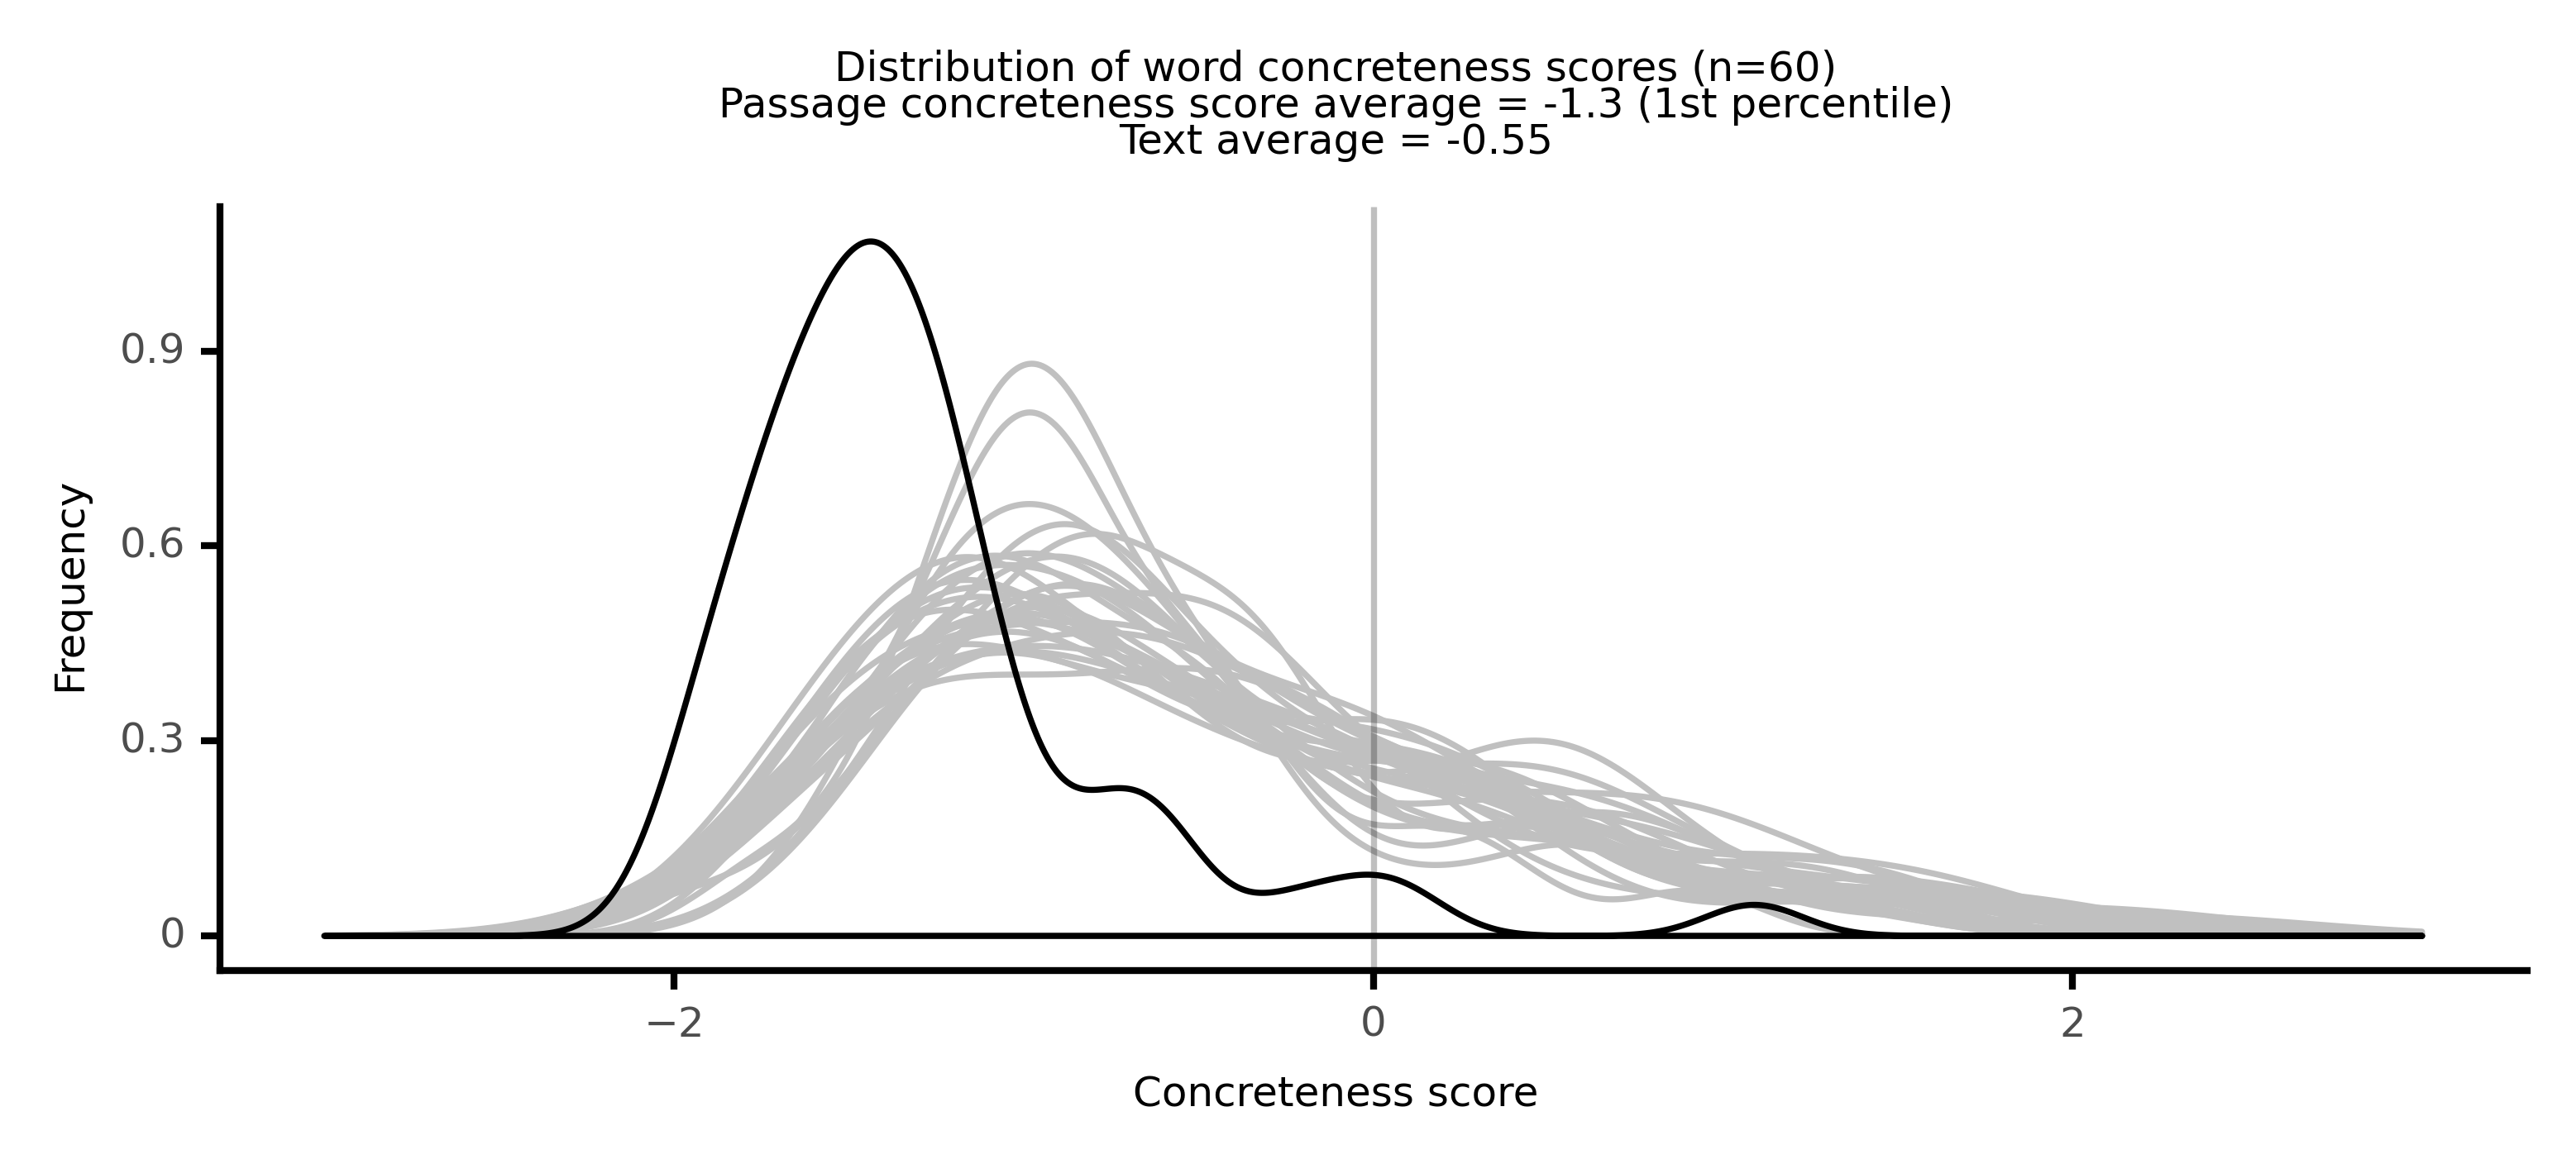

<ggplot: (8766687775553)>

In [29]:
showpsg2(dfpsg.iloc[0].txt,all_scores=scores,other_txt=C.textd[dfpsg.iloc[0].id].txt)

<style type="text/css">abs,conc,neither { border: 2px; height:1.5em; display: inline-block }
abs {font-style:italic; }
conc000 {border: 4px solid dimgray;  }
conc001 {border: 4px solid dimgray;  }
conc002 {border: 4px solid dimgray;  }
conc003 {border: 4px solid dimgray;  }
conc004 {border: 4px solid dimgray;  }
conc005 {border: 4px solid dimgray;  }
conc006 {border: 4px solid dimgray;  }
conc007 {border: 4px solid dimgray;  }
conc008 {border: 4px solid dimgray;  }
conc009 {border: 4px solid dimgray;  }
conc010 {border: 4px solid dimgray;  }
conc011 {border: 4px solid dimgray;  }
conc012 {border: 4px solid dimgray;  }
conc013 {border: 4px solid dimgray;  }
conc014 {border: 4px solid dimgray;  }
conc015 {border: 4px solid dimgray;  }
conc016 {border: 4px solid dimgray;  }
conc017 {border: 4px solid dimgray;  }
conc018 {border: 4px solid dimgray;  }
conc019 {border: 4px solid dimgray;  }
conc020 {border: 4px solid dimgray;  }
conc021 {border: 4px solid dimgray;  }
conc022 {border: 4px solid dimgray;  }
conc023 {border: 4px solid dimgray;  }
conc024 {border: 4px solid dimgray;  }
conc025 {border: 4px solid dimgray;  }
conc026 {border: 4px solid dimgray;  }
conc027 {border: 4px solid dimgray;  }
conc028 {border: 4px solid dimgray;  }
conc029 {border: 4px solid dimgray;  }
conc030 {border: 4px solid dimgray;  }
conc031 {border: 4px solid dimgray;  }
conc032 {border: 4px solid dimgray;  }
conc033 {border: 4px solid dimgray;  }
conc034 {border: 4px solid dimgray;  }
conc035 {border: 4px solid dimgray;  }
conc036 {border: 4px solid dimgray;  }
conc037 {border: 4px solid dimgray;  }
conc038 {border: 4px solid dimgray;  }
conc039 {border: 4px solid dimgray;  }
conc040 {border: 4px solid dimgray;  }
conc041 {border: 4px solid dimgray;  }
conc042 {border: 4px solid dimgray;  }
conc043 {border: 4px solid dimgray;  }
conc044 {border: 4px solid dimgray;  }
conc045 {border: 4px solid dimgray;  }
conc046 {border: 4px solid dimgray;  }
conc047 {border: 4px solid dimgray;  }
conc048 {border: 4px solid dimgray;  }
conc049 {border: 4px solid dimgray;  }
conc050 {border: 4px solid dimgray;  }
conc051 {border: 4px solid dimgray;  }
conc052 {border: 4px solid dimgray;  }
conc053 {border: 4px solid dimgray;  }
conc054 {border: 4px solid dimgray;  }
conc055 {border: 4px solid dimgray;  }
conc056 {border: 4px solid dimgray;  }
conc057 {border: 4px solid dimgray;  }
conc058 {border: 4px solid dimgray;  }
conc059 {border: 4px solid dimgray;  }
conc060 {border: 4px solid dimgray;  }
conc061 {border: 4px solid dimgray;  }
conc062 {border: 4px solid dimgray;  }
conc063 {border: 3px solid dimgray;  }
conc064 {border: 3px solid dimgray;  }
conc065 {border: 3px solid dimgray;  }
conc066 {border: 3px solid dimgray;  }
conc067 {border: 3px solid dimgray;  }
conc068 {border: 3px solid dimgray;  }
conc069 {border: 3px solid dimgray;  }
conc070 {border: 3px solid dimgray;  }
conc071 {border: 3px solid dimgray;  }
conc072 {border: 3px solid dimgray;  }
conc073 {border: 3px solid dimgray;  }
conc074 {border: 3px solid dimgray;  }
conc075 {border: 3px solid dimgray;  }
conc076 {border: 3px solid dimgray;  }
conc077 {border: 3px solid dimgray;  }
conc078 {border: 3px solid dimgray;  }
conc079 {border: 3px solid dimgray;  }
conc080 {border: 3px solid dimgray;  }
conc081 {border: 3px solid dimgray;  }
conc082 {border: 3px solid dimgray;  }
conc083 {border: 3px solid dimgray;  }
conc084 {border: 3px solid dimgray;  }
conc085 {border: 3px solid dimgray;  }
conc086 {border: 3px solid dimgray;  }
conc087 {border: 3px solid dimgray;  }
conc088 {border: 3px solid dimgray;  }
conc089 {border: 3px solid dimgray;  }
conc090 {border: 3px solid dimgray;  }
conc091 {border: 3px solid dimgray;  }
conc092 {border: 3px solid dimgray;  }
conc093 {border: 3px solid dimgray;  }
conc094 {border: 3px solid dimgray;  }
conc095 {border: 3px solid dimgray;  }
conc096 {border: 3px solid dimgray;  }
conc097 {border: 3px solid dimgray;  }
conc098 {border: 3px solid dimgray;  }
conc099 {border: 3px solid dimgray;  }
conc100 {border: 3px solid dimgray;  }
conc101 {border: 3px solid dimgray;  }
conc102 {border: 3px solid dimgray;  }
conc103 {border: 3px solid dimgray;  }
conc104 {border: 3px solid dimgray;  }
conc105 {border: 3px solid dimgray;  }
conc106 {border: 3px solid dimgray;  }
conc107 {border: 3px solid dimgray;  }
conc108 {border: 3px solid dimgray;  }
conc109 {border: 3px solid dimgray;  }
conc110 {border: 3px solid dimgray;  }
conc111 {border: 3px solid dimgray;  }
conc112 {border: 3px solid dimgray;  }
conc113 {border: 3px solid dimgray;  }
conc114 {border: 3px solid dimgray;  }
conc115 {border: 3px solid dimgray;  }
conc116 {border: 3px solid dimgray;  }
conc117 {border: 3px solid dimgray;  }
conc118 {border: 3px solid dimgray;  }
conc119 {border: 3px solid dimgray;  }
conc120 {border: 3px solid dimgray;  }
conc121 {border: 3px solid dimgray;  }
conc122 {border: 3px solid dimgray;  }
conc123 {border: 3px solid dimgray;  }
conc124 {border: 3px solid dimgray;  }
conc125 {border: 3px solid dimgray;  }
conc126 {border: 3px solid dimgray;  }
conc127 {border: 3px solid dimgray;  }
conc128 {border: 3px solid dimgray;  }
conc129 {border: 3px solid dimgray;  }
conc130 {border: 3px solid dimgray;  }
conc131 {border: 3px solid dimgray;  }
conc132 {border: 3px solid dimgray;  }
conc133 {border: 3px solid dimgray;  }
conc134 {border: 3px solid dimgray;  }
conc135 {border: 3px solid dimgray;  }
conc136 {border: 3px solid dimgray;  }
conc137 {border: 3px solid dimgray;  }
conc138 {border: 3px solid dimgray;  }
conc139 {border: 3px solid dimgray;  }
conc140 {border: 3px solid dimgray;  }
conc141 {border: 3px solid dimgray;  }
conc142 {border: 3px solid dimgray;  }
conc143 {border: 3px solid dimgray;  }
conc144 {border: 3px solid dimgray;  }
conc145 {border: 3px solid dimgray;  }
conc146 {border: 3px solid dimgray;  }
conc147 {border: 3px solid dimgray;  }
conc148 {border: 3px solid dimgray;  }
conc149 {border: 3px solid dimgray;  }
conc150 {border: 3px solid dimgray;  }
conc151 {border: 3px solid dimgray;  }
conc152 {border: 3px solid dimgray;  }
conc153 {border: 3px solid dimgray;  }
conc154 {border: 3px solid dimgray;  }
conc155 {border: 3px solid dimgray;  }
conc156 {border: 3px solid dimgray;  }
conc157 {border: 3px solid dimgray;  }
conc158 {border: 3px solid dimgray;  }
conc159 {border: 3px solid dimgray;  }
conc160 {border: 3px solid dimgray;  }
conc161 {border: 3px solid dimgray;  }
conc162 {border: 3px solid dimgray;  }
conc163 {border: 3px solid dimgray;  }
conc164 {border: 3px solid dimgray;  }
conc165 {border: 3px solid dimgray;  }
conc166 {border: 3px solid dimgray;  }
conc167 {border: 3px solid dimgray;  }
conc168 {border: 3px solid dimgray;  }
conc169 {border: 3px solid dimgray;  }
conc170 {border: 3px solid dimgray;  }
conc171 {border: 3px solid dimgray;  }
conc172 {border: 3px solid dimgray;  }
conc173 {border: 3px solid dimgray;  }
conc174 {border: 3px solid dimgray;  }
conc175 {border: 3px solid dimgray;  }
conc176 {border: 3px solid dimgray;  }
conc177 {border: 3px solid dimgray;  }
conc178 {border: 3px solid dimgray;  }
conc179 {border: 3px solid dimgray;  }
conc180 {border: 3px solid dimgray;  }
conc181 {border: 3px solid dimgray;  }
conc182 {border: 3px solid dimgray;  }
conc183 {border: 3px solid dimgray;  }
conc184 {border: 3px solid dimgray;  }
conc185 {border: 3px solid dimgray;  }
conc186 {border: 3px solid dimgray;  }
conc187 {border: 3px solid dimgray;  }
conc188 {border: 2px solid dimgray;  }
conc189 {border: 2px solid dimgray;  }
conc190 {border: 2px solid dimgray;  }
conc191 {border: 2px solid dimgray;  }
conc192 {border: 2px solid dimgray;  }
conc193 {border: 2px solid dimgray;  }
conc194 {border: 2px solid dimgray;  }
conc195 {border: 2px solid dimgray;  }
conc196 {border: 2px solid dimgray;  }
conc197 {border: 2px solid dimgray;  }
conc198 {border: 2px solid dimgray;  }
conc199 {border: 2px solid dimgray;  }
conc200 {border: 2px solid dimgray;  }
conc201 {border: 2px solid dimgray;  }
conc202 {border: 2px solid dimgray;  }
conc203 {border: 2px solid dimgray;  }
conc204 {border: 2px solid dimgray;  }
conc205 {border: 2px solid dimgray;  }
conc206 {border: 2px solid dimgray;  }
conc207 {border: 2px solid dimgray;  }
conc208 {border: 2px solid dimgray;  }
conc209 {border: 2px solid dimgray;  }
conc210 {border: 2px solid dimgray;  }
conc211 {border: 2px solid dimgray;  }
conc212 {border: 2px solid dimgray;  }
conc213 {border: 2px solid dimgray;  }
conc214 {border: 2px solid dimgray;  }
conc215 {border: 2px solid dimgray;  }
conc216 {border: 2px solid dimgray;  }
conc217 {border: 2px solid dimgray;  }
conc218 {border: 2px solid dimgray;  }
conc219 {border: 2px solid dimgray;  }
conc220 {border: 2px solid dimgray;  }
conc221 {border: 2px solid dimgray;  }
conc222 {border: 2px solid dimgray;  }
conc223 {border: 2px solid dimgray;  }
conc224 {border: 2px solid dimgray;  }
conc225 {border: 2px solid dimgray;  }
conc226 {border: 2px solid dimgray;  }
conc227 {border: 2px solid dimgray;  }
conc228 {border: 2px solid dimgray;  }
conc229 {border: 2px solid dimgray;  }
conc230 {border: 2px solid dimgray;  }
conc231 {border: 2px solid dimgray;  }
conc232 {border: 2px solid dimgray;  }
conc233 {border: 2px solid dimgray;  }
conc234 {border: 2px solid dimgray;  }
conc235 {border: 2px solid dimgray;  }
conc236 {border: 2px solid dimgray;  }
conc237 {border: 2px solid dimgray;  }
conc238 {border: 2px solid dimgray;  }
conc239 {border: 2px solid dimgray;  }
conc240 {border: 2px solid dimgray;  }
conc241 {border: 2px solid dimgray;  }
conc242 {border: 2px solid dimgray;  }
conc243 {border: 2px solid dimgray;  }
conc244 {border: 2px solid dimgray;  }
conc245 {border: 2px solid dimgray;  }
conc246 {border: 2px solid dimgray;  }
conc247 {border: 2px solid dimgray;  }
conc248 {border: 2px solid dimgray;  }
conc249 {border: 2px solid dimgray;  }
conc250 {border: 2px solid dimgray;  }
conc251 {border: 2px solid dimgray;  }
conc252 {border: 2px solid dimgray;  }
conc253 {border: 2px solid dimgray;  }
conc254 {border: 2px solid dimgray;  }
conc255 {border: 2px solid dimgray;  }
conc256 {border: 2px solid dimgray;  }
conc257 {border: 2px solid dimgray;  }
conc258 {border: 2px solid dimgray;  }
conc259 {border: 2px solid dimgray;  }
conc260 {border: 2px solid dimgray;  }
conc261 {border: 2px solid dimgray;  }
conc262 {border: 2px solid dimgray;  }
conc263 {border: 2px solid dimgray;  }
conc264 {border: 2px solid dimgray;  }
conc265 {border: 2px solid dimgray;  }
conc266 {border: 2px solid dimgray;  }
conc267 {border: 2px solid dimgray;  }
conc268 {border: 2px solid dimgray;  }
conc269 {border: 2px solid dimgray;  }
conc270 {border: 2px solid dimgray;  }
conc271 {border: 2px solid dimgray;  }
conc272 {border: 2px solid dimgray;  }
conc273 {border: 2px solid dimgray;  }
conc274 {border: 2px solid dimgray;  }
conc275 {border: 2px solid dimgray;  }
conc276 {border: 2px solid dimgray;  }
conc277 {border: 2px solid dimgray;  }
conc278 {border: 2px solid dimgray;  }
conc279 {border: 2px solid dimgray;  }
conc280 {border: 2px solid dimgray;  }
conc281 {border: 2px solid dimgray;  }
conc282 {border: 2px solid dimgray;  }
conc283 {border: 2px solid dimgray;  }
conc284 {border: 2px solid dimgray;  }
conc285 {border: 2px solid dimgray;  }
conc286 {border: 2px solid dimgray;  }
conc287 {border: 2px solid dimgray;  }
conc288 {border: 2px solid dimgray;  }
conc289 {border: 2px solid dimgray;  }
conc290 {border: 2px solid dimgray;  }
conc291 {border: 2px solid dimgray;  }
conc292 {border: 2px solid dimgray;  }
conc293 {border: 2px solid dimgray;  }
conc294 {border: 2px solid dimgray;  }
conc295 {border: 2px solid dimgray;  }
conc296 {border: 2px solid dimgray;  }
conc297 {border: 2px solid dimgray;  }
conc298 {border: 2px solid dimgray;  }
conc299 {border: 2px solid dimgray;  }
conc300 {border: 2px solid dimgray;  }
conc301 {border: 2px solid dimgray;  }
conc302 {border: 2px solid dimgray;  }
conc303 {border: 2px solid dimgray;  }
conc304 {border: 2px solid dimgray;  }
conc305 {border: 2px solid dimgray;  }
conc306 {border: 2px solid dimgray;  }
conc307 {border: 2px solid dimgray;  }
conc308 {border: 2px solid dimgray;  }
conc309 {border: 2px solid dimgray;  }
conc310 {border: 2px solid dimgray;  }
conc311 {border: 2px solid dimgray;  }
conc312 {border: 2px solid dimgray;  }
conc313 {border: 1px solid dimgray;  }
conc314 {border: 1px solid dimgray;  }
conc315 {border: 1px solid dimgray;  }
conc316 {border: 1px solid dimgray;  }
conc317 {border: 1px solid dimgray;  }
conc318 {border: 1px solid dimgray;  }
conc319 {border: 1px solid dimgray;  }
conc320 {border: 1px solid dimgray;  }
conc321 {border: 1px solid dimgray;  }
conc322 {border: 1px solid dimgray;  }
conc323 {border: 1px solid dimgray;  }
conc324 {border: 1px solid dimgray;  }
conc325 {border: 1px solid dimgray;  }
conc326 {border: 1px solid dimgray;  }
conc327 {border: 1px solid dimgray;  }
conc328 {border: 1px solid dimgray;  }
conc329 {border: 1px solid dimgray;  }
conc330 {border: 1px solid dimgray;  }
conc331 {border: 1px solid dimgray;  }
conc332 {border: 1px solid dimgray;  }
conc333 {border: 1px solid dimgray;  }
conc334 {border: 1px solid dimgray;  }
conc335 {border: 1px solid dimgray;  }
conc336 {border: 1px solid dimgray;  }
conc337 {border: 1px solid dimgray;  }
conc338 {border: 1px solid dimgray;  }
conc339 {border: 1px solid dimgray;  }
conc340 {border: 1px solid dimgray;  }
conc341 {border: 1px solid dimgray;  }
conc342 {border: 1px solid dimgray;  }
conc343 {border: 1px solid dimgray;  }
conc344 {border: 1px solid dimgray;  }
conc345 {border: 1px solid dimgray;  }
conc346 {border: 1px solid dimgray;  }
conc347 {border: 1px solid dimgray;  }
conc348 {border: 1px solid dimgray;  }
conc349 {border: 1px solid dimgray;  }
conc350 {border: 1px solid dimgray;  }
conc351 {border: 1px solid dimgray;  }
conc352 {border: 1px solid dimgray;  }
conc353 {border: 1px solid dimgray;  }
conc354 {border: 1px solid dimgray;  }
conc355 {border: 1px solid dimgray;  }
conc356 {border: 1px solid dimgray;  }
conc357 {border: 1px solid dimgray;  }
conc358 {border: 1px solid dimgray;  }
conc359 {border: 1px solid dimgray;  }
conc360 {border: 1px solid dimgray;  }
conc361 {border: 1px solid dimgray;  }
conc362 {border: 1px solid dimgray;  }
conc363 {border: 1px solid dimgray;  }
conc364 {border: 1px solid dimgray;  }
conc365 {border: 1px solid dimgray;  }
conc366 {border: 1px solid dimgray;  }
conc367 {border: 1px solid dimgray;  }
conc368 {border: 1px solid dimgray;  }
conc369 {border: 1px solid dimgray;  }
conc370 {border: 1px solid dimgray;  }
conc371 {border: 1px solid dimgray;  }
conc372 {border: 1px solid dimgray;  }
conc373 {border: 1px solid dimgray;  }
conc374 {border: 1px solid dimgray;  }
conc375 {border: 1px solid dimgray;  }
conc376 {border: 1px solid dimgray;  }
conc377 {border: 1px solid dimgray;  }
conc378 {border: 1px solid dimgray;  }
conc379 {border: 1px solid dimgray;  }
conc380 {border: 1px solid dimgray;  }
conc381 {border: 1px solid dimgray;  }
conc382 {border: 1px solid dimgray;  }
conc383 {border: 1px solid dimgray;  }
conc384 {border: 1px solid dimgray;  }
conc385 {border: 1px solid dimgray;  }
conc386 {border: 1px solid dimgray;  }
conc387 {border: 1px solid dimgray;  }
conc388 {border: 1px solid dimgray;  }
conc389 {border: 1px solid dimgray;  }
conc390 {border: 1px solid dimgray;  }
conc391 {border: 1px solid dimgray;  }
conc392 {border: 1px solid dimgray;  }
conc393 {border: 1px solid dimgray;  }
conc394 {border: 1px solid dimgray;  }
conc395 {border: 1px solid dimgray;  }
conc396 {border: 1px solid dimgray;  }
conc397 {border: 1px solid dimgray;  }
conc398 {border: 1px solid dimgray;  }
conc399 {border: 1px solid dimgray;  }
conc400 {border: 1px solid dimgray;  }
conc401 {border: 1px solid dimgray;  }
conc402 {border: 1px solid dimgray;  }
conc403 {border: 1px solid dimgray;  }
conc404 {border: 1px solid dimgray;  }
conc405 {border: 1px solid dimgray;  }
conc406 {border: 1px solid dimgray;  }
conc407 {border: 1px solid dimgray;  }
conc408 {border: 1px solid dimgray;  }
conc409 {border: 1px solid dimgray;  }
conc410 {border: 1px solid dimgray;  }
conc411 {border: 1px solid dimgray;  }
conc412 {border: 1px solid dimgray;  }
conc413 {border: 1px solid dimgray;  }
conc414 {border: 1px solid dimgray;  }
conc415 {border: 1px solid dimgray;  }
conc416 {border: 1px solid dimgray;  }
conc417 {border: 1px solid dimgray;  }
conc418 {border: 1px solid dimgray;  }
conc419 {border: 1px solid dimgray;  }
conc420 {border: 1px solid dimgray;  }
conc421 {border: 1px solid dimgray;  }
conc422 {border: 1px solid dimgray;  }
conc423 {border: 1px solid dimgray;  }
conc424 {border: 1px solid dimgray;  }
conc425 {border: 1px solid dimgray;  }
conc426 {border: 1px solid dimgray;  }
conc427 {border: 1px solid dimgray;  }
conc428 {border: 1px solid dimgray;  }
conc429 {border: 1px solid dimgray;  }
conc430 {border: 1px solid dimgray;  }
conc431 {border: 1px solid dimgray;  }
conc432 {border: 1px solid dimgray;  }
conc433 {border: 1px solid dimgray;  }
conc434 {border: 1px solid dimgray;  }
conc435 {border: 1px solid dimgray;  }
conc436 {border: 1px solid dimgray;  }
conc437 {border: 1px solid dimgray;  }
conc438 {border: 0px solid dimgray;  }
conc439 {border: 0px solid dimgray;  }
conc440 {border: 0px solid dimgray;  }
conc441 {border: 0px solid dimgray;  }
conc442 {border: 0px solid dimgray;  }
conc443 {border: 0px solid dimgray;  }
conc444 {border: 0px solid dimgray;  }
conc445 {border: 0px solid dimgray;  }
conc446 {border: 0px solid dimgray;  }
conc447 {border: 0px solid dimgray;  }
conc448 {border: 0px solid dimgray;  }
conc449 {border: 0px solid dimgray;  }
conc450 {border: 0px solid dimgray;  }
conc451 {border: 0px solid dimgray;  }
conc452 {border: 0px solid dimgray;  }
conc453 {border: 0px solid dimgray;  }
conc454 {border: 0px solid dimgray;  }
conc455 {border: 0px solid dimgray;  }
conc456 {border: 0px solid dimgray;  }
conc457 {border: 0px solid dimgray;  }
conc458 {border: 0px solid dimgray;  }
conc459 {border: 0px solid dimgray;  }
conc460 {border: 0px solid dimgray;  }
conc461 {border: 0px solid dimgray;  }
conc462 {border: 0px solid dimgray;  }
conc463 {border: 0px solid dimgray;  }
conc464 {border: 0px solid dimgray;  }
conc465 {border: 0px solid dimgray;  }
conc466 {border: 0px solid dimgray;  }
conc467 {border: 0px solid dimgray;  }
conc468 {border: 0px solid dimgray;  }
conc469 {border: 0px solid dimgray;  }
conc470 {border: 0px solid dimgray;  }
conc471 {border: 0px solid dimgray;  }
conc472 {border: 0px solid dimgray;  }
conc473 {border: 0px solid dimgray;  }
conc474 {border: 0px solid dimgray;  }
conc475 {border: 0px solid dimgray;  }
conc476 {border: 0px solid dimgray;  }
conc477 {border: 0px solid dimgray;  }
conc478 {border: 0px solid dimgray;  }
conc479 {border: 0px solid dimgray;  }
conc480 {border: 0px solid dimgray;  }
conc481 {border: 0px solid dimgray;  }
conc482 {border: 0px solid dimgray;  }
conc483 {border: 0px solid dimgray;  }
conc484 {border: 0px solid dimgray;  }
conc485 {border: 0px solid dimgray;  }
conc486 {border: 0px solid dimgray;  }
conc487 {border: 0px solid dimgray;  }
conc488 {border: 0px solid dimgray;  }
conc489 {border: 0px solid dimgray;  }
conc490 {border: 0px solid dimgray;  }
conc491 {border: 0px solid dimgray;  }
conc492 {border: 0px solid dimgray;  }
conc493 {border: 0px solid dimgray;  }
conc494 {border: 0px solid dimgray;  }
conc495 {border: 0px solid dimgray;  }
conc496 {border: 0px solid dimgray;  }
conc497 {border: 0px solid dimgray;  }
conc498 {border: 0px solid dimgray;  }
conc499 {border: 0px solid dimgray;  }
conc500 {background-color: rgba(0.6039215686274509, 0.6039215686274509, 0.6039215686274509, 0.025); font-weight: 1;  }
conc501 {background-color: rgba(0.6045895712994617, 0.6045895712994617, 0.6045895712994617, 0.025400000000000002); font-weight: 3;  }
conc502 {background-color: rgba(0.6052575739714723, 0.6052575739714723, 0.6052575739714723, 0.0258); font-weight: 5;  }
conc503 {background-color: rgba(0.605925576643483, 0.605925576643483, 0.605925576643483, 0.0262); font-weight: 7;  }
conc504 {background-color: rgba(0.6065935793154937, 0.6065935793154937, 0.6065935793154937, 0.026600000000000002); font-weight: 9;  }
conc505 {background-color: rgba(0.6072615819875044, 0.6072615819875044, 0.6072615819875044, 0.027000000000000003); font-weight: 11;  }
conc506 {background-color: rgba(0.6079295846595151, 0.6079295846595151, 0.6079295846595151, 0.0274); font-weight: 13;  }
conc507 {background-color: rgba(0.6085975873315258, 0.6085975873315258, 0.6085975873315258, 0.027800000000000002); font-weight: 15;  }
conc508 {background-color: rgba(0.6092655900035364, 0.6092655900035364, 0.6092655900035364, 0.028200000000000003); font-weight: 17;  }
conc509 {background-color: rgba(0.6099335926755471, 0.6099335926755471, 0.6099335926755471, 0.0286); font-weight: 19;  }
conc510 {background-color: rgba(0.6106015953475579, 0.6106015953475579, 0.6106015953475579, 0.029); font-weight: 21;  }
conc511 {background-color: rgba(0.6112695980195685, 0.6112695980195685, 0.6112695980195685, 0.029400000000000003); font-weight: 23;  }
conc512 {background-color: rgba(0.6119376006915792, 0.6119376006915792, 0.6119376006915792, 0.0298); font-weight: 25;  }
conc513 {background-color: rgba(0.6126056033635899, 0.6126056033635899, 0.6126056033635899, 0.0302); font-weight: 27;  }
conc514 {background-color: rgba(0.6132736060356005, 0.6132736060356005, 0.6132736060356005, 0.030600000000000002); font-weight: 29;  }
conc515 {background-color: rgba(0.6139416087076113, 0.6139416087076113, 0.6139416087076113, 0.031); font-weight: 31;  }
conc516 {background-color: rgba(0.614609611379622, 0.614609611379622, 0.614609611379622, 0.031400000000000004); font-weight: 33;  }
conc517 {background-color: rgba(0.6152776140516326, 0.6152776140516326, 0.6152776140516326, 0.0318); font-weight: 35;  }
conc518 {background-color: rgba(0.6159456167236433, 0.6159456167236433, 0.6159456167236433, 0.0322); font-weight: 37;  }
conc519 {background-color: rgba(0.6166136193956541, 0.6166136193956541, 0.6166136193956541, 0.032600000000000004); font-weight: 39;  }
conc520 {background-color: rgba(0.6172816220676647, 0.6172816220676647, 0.6172816220676647, 0.033); font-weight: 41;  }
conc521 {background-color: rgba(0.6179496247396754, 0.6179496247396754, 0.6179496247396754, 0.0334); font-weight: 43;  }
conc522 {background-color: rgba(0.6186176274116861, 0.6186176274116861, 0.6186176274116861, 0.033800000000000004); font-weight: 45;  }
conc523 {background-color: rgba(0.6192856300836967, 0.6192856300836967, 0.6192856300836967, 0.0342); font-weight: 47;  }
conc524 {background-color: rgba(0.6199536327557075, 0.6199536327557075, 0.6199536327557075, 0.034600000000000006); font-weight: 49;  }
conc525 {background-color: rgba(0.6206216354277182, 0.6206216354277182, 0.6206216354277182, 0.035); font-weight: 51;  }
conc526 {background-color: rgba(0.6212896380997288, 0.6212896380997288, 0.6212896380997288, 0.0354); font-weight: 53;  }
conc527 {background-color: rgba(0.6219576407717395, 0.6219576407717395, 0.6219576407717395, 0.0358); font-weight: 55;  }
conc528 {background-color: rgba(0.6226256434437503, 0.6226256434437503, 0.6226256434437503, 0.0362); font-weight: 57;  }
conc529 {background-color: rgba(0.6232936461157609, 0.6232936461157609, 0.6232936461157609, 0.0366); font-weight: 59;  }
conc530 {background-color: rgba(0.6239616487877716, 0.6239616487877716, 0.6239616487877716, 0.037000000000000005); font-weight: 61;  }
conc531 {background-color: rgba(0.6246296514597822, 0.6246296514597822, 0.6246296514597822, 0.0374); font-weight: 63;  }
conc532 {background-color: rgba(0.625297654131793, 0.625297654131793, 0.625297654131793, 0.0378); font-weight: 65;  }
conc533 {background-color: rgba(0.6259656568038037, 0.6259656568038037, 0.6259656568038037, 0.038200000000000005); font-weight: 67;  }
conc534 {background-color: rgba(0.6266336594758143, 0.6266336594758143, 0.6266336594758143, 0.0386); font-weight: 69;  }
conc535 {background-color: rgba(0.627301662147825, 0.627301662147825, 0.627301662147825, 0.03900000000000001); font-weight: 71;  }
conc536 {background-color: rgba(0.6279696648198357, 0.6279696648198357, 0.6279696648198357, 0.039400000000000004); font-weight: 73;  }
conc537 {background-color: rgba(0.6286376674918464, 0.6286376674918464, 0.6286376674918464, 0.0398); font-weight: 75;  }
conc538 {background-color: rgba(0.6293056701638571, 0.6293056701638571, 0.6293056701638571, 0.0402); font-weight: 77;  }
conc539 {background-color: rgba(0.6299736728358678, 0.6299736728358678, 0.6299736728358678, 0.040600000000000004); font-weight: 79;  }
conc540 {background-color: rgba(0.6306416755078784, 0.6306416755078784, 0.6306416755078784, 0.041); font-weight: 81;  }
conc541 {background-color: rgba(0.6313096781798891, 0.6313096781798891, 0.6313096781798891, 0.041400000000000006); font-weight: 83;  }
conc542 {background-color: rgba(0.6319776808518999, 0.6319776808518999, 0.6319776808518999, 0.041800000000000004); font-weight: 85;  }
conc543 {background-color: rgba(0.6326456835239105, 0.6326456835239105, 0.6326456835239105, 0.0422); font-weight: 87;  }
conc544 {background-color: rgba(0.6333136861959212, 0.6333136861959212, 0.6333136861959212, 0.0426); font-weight: 89;  }
conc545 {background-color: rgba(0.6339816888679319, 0.6339816888679319, 0.6339816888679319, 0.043); font-weight: 91;  }
conc546 {background-color: rgba(0.6346496915399426, 0.6346496915399426, 0.6346496915399426, 0.0434); font-weight: 93;  }
conc547 {background-color: rgba(0.6353176942119533, 0.6353176942119533, 0.6353176942119533, 0.043800000000000006); font-weight: 95;  }
conc548 {background-color: rgba(0.635985696883964, 0.635985696883964, 0.635985696883964, 0.0442); font-weight: 97;  }
conc549 {background-color: rgba(0.6366536995559746, 0.6366536995559746, 0.6366536995559746, 0.0446); font-weight: 99;  }
conc550 {background-color: rgba(0.6373217022279853, 0.6373217022279853, 0.6373217022279853, 0.045000000000000005); font-weight: 101;  }
conc551 {background-color: rgba(0.6379897048999961, 0.6379897048999961, 0.6379897048999961, 0.0454); font-weight: 103;  }
conc552 {background-color: rgba(0.6386577075720067, 0.6386577075720067, 0.6386577075720067, 0.0458); font-weight: 105;  }
conc553 {background-color: rgba(0.6393257102440174, 0.6393257102440174, 0.6393257102440174, 0.046200000000000005); font-weight: 107;  }
conc554 {background-color: rgba(0.6399937129160281, 0.6399937129160281, 0.6399937129160281, 0.0466); font-weight: 109;  }
conc555 {background-color: rgba(0.6406617155880387, 0.6406617155880387, 0.6406617155880387, 0.047); font-weight: 111;  }
conc556 {background-color: rgba(0.6413297182600495, 0.6413297182600495, 0.6413297182600495, 0.047400000000000005); font-weight: 113;  }
conc557 {background-color: rgba(0.6419977209320602, 0.6419977209320602, 0.6419977209320602, 0.0478); font-weight: 115;  }
conc558 {background-color: rgba(0.6426657236040708, 0.6426657236040708, 0.6426657236040708, 0.04820000000000001); font-weight: 117;  }
conc559 {background-color: rgba(0.6433337262760815, 0.6433337262760815, 0.6433337262760815, 0.048600000000000004); font-weight: 119;  }
conc560 {background-color: rgba(0.6440017289480923, 0.6440017289480923, 0.6440017289480923, 0.049); font-weight: 121;  }
conc561 {background-color: rgba(0.6446697316201029, 0.6446697316201029, 0.6446697316201029, 0.0494); font-weight: 123;  }
conc562 {background-color: rgba(0.6453377342921136, 0.6453377342921136, 0.6453377342921136, 0.049800000000000004); font-weight: 125;  }
conc563 {background-color: rgba(0.6460057369641243, 0.6460057369641243, 0.6460057369641243, 0.0502); font-weight: 127;  }
conc564 {background-color: rgba(0.646673739636135, 0.646673739636135, 0.646673739636135, 0.050600000000000006); font-weight: 129;  }
conc565 {background-color: rgba(0.6473417423081457, 0.6473417423081457, 0.6473417423081457, 0.051000000000000004); font-weight: 131;  }
conc566 {background-color: rgba(0.6480097449801564, 0.6480097449801564, 0.6480097449801564, 0.0514); font-weight: 133;  }
conc567 {background-color: rgba(0.648677747652167, 0.648677747652167, 0.648677747652167, 0.051800000000000006); font-weight: 135;  }
conc568 {background-color: rgba(0.6493457503241777, 0.6493457503241777, 0.6493457503241777, 0.0522); font-weight: 137;  }
conc569 {background-color: rgba(0.6500137529961885, 0.6500137529961885, 0.6500137529961885, 0.05260000000000001); font-weight: 139;  }
conc570 {background-color: rgba(0.6506817556681991, 0.6506817556681991, 0.6506817556681991, 0.053000000000000005); font-weight: 141;  }
conc571 {background-color: rgba(0.6513497583402098, 0.6513497583402098, 0.6513497583402098, 0.0534); font-weight: 143;  }
conc572 {background-color: rgba(0.6520177610122205, 0.6520177610122205, 0.6520177610122205, 0.0538); font-weight: 145;  }
conc573 {background-color: rgba(0.6526857636842311, 0.6526857636842311, 0.6526857636842311, 0.0542); font-weight: 147;  }
conc574 {background-color: rgba(0.6533537663562419, 0.6533537663562419, 0.6533537663562419, 0.0546); font-weight: 149;  }
conc575 {background-color: rgba(0.6540217690282526, 0.6540217690282526, 0.6540217690282526, 0.055); font-weight: 151;  }
conc576 {background-color: rgba(0.6546897717002632, 0.6546897717002632, 0.6546897717002632, 0.055400000000000005); font-weight: 153;  }
conc577 {background-color: rgba(0.6553577743722739, 0.6553577743722739, 0.6553577743722739, 0.0558); font-weight: 155;  }
conc578 {background-color: rgba(0.6560257770442847, 0.6560257770442847, 0.6560257770442847, 0.0562); font-weight: 157;  }
conc579 {background-color: rgba(0.6566937797162953, 0.6566937797162953, 0.6566937797162953, 0.056600000000000004); font-weight: 159;  }
conc580 {background-color: rgba(0.657361782388306, 0.657361782388306, 0.657361782388306, 0.057); font-weight: 161;  }
conc581 {background-color: rgba(0.6580297850603167, 0.6580297850603167, 0.6580297850603167, 0.05740000000000001); font-weight: 163;  }
conc582 {background-color: rgba(0.6586977877323273, 0.6586977877323273, 0.6586977877323273, 0.057800000000000004); font-weight: 165;  }
conc583 {background-color: rgba(0.6593657904043381, 0.6593657904043381, 0.6593657904043381, 0.0582); font-weight: 167;  }
conc584 {background-color: rgba(0.6600337930763488, 0.6600337930763488, 0.6600337930763488, 0.058600000000000006); font-weight: 169;  }
conc585 {background-color: rgba(0.6607017957483594, 0.6607017957483594, 0.6607017957483594, 0.059000000000000004); font-weight: 171;  }
conc586 {background-color: rgba(0.6613697984203701, 0.6613697984203701, 0.6613697984203701, 0.0594); font-weight: 173;  }
conc587 {background-color: rgba(0.6620378010923809, 0.6620378010923809, 0.6620378010923809, 0.0598); font-weight: 175;  }
conc588 {background-color: rgba(0.6627058037643915, 0.6627058037643915, 0.6627058037643915, 0.060200000000000004); font-weight: 177;  }
conc589 {background-color: rgba(0.6633738064364022, 0.6633738064364022, 0.6633738064364022, 0.0606); font-weight: 179;  }
conc590 {background-color: rgba(0.6640418091084128, 0.6640418091084128, 0.6640418091084128, 0.061); font-weight: 181;  }
conc591 {background-color: rgba(0.6647098117804235, 0.6647098117804235, 0.6647098117804235, 0.0614); font-weight: 183;  }
conc592 {background-color: rgba(0.6653778144524343, 0.6653778144524343, 0.6653778144524343, 0.0618); font-weight: 185;  }
conc593 {background-color: rgba(0.666045817124445, 0.666045817124445, 0.666045817124445, 0.062200000000000005); font-weight: 187;  }
conc594 {background-color: rgba(0.6667138197964556, 0.6667138197964556, 0.6667138197964556, 0.0626); font-weight: 189;  }
conc595 {background-color: rgba(0.6673818224684663, 0.6673818224684663, 0.6673818224684663, 0.063); font-weight: 191;  }
conc596 {background-color: rgba(0.668049825140477, 0.668049825140477, 0.668049825140477, 0.06340000000000001); font-weight: 193;  }
conc597 {background-color: rgba(0.6687178278124877, 0.6687178278124877, 0.6687178278124877, 0.0638); font-weight: 195;  }
conc598 {background-color: rgba(0.6693858304844984, 0.6693858304844984, 0.6693858304844984, 0.06420000000000001); font-weight: 197;  }
conc599 {background-color: rgba(0.6700538331565091, 0.6700538331565091, 0.6700538331565091, 0.0646); font-weight: 199;  }
conc600 {background-color: rgba(0.6707218358285197, 0.6707218358285197, 0.6707218358285197, 0.065); font-weight: 201;  }
conc601 {background-color: rgba(0.6713898385005305, 0.6713898385005305, 0.6713898385005305, 0.06540000000000001); font-weight: 203;  }
conc602 {background-color: rgba(0.6720578411725411, 0.6720578411725411, 0.6720578411725411, 0.0658); font-weight: 205;  }
conc603 {background-color: rgba(0.6727258438445518, 0.6727258438445518, 0.6727258438445518, 0.06620000000000001); font-weight: 207;  }
conc604 {background-color: rgba(0.6733938465165625, 0.6733938465165625, 0.6733938465165625, 0.06659999999999999); font-weight: 209;  }
conc605 {background-color: rgba(0.6740618491885731, 0.6740618491885731, 0.6740618491885731, 0.067); font-weight: 211;  }
conc606 {background-color: rgba(0.6747298518605839, 0.6747298518605839, 0.6747298518605839, 0.0674); font-weight: 213;  }
conc607 {background-color: rgba(0.6753978545325946, 0.6753978545325946, 0.6753978545325946, 0.0678); font-weight: 215;  }
conc608 {background-color: rgba(0.6760658572046052, 0.6760658572046052, 0.6760658572046052, 0.06820000000000001); font-weight: 217;  }
conc609 {background-color: rgba(0.6767338598766159, 0.6767338598766159, 0.6767338598766159, 0.0686); font-weight: 219;  }
conc610 {background-color: rgba(0.6774018625486267, 0.6774018625486267, 0.6774018625486267, 0.069); font-weight: 221;  }
conc611 {background-color: rgba(0.6780698652206373, 0.6780698652206373, 0.6780698652206373, 0.0694); font-weight: 223;  }
conc612 {background-color: rgba(0.678737867892648, 0.678737867892648, 0.678737867892648, 0.0698); font-weight: 225;  }
conc613 {background-color: rgba(0.6794058705646587, 0.6794058705646587, 0.6794058705646587, 0.07020000000000001); font-weight: 227;  }
conc614 {background-color: rgba(0.6800738732366693, 0.6800738732366693, 0.6800738732366693, 0.0706); font-weight: 229;  }
conc615 {background-color: rgba(0.6807418759086801, 0.6807418759086801, 0.6807418759086801, 0.07100000000000001); font-weight: 231;  }
conc616 {background-color: rgba(0.6814098785806908, 0.6814098785806908, 0.6814098785806908, 0.0714); font-weight: 233;  }
conc617 {background-color: rgba(0.6820778812527014, 0.6820778812527014, 0.6820778812527014, 0.0718); font-weight: 235;  }
conc618 {background-color: rgba(0.6827458839247121, 0.6827458839247121, 0.6827458839247121, 0.0722); font-weight: 237;  }
conc619 {background-color: rgba(0.6834138865967229, 0.6834138865967229, 0.6834138865967229, 0.0726); font-weight: 239;  }
conc620 {background-color: rgba(0.6840818892687335, 0.6840818892687335, 0.6840818892687335, 0.07300000000000001); font-weight: 241;  }
conc621 {background-color: rgba(0.6847498919407442, 0.6847498919407442, 0.6847498919407442, 0.07339999999999999); font-weight: 243;  }
conc622 {background-color: rgba(0.6854178946127549, 0.6854178946127549, 0.6854178946127549, 0.0738); font-weight: 245;  }
conc623 {background-color: rgba(0.6860858972847655, 0.6860858972847655, 0.6860858972847655, 0.0742); font-weight: 247;  }
conc624 {background-color: rgba(0.6867538999567763, 0.6867538999567763, 0.6867538999567763, 0.0746); font-weight: 249;  }
conc625 {background-color: rgba(0.687421902628787, 0.687421902628787, 0.687421902628787, 0.07500000000000001); font-weight: 251;  }
conc626 {background-color: rgba(0.6880899053007976, 0.6880899053007976, 0.6880899053007976, 0.0754); font-weight: 253;  }
conc627 {background-color: rgba(0.6887579079728083, 0.6887579079728083, 0.6887579079728083, 0.0758); font-weight: 255;  }
conc628 {background-color: rgba(0.6894259106448191, 0.6894259106448191, 0.6894259106448191, 0.0762); font-weight: 257;  }
conc629 {background-color: rgba(0.6900939133168297, 0.6900939133168297, 0.6900939133168297, 0.0766); font-weight: 259;  }
conc630 {background-color: rgba(0.6907619159888404, 0.6907619159888404, 0.6907619159888404, 0.07700000000000001); font-weight: 261;  }
conc631 {background-color: rgba(0.6914299186608511, 0.6914299186608511, 0.6914299186608511, 0.0774); font-weight: 263;  }
conc632 {background-color: rgba(0.6920979213328617, 0.6920979213328617, 0.6920979213328617, 0.07780000000000001); font-weight: 265;  }
conc633 {background-color: rgba(0.6927659240048725, 0.6927659240048725, 0.6927659240048725, 0.0782); font-weight: 267;  }
conc634 {background-color: rgba(0.6934339266768832, 0.6934339266768832, 0.6934339266768832, 0.0786); font-weight: 269;  }
conc635 {background-color: rgba(0.6941019293488938, 0.6941019293488938, 0.6941019293488938, 0.07900000000000001); font-weight: 271;  }
conc636 {background-color: rgba(0.6947699320209045, 0.6947699320209045, 0.6947699320209045, 0.0794); font-weight: 273;  }
conc637 {background-color: rgba(0.6954379346929153, 0.6954379346929153, 0.6954379346929153, 0.07980000000000001); font-weight: 275;  }
conc638 {background-color: rgba(0.6961059373649259, 0.6961059373649259, 0.6961059373649259, 0.08020000000000001); font-weight: 277;  }
conc639 {background-color: rgba(0.6967739400369366, 0.6967739400369366, 0.6967739400369366, 0.0806); font-weight: 279;  }
conc640 {background-color: rgba(0.6974419427089473, 0.6974419427089473, 0.6974419427089473, 0.08100000000000002); font-weight: 281;  }
conc641 {background-color: rgba(0.6981099453809579, 0.6981099453809579, 0.6981099453809579, 0.0814); font-weight: 283;  }
conc642 {background-color: rgba(0.6987779480529687, 0.6987779480529687, 0.6987779480529687, 0.0818); font-weight: 285;  }
conc643 {background-color: rgba(0.6994459507249793, 0.6994459507249793, 0.6994459507249793, 0.0822); font-weight: 287;  }
conc644 {background-color: rgba(0.70011395339699, 0.70011395339699, 0.70011395339699, 0.0826); font-weight: 289;  }
conc645 {background-color: rgba(0.7007819560690007, 0.7007819560690007, 0.7007819560690007, 0.08299999999999999); font-weight: 291;  }
conc646 {background-color: rgba(0.7014499587410115, 0.7014499587410115, 0.7014499587410115, 0.0834); font-weight: 293;  }
conc647 {background-color: rgba(0.7021179614130221, 0.7021179614130221, 0.7021179614130221, 0.0838); font-weight: 295;  }
conc648 {background-color: rgba(0.7027859640850328, 0.7027859640850328, 0.7027859640850328, 0.0842); font-weight: 297;  }
conc649 {background-color: rgba(0.7034539667570434, 0.7034539667570434, 0.7034539667570434, 0.08460000000000001); font-weight: 299;  }
conc650 {background-color: rgba(0.7041219694290541, 0.7041219694290541, 0.7041219694290541, 0.08499999999999999); font-weight: 301;  }
conc651 {background-color: rgba(0.7047899721010649, 0.7047899721010649, 0.7047899721010649, 0.0854); font-weight: 303;  }
conc652 {background-color: rgba(0.7054579747730756, 0.7054579747730756, 0.7054579747730756, 0.0858); font-weight: 305;  }
conc653 {background-color: rgba(0.7061259774450862, 0.7061259774450862, 0.7061259774450862, 0.0862); font-weight: 307;  }
conc654 {background-color: rgba(0.7067939801170969, 0.7067939801170969, 0.7067939801170969, 0.08660000000000001); font-weight: 309;  }
conc655 {background-color: rgba(0.7074619827891075, 0.7074619827891075, 0.7074619827891075, 0.087); font-weight: 311;  }
conc656 {background-color: rgba(0.7081299854611183, 0.7081299854611183, 0.7081299854611183, 0.0874); font-weight: 313;  }
conc657 {background-color: rgba(0.708797988133129, 0.708797988133129, 0.708797988133129, 0.08780000000000002); font-weight: 315;  }
conc658 {background-color: rgba(0.7094659908051397, 0.7094659908051397, 0.7094659908051397, 0.0882); font-weight: 317;  }
conc659 {background-color: rgba(0.7101339934771503, 0.7101339934771503, 0.7101339934771503, 0.08860000000000001); font-weight: 319;  }
conc660 {background-color: rgba(0.7108019961491611, 0.7108019961491611, 0.7108019961491611, 0.089); font-weight: 321;  }
conc661 {background-color: rgba(0.7114699988211717, 0.7114699988211717, 0.7114699988211717, 0.08940000000000001); font-weight: 323;  }
conc662 {background-color: rgba(0.7121380014931824, 0.7121380014931824, 0.7121380014931824, 0.08980000000000002); font-weight: 325;  }
conc663 {background-color: rgba(0.7128060041651931, 0.7128060041651931, 0.7128060041651931, 0.0902); font-weight: 327;  }
conc664 {background-color: rgba(0.7134740068372037, 0.7134740068372037, 0.7134740068372037, 0.09060000000000001); font-weight: 329;  }
conc665 {background-color: rgba(0.7141420095092145, 0.7141420095092145, 0.7141420095092145, 0.091); font-weight: 331;  }
conc666 {background-color: rgba(0.7148100121812252, 0.7148100121812252, 0.7148100121812252, 0.09140000000000001); font-weight: 333;  }
conc667 {background-color: rgba(0.7154780148532358, 0.7154780148532358, 0.7154780148532358, 0.09180000000000002); font-weight: 335;  }
conc668 {background-color: rgba(0.7161460175252465, 0.7161460175252465, 0.7161460175252465, 0.0922); font-weight: 337;  }
conc669 {background-color: rgba(0.7168140201972573, 0.7168140201972573, 0.7168140201972573, 0.09260000000000002); font-weight: 339;  }
conc670 {background-color: rgba(0.7174820228692679, 0.7174820228692679, 0.7174820228692679, 0.093); font-weight: 341;  }
conc671 {background-color: rgba(0.7181500255412786, 0.7181500255412786, 0.7181500255412786, 0.09340000000000001); font-weight: 343;  }
conc672 {background-color: rgba(0.7188180282132893, 0.7188180282132893, 0.7188180282132893, 0.0938); font-weight: 345;  }
conc673 {background-color: rgba(0.7194860308852999, 0.7194860308852999, 0.7194860308852999, 0.0942); font-weight: 347;  }
conc674 {background-color: rgba(0.7201540335573107, 0.7201540335573107, 0.7201540335573107, 0.09459999999999999); font-weight: 349;  }
conc675 {background-color: rgba(0.7208220362293214, 0.7208220362293214, 0.7208220362293214, 0.095); font-weight: 351;  }
conc676 {background-color: rgba(0.721490038901332, 0.721490038901332, 0.721490038901332, 0.09540000000000001); font-weight: 353;  }
conc677 {background-color: rgba(0.7221580415733427, 0.7221580415733427, 0.7221580415733427, 0.0958); font-weight: 355;  }
conc678 {background-color: rgba(0.7228260442453535, 0.7228260442453535, 0.7228260442453535, 0.09620000000000001); font-weight: 357;  }
conc679 {background-color: rgba(0.7234940469173641, 0.7234940469173641, 0.7234940469173641, 0.09659999999999999); font-weight: 359;  }
conc680 {background-color: rgba(0.7241620495893748, 0.7241620495893748, 0.7241620495893748, 0.097); font-weight: 361;  }
conc681 {background-color: rgba(0.7248300522613855, 0.7248300522613855, 0.7248300522613855, 0.09740000000000001); font-weight: 363;  }
conc682 {background-color: rgba(0.7254980549333961, 0.7254980549333961, 0.7254980549333961, 0.0978); font-weight: 365;  }
conc683 {background-color: rgba(0.7261660576054069, 0.7261660576054069, 0.7261660576054069, 0.09820000000000001); font-weight: 367;  }
conc684 {background-color: rgba(0.7268340602774176, 0.7268340602774176, 0.7268340602774176, 0.0986); font-weight: 369;  }
conc685 {background-color: rgba(0.7275020629494282, 0.7275020629494282, 0.7275020629494282, 0.099); font-weight: 371;  }
conc686 {background-color: rgba(0.7281700656214389, 0.7281700656214389, 0.7281700656214389, 0.09940000000000002); font-weight: 373;  }
conc687 {background-color: rgba(0.7288380682934497, 0.7288380682934497, 0.7288380682934497, 0.0998); font-weight: 375;  }
conc688 {background-color: rgba(0.7295060709654603, 0.7295060709654603, 0.7295060709654603, 0.10020000000000001); font-weight: 377;  }
conc689 {background-color: rgba(0.730174073637471, 0.730174073637471, 0.730174073637471, 0.1006); font-weight: 379;  }
conc690 {background-color: rgba(0.7308420763094816, 0.7308420763094816, 0.7308420763094816, 0.101); font-weight: 381;  }
conc691 {background-color: rgba(0.7315100789814923, 0.7315100789814923, 0.7315100789814923, 0.10140000000000002); font-weight: 383;  }
conc692 {background-color: rgba(0.7321780816535031, 0.7321780816535031, 0.7321780816535031, 0.1018); font-weight: 385;  }
conc693 {background-color: rgba(0.7328460843255138, 0.7328460843255138, 0.7328460843255138, 0.10220000000000001); font-weight: 387;  }
conc694 {background-color: rgba(0.7335140869975244, 0.7335140869975244, 0.7335140869975244, 0.1026); font-weight: 389;  }
conc695 {background-color: rgba(0.7341820896695351, 0.7341820896695351, 0.7341820896695351, 0.10300000000000001); font-weight: 391;  }
conc696 {background-color: rgba(0.7348500923415457, 0.7348500923415457, 0.7348500923415457, 0.10340000000000002); font-weight: 393;  }
conc697 {background-color: rgba(0.7355180950135565, 0.7355180950135565, 0.7355180950135565, 0.1038); font-weight: 395;  }
conc698 {background-color: rgba(0.7361860976855672, 0.7361860976855672, 0.7361860976855672, 0.10420000000000001); font-weight: 397;  }
conc699 {background-color: rgba(0.7368541003575779, 0.7368541003575779, 0.7368541003575779, 0.1046); font-weight: 399;  }
conc700 {background-color: rgba(0.7375221030295885, 0.7375221030295885, 0.7375221030295885, 0.10500000000000001); font-weight: 401;  }
conc701 {background-color: rgba(0.7381901057015993, 0.7381901057015993, 0.7381901057015993, 0.10540000000000002); font-weight: 403;  }
conc702 {background-color: rgba(0.7388581083736099, 0.7388581083736099, 0.7388581083736099, 0.1058); font-weight: 405;  }
conc703 {background-color: rgba(0.7395261110456206, 0.7395261110456206, 0.7395261110456206, 0.10620000000000002); font-weight: 407;  }
conc704 {background-color: rgba(0.7401941137176313, 0.7401941137176313, 0.7401941137176313, 0.1066); font-weight: 409;  }
conc705 {background-color: rgba(0.7408621163896421, 0.7408621163896421, 0.7408621163896421, 0.10700000000000001); font-weight: 411;  }
conc706 {background-color: rgba(0.7415301190616527, 0.7415301190616527, 0.7415301190616527, 0.1074); font-weight: 413;  }
conc707 {background-color: rgba(0.7421981217336634, 0.7421981217336634, 0.7421981217336634, 0.1078); font-weight: 415;  }
conc708 {background-color: rgba(0.742866124405674, 0.742866124405674, 0.742866124405674, 0.10819999999999999); font-weight: 417;  }
conc709 {background-color: rgba(0.7435341270776847, 0.7435341270776847, 0.7435341270776847, 0.1086); font-weight: 419;  }
conc710 {background-color: rgba(0.7442021297496955, 0.7442021297496955, 0.7442021297496955, 0.10900000000000001); font-weight: 421;  }
conc711 {background-color: rgba(0.7448701324217062, 0.7448701324217062, 0.7448701324217062, 0.1094); font-weight: 423;  }
conc712 {background-color: rgba(0.7455381350937168, 0.7455381350937168, 0.7455381350937168, 0.10980000000000001); font-weight: 425;  }
conc713 {background-color: rgba(0.7462061377657275, 0.7462061377657275, 0.7462061377657275, 0.11019999999999999); font-weight: 427;  }
conc714 {background-color: rgba(0.7468741404377381, 0.7468741404377381, 0.7468741404377381, 0.1106); font-weight: 429;  }
conc715 {background-color: rgba(0.7475421431097489, 0.7475421431097489, 0.7475421431097489, 0.11100000000000002); font-weight: 431;  }
conc716 {background-color: rgba(0.7482101457817596, 0.7482101457817596, 0.7482101457817596, 0.1114); font-weight: 433;  }
conc717 {background-color: rgba(0.7488781484537703, 0.7488781484537703, 0.7488781484537703, 0.11180000000000001); font-weight: 435;  }
conc718 {background-color: rgba(0.7495461511257809, 0.7495461511257809, 0.7495461511257809, 0.1122); font-weight: 437;  }
conc719 {background-color: rgba(0.7502141537977917, 0.7502141537977917, 0.7502141537977917, 0.1126); font-weight: 439;  }
conc720 {background-color: rgba(0.7508821564698023, 0.7508821564698023, 0.7508821564698023, 0.11300000000000002); font-weight: 441;  }
conc721 {background-color: rgba(0.751550159141813, 0.751550159141813, 0.751550159141813, 0.1134); font-weight: 443;  }
conc722 {background-color: rgba(0.7522181618138237, 0.7522181618138237, 0.7522181618138237, 0.11380000000000001); font-weight: 445;  }
conc723 {background-color: rgba(0.7528861644858345, 0.7528861644858345, 0.7528861644858345, 0.1142); font-weight: 447;  }
conc724 {background-color: rgba(0.7535541671578451, 0.7535541671578451, 0.7535541671578451, 0.11460000000000001); font-weight: 449;  }
conc725 {background-color: rgba(0.7542221698298558, 0.7542221698298558, 0.7542221698298558, 0.11500000000000002); font-weight: 451;  }
conc726 {background-color: rgba(0.7548901725018664, 0.7548901725018664, 0.7548901725018664, 0.1154); font-weight: 453;  }
conc727 {background-color: rgba(0.7555581751738771, 0.7555581751738771, 0.7555581751738771, 0.11580000000000001); font-weight: 455;  }
conc728 {background-color: rgba(0.7562261778458879, 0.7562261778458879, 0.7562261778458879, 0.1162); font-weight: 457;  }
conc729 {background-color: rgba(0.7568941805178986, 0.7568941805178986, 0.7568941805178986, 0.11660000000000001); font-weight: 459;  }
conc730 {background-color: rgba(0.7575621831899092, 0.7575621831899092, 0.7575621831899092, 0.11700000000000002); font-weight: 461;  }
conc731 {background-color: rgba(0.7582301858619199, 0.7582301858619199, 0.7582301858619199, 0.1174); font-weight: 463;  }
conc732 {background-color: rgba(0.7588981885339305, 0.7588981885339305, 0.7588981885339305, 0.11780000000000002); font-weight: 465;  }
conc733 {background-color: rgba(0.7595661912059413, 0.7595661912059413, 0.7595661912059413, 0.1182); font-weight: 467;  }
conc734 {background-color: rgba(0.760234193877952, 0.760234193877952, 0.760234193877952, 0.11860000000000001); font-weight: 469;  }
conc735 {background-color: rgba(0.7609021965499626, 0.7609021965499626, 0.7609021965499626, 0.119); font-weight: 471;  }
conc736 {background-color: rgba(0.7615701992219733, 0.7615701992219733, 0.7615701992219733, 0.1194); font-weight: 473;  }
conc737 {background-color: rgba(0.7622382018939841, 0.7622382018939841, 0.7622382018939841, 0.11979999999999999); font-weight: 475;  }
conc738 {background-color: rgba(0.7629062045659947, 0.7629062045659947, 0.7629062045659947, 0.1202); font-weight: 477;  }
conc739 {background-color: rgba(0.7635742072380054, 0.7635742072380054, 0.7635742072380054, 0.12060000000000001); font-weight: 479;  }
conc740 {background-color: rgba(0.7642422099100161, 0.7642422099100161, 0.7642422099100161, 0.121); font-weight: 481;  }
conc741 {background-color: rgba(0.7649102125820267, 0.7649102125820267, 0.7649102125820267, 0.12140000000000001); font-weight: 483;  }
conc742 {background-color: rgba(0.7655782152540375, 0.7655782152540375, 0.7655782152540375, 0.12179999999999999); font-weight: 485;  }
conc743 {background-color: rgba(0.7662462179260482, 0.7662462179260482, 0.7662462179260482, 0.1222); font-weight: 487;  }
conc744 {background-color: rgba(0.7669142205980588, 0.7669142205980588, 0.7669142205980588, 0.12260000000000001); font-weight: 489;  }
conc745 {background-color: rgba(0.7675822232700695, 0.7675822232700695, 0.7675822232700695, 0.123); font-weight: 491;  }
conc746 {background-color: rgba(0.7682502259420803, 0.7682502259420803, 0.7682502259420803, 0.12340000000000001); font-weight: 493;  }
conc747 {background-color: rgba(0.7689182286140909, 0.7689182286140909, 0.7689182286140909, 0.1238); font-weight: 495;  }
conc748 {background-color: rgba(0.7695862312861016, 0.7695862312861016, 0.7695862312861016, 0.1242); font-weight: 497;  }
conc749 {background-color: rgba(0.7702542339581122, 0.7702542339581122, 0.7702542339581122, 0.12460000000000002); font-weight: 499;  }
conc750 {background-color: rgba(0.7709222366301229, 0.7709222366301229, 0.7709222366301229, 0.125); font-weight: 501;  }
conc751 {background-color: rgba(0.7715902393021337, 0.7715902393021337, 0.7715902393021337, 0.1254); font-weight: 503;  }
conc752 {background-color: rgba(0.7722582419741444, 0.7722582419741444, 0.7722582419741444, 0.1258); font-weight: 505;  }
conc753 {background-color: rgba(0.772926244646155, 0.772926244646155, 0.772926244646155, 0.1262); font-weight: 507;  }
conc754 {background-color: rgba(0.7735942473181657, 0.7735942473181657, 0.7735942473181657, 0.12660000000000002); font-weight: 509;  }
conc755 {background-color: rgba(0.7742622499901763, 0.7742622499901763, 0.7742622499901763, 0.127); font-weight: 511;  }
conc756 {background-color: rgba(0.7749302526621871, 0.7749302526621871, 0.7749302526621871, 0.1274); font-weight: 513;  }
conc757 {background-color: rgba(0.7755982553341978, 0.7755982553341978, 0.7755982553341978, 0.1278); font-weight: 515;  }
conc758 {background-color: rgba(0.7762662580062085, 0.7762662580062085, 0.7762662580062085, 0.1282); font-weight: 517;  }
conc759 {background-color: rgba(0.7769342606782191, 0.7769342606782191, 0.7769342606782191, 0.12860000000000002); font-weight: 519;  }
conc760 {background-color: rgba(0.7776022633502299, 0.7776022633502299, 0.7776022633502299, 0.129); font-weight: 521;  }
conc761 {background-color: rgba(0.7782702660222405, 0.7782702660222405, 0.7782702660222405, 0.12940000000000002); font-weight: 523;  }
conc762 {background-color: rgba(0.7789382686942512, 0.7789382686942512, 0.7789382686942512, 0.1298); font-weight: 525;  }
conc763 {background-color: rgba(0.7796062713662619, 0.7796062713662619, 0.7796062713662619, 0.1302); font-weight: 527;  }
conc764 {background-color: rgba(0.7802742740382727, 0.7802742740382727, 0.7802742740382727, 0.13060000000000002); font-weight: 529;  }
conc765 {background-color: rgba(0.7809422767102833, 0.7809422767102833, 0.7809422767102833, 0.131); font-weight: 531;  }
conc766 {background-color: rgba(0.781610279382294, 0.781610279382294, 0.781610279382294, 0.13140000000000002); font-weight: 533;  }
conc767 {background-color: rgba(0.7822782820543046, 0.7822782820543046, 0.7822782820543046, 0.1318); font-weight: 535;  }
conc768 {background-color: rgba(0.7829462847263153, 0.7829462847263153, 0.7829462847263153, 0.1322); font-weight: 537;  }
conc769 {background-color: rgba(0.7836142873983261, 0.7836142873983261, 0.7836142873983261, 0.13260000000000002); font-weight: 539;  }
conc770 {background-color: rgba(0.7842822900703368, 0.7842822900703368, 0.7842822900703368, 0.133); font-weight: 541;  }
conc771 {background-color: rgba(0.7849502927423474, 0.7849502927423474, 0.7849502927423474, 0.13340000000000002); font-weight: 543;  }
conc772 {background-color: rgba(0.7856182954143581, 0.7856182954143581, 0.7856182954143581, 0.1338); font-weight: 545;  }
conc773 {background-color: rgba(0.7862862980863687, 0.7862862980863687, 0.7862862980863687, 0.1342); font-weight: 547;  }
conc774 {background-color: rgba(0.7869543007583795, 0.7869543007583795, 0.7869543007583795, 0.13460000000000003); font-weight: 549;  }
conc775 {background-color: rgba(0.7876223034303902, 0.7876223034303902, 0.7876223034303902, 0.135); font-weight: 551;  }
conc776 {background-color: rgba(0.7882903061024009, 0.7882903061024009, 0.7882903061024009, 0.13540000000000002); font-weight: 553;  }
conc777 {background-color: rgba(0.7889583087744115, 0.7889583087744115, 0.7889583087744115, 0.1358); font-weight: 555;  }
conc778 {background-color: rgba(0.7896263114464223, 0.7896263114464223, 0.7896263114464223, 0.13620000000000002); font-weight: 557;  }
conc779 {background-color: rgba(0.7902943141184329, 0.7902943141184329, 0.7902943141184329, 0.13660000000000003); font-weight: 559;  }
conc780 {background-color: rgba(0.7909623167904436, 0.7909623167904436, 0.7909623167904436, 0.137); font-weight: 561;  }
conc781 {background-color: rgba(0.7916303194624543, 0.7916303194624543, 0.7916303194624543, 0.13740000000000002); font-weight: 563;  }
conc782 {background-color: rgba(0.792298322134465, 0.792298322134465, 0.792298322134465, 0.1378); font-weight: 565;  }
conc783 {background-color: rgba(0.7929663248064757, 0.7929663248064757, 0.7929663248064757, 0.1382); font-weight: 567;  }
conc784 {background-color: rgba(0.7936343274784864, 0.7936343274784864, 0.7936343274784864, 0.1386); font-weight: 569;  }
conc785 {background-color: rgba(0.794302330150497, 0.794302330150497, 0.794302330150497, 0.13899999999999998); font-weight: 571;  }
conc786 {background-color: rgba(0.7949703328225077, 0.7949703328225077, 0.7949703328225077, 0.1394); font-weight: 573;  }
conc787 {background-color: rgba(0.7956383354945185, 0.7956383354945185, 0.7956383354945185, 0.1398); font-weight: 575;  }
conc788 {background-color: rgba(0.7963063381665292, 0.7963063381665292, 0.7963063381665292, 0.1402); font-weight: 577;  }
conc789 {background-color: rgba(0.7969743408385398, 0.7969743408385398, 0.7969743408385398, 0.1406); font-weight: 579;  }
conc790 {background-color: rgba(0.7976423435105505, 0.7976423435105505, 0.7976423435105505, 0.141); font-weight: 581;  }
conc791 {background-color: rgba(0.7983103461825611, 0.7983103461825611, 0.7983103461825611, 0.1414); font-weight: 583;  }
conc792 {background-color: rgba(0.7989783488545719, 0.7989783488545719, 0.7989783488545719, 0.1418); font-weight: 585;  }
conc793 {background-color: rgba(0.7996463515265826, 0.7996463515265826, 0.7996463515265826, 0.1422); font-weight: 587;  }
conc794 {background-color: rgba(0.8003143541985932, 0.8003143541985932, 0.8003143541985932, 0.1426); font-weight: 589;  }
conc795 {background-color: rgba(0.8009823568706039, 0.8009823568706039, 0.8009823568706039, 0.143); font-weight: 591;  }
conc796 {background-color: rgba(0.8016503595426147, 0.8016503595426147, 0.8016503595426147, 0.1434); font-weight: 593;  }
conc797 {background-color: rgba(0.8023183622146253, 0.8023183622146253, 0.8023183622146253, 0.1438); font-weight: 595;  }
conc798 {background-color: rgba(0.802986364886636, 0.802986364886636, 0.802986364886636, 0.1442); font-weight: 597;  }
conc799 {background-color: rgba(0.8036543675586467, 0.8036543675586467, 0.8036543675586467, 0.1446); font-weight: 599;  }
conc800 {background-color: rgba(0.8043223702306573, 0.8043223702306573, 0.8043223702306573, 0.145); font-weight: 601;  }
conc801 {background-color: rgba(0.8049903729026681, 0.8049903729026681, 0.8049903729026681, 0.1454); font-weight: 603;  }
conc802 {background-color: rgba(0.8056583755746788, 0.8056583755746788, 0.8056583755746788, 0.1458); font-weight: 605;  }
conc803 {background-color: rgba(0.8063263782466894, 0.8063263782466894, 0.8063263782466894, 0.1462); font-weight: 607;  }
conc804 {background-color: rgba(0.8069943809187001, 0.8069943809187001, 0.8069943809187001, 0.1466); font-weight: 609;  }
conc805 {background-color: rgba(0.8076623835907109, 0.8076623835907109, 0.8076623835907109, 0.147); font-weight: 611;  }
conc806 {background-color: rgba(0.8083303862627215, 0.8083303862627215, 0.8083303862627215, 0.1474); font-weight: 613;  }
conc807 {background-color: rgba(0.8089983889347322, 0.8089983889347322, 0.8089983889347322, 0.14780000000000001); font-weight: 615;  }
conc808 {background-color: rgba(0.8096663916067429, 0.8096663916067429, 0.8096663916067429, 0.1482); font-weight: 617;  }
conc809 {background-color: rgba(0.8103343942787535, 0.8103343942787535, 0.8103343942787535, 0.1486); font-weight: 619;  }
conc810 {background-color: rgba(0.8110023969507643, 0.8110023969507643, 0.8110023969507643, 0.149); font-weight: 621;  }
conc811 {background-color: rgba(0.811670399622775, 0.811670399622775, 0.811670399622775, 0.1494); font-weight: 623;  }
conc812 {background-color: rgba(0.8123384022947856, 0.8123384022947856, 0.8123384022947856, 0.14980000000000002); font-weight: 625;  }
conc813 {background-color: rgba(0.8130064049667963, 0.8130064049667963, 0.8130064049667963, 0.1502); font-weight: 627;  }
conc814 {background-color: rgba(0.8136744076388069, 0.8136744076388069, 0.8136744076388069, 0.1506); font-weight: 629;  }
conc815 {background-color: rgba(0.8143424103108177, 0.8143424103108177, 0.8143424103108177, 0.151); font-weight: 631;  }
conc816 {background-color: rgba(0.8150104129828284, 0.8150104129828284, 0.8150104129828284, 0.1514); font-weight: 633;  }
conc817 {background-color: rgba(0.8156784156548391, 0.8156784156548391, 0.8156784156548391, 0.1518); font-weight: 635;  }
conc818 {background-color: rgba(0.8163464183268497, 0.8163464183268497, 0.8163464183268497, 0.1522); font-weight: 637;  }
conc819 {background-color: rgba(0.8170144209988605, 0.8170144209988605, 0.8170144209988605, 0.1526); font-weight: 639;  }
conc820 {background-color: rgba(0.8176824236708711, 0.8176824236708711, 0.8176824236708711, 0.153); font-weight: 641;  }
conc821 {background-color: rgba(0.8183504263428818, 0.8183504263428818, 0.8183504263428818, 0.1534); font-weight: 643;  }
conc822 {background-color: rgba(0.8190184290148925, 0.8190184290148925, 0.8190184290148925, 0.1538); font-weight: 645;  }
conc823 {background-color: rgba(0.8196864316869032, 0.8196864316869032, 0.8196864316869032, 0.1542); font-weight: 647;  }
conc824 {background-color: rgba(0.8203544343589139, 0.8203544343589139, 0.8203544343589139, 0.15460000000000002); font-weight: 649;  }
conc825 {background-color: rgba(0.8210224370309246, 0.8210224370309246, 0.8210224370309246, 0.155); font-weight: 651;  }
conc826 {background-color: rgba(0.8216904397029352, 0.8216904397029352, 0.8216904397029352, 0.1554); font-weight: 653;  }
conc827 {background-color: rgba(0.8223584423749459, 0.8223584423749459, 0.8223584423749459, 0.1558); font-weight: 655;  }
conc828 {background-color: rgba(0.8230264450469567, 0.8230264450469567, 0.8230264450469567, 0.1562); font-weight: 657;  }
conc829 {background-color: rgba(0.8236944477189674, 0.8236944477189674, 0.8236944477189674, 0.15660000000000002); font-weight: 659;  }
conc830 {background-color: rgba(0.824362450390978, 0.824362450390978, 0.824362450390978, 0.157); font-weight: 661;  }
conc831 {background-color: rgba(0.8250304530629887, 0.8250304530629887, 0.8250304530629887, 0.1574); font-weight: 663;  }
conc832 {background-color: rgba(0.8256984557349993, 0.8256984557349993, 0.8256984557349993, 0.1578); font-weight: 665;  }
conc833 {background-color: rgba(0.8263664584070101, 0.8263664584070101, 0.8263664584070101, 0.1582); font-weight: 667;  }
conc834 {background-color: rgba(0.8270344610790208, 0.8270344610790208, 0.8270344610790208, 0.15860000000000002); font-weight: 669;  }
conc835 {background-color: rgba(0.8277024637510315, 0.8277024637510315, 0.8277024637510315, 0.159); font-weight: 671;  }
conc836 {background-color: rgba(0.8283704664230421, 0.8283704664230421, 0.8283704664230421, 0.15940000000000001); font-weight: 673;  }
conc837 {background-color: rgba(0.8290384690950529, 0.8290384690950529, 0.8290384690950529, 0.1598); font-weight: 675;  }
conc838 {background-color: rgba(0.8297064717670635, 0.8297064717670635, 0.8297064717670635, 0.1602); font-weight: 677;  }
conc839 {background-color: rgba(0.8303744744390742, 0.8303744744390742, 0.8303744744390742, 0.16060000000000002); font-weight: 679;  }
conc840 {background-color: rgba(0.8310424771110849, 0.8310424771110849, 0.8310424771110849, 0.161); font-weight: 681;  }
conc841 {background-color: rgba(0.8317104797830956, 0.8317104797830956, 0.8317104797830956, 0.16140000000000002); font-weight: 683;  }
conc842 {background-color: rgba(0.8323784824551063, 0.8323784824551063, 0.8323784824551063, 0.1618); font-weight: 685;  }
conc843 {background-color: rgba(0.833046485127117, 0.833046485127117, 0.833046485127117, 0.1622); font-weight: 687;  }
conc844 {background-color: rgba(0.8337144877991276, 0.8337144877991276, 0.8337144877991276, 0.1626); font-weight: 689;  }
conc845 {background-color: rgba(0.8343824904711383, 0.8343824904711383, 0.8343824904711383, 0.16299999999999998); font-weight: 691;  }
conc846 {background-color: rgba(0.835050493143149, 0.835050493143149, 0.835050493143149, 0.1634); font-weight: 693;  }
conc847 {background-color: rgba(0.8357184958151598, 0.8357184958151598, 0.8357184958151598, 0.1638); font-weight: 695;  }
conc848 {background-color: rgba(0.8363864984871704, 0.8363864984871704, 0.8363864984871704, 0.16419999999999998); font-weight: 697;  }
conc849 {background-color: rgba(0.8370545011591811, 0.8370545011591811, 0.8370545011591811, 0.1646); font-weight: 699;  }
conc850 {background-color: rgba(0.8377225038311917, 0.8377225038311917, 0.8377225038311917, 0.16499999999999998); font-weight: 701;  }
conc851 {background-color: rgba(0.8383905065032025, 0.8383905065032025, 0.8383905065032025, 0.1654); font-weight: 703;  }
conc852 {background-color: rgba(0.8390585091752132, 0.8390585091752132, 0.8390585091752132, 0.1658); font-weight: 705;  }
conc853 {background-color: rgba(0.8397265118472239, 0.8397265118472239, 0.8397265118472239, 0.1662); font-weight: 707;  }
conc854 {background-color: rgba(0.8403945145192345, 0.8403945145192345, 0.8403945145192345, 0.1666); font-weight: 709;  }
conc855 {background-color: rgba(0.8410625171912453, 0.8410625171912453, 0.8410625171912453, 0.16699999999999998); font-weight: 711;  }
conc856 {background-color: rgba(0.8417305198632559, 0.8417305198632559, 0.8417305198632559, 0.1674); font-weight: 713;  }
conc857 {background-color: rgba(0.8423985225352666, 0.8423985225352666, 0.8423985225352666, 0.1678); font-weight: 715;  }
conc858 {background-color: rgba(0.8430665252072773, 0.8430665252072773, 0.8430665252072773, 0.1682); font-weight: 717;  }
conc859 {background-color: rgba(0.8437345278792879, 0.8437345278792879, 0.8437345278792879, 0.1686); font-weight: 719;  }
conc860 {background-color: rgba(0.8444025305512987, 0.8444025305512987, 0.8444025305512987, 0.16899999999999998); font-weight: 721;  }
conc861 {background-color: rgba(0.8450705332233094, 0.8450705332233094, 0.8450705332233094, 0.1694); font-weight: 723;  }
conc862 {background-color: rgba(0.84573853589532, 0.84573853589532, 0.84573853589532, 0.1698); font-weight: 725;  }
conc863 {background-color: rgba(0.8464065385673307, 0.8464065385673307, 0.8464065385673307, 0.1702); font-weight: 727;  }
conc864 {background-color: rgba(0.8470745412393414, 0.8470745412393414, 0.8470745412393414, 0.1706); font-weight: 729;  }
conc865 {background-color: rgba(0.8477425439113521, 0.8477425439113521, 0.8477425439113521, 0.17099999999999999); font-weight: 731;  }
conc866 {background-color: rgba(0.8484105465833628, 0.8484105465833628, 0.8484105465833628, 0.1714); font-weight: 733;  }
conc867 {background-color: rgba(0.8490785492553735, 0.8490785492553735, 0.8490785492553735, 0.1718); font-weight: 735;  }
conc868 {background-color: rgba(0.8497465519273841, 0.8497465519273841, 0.8497465519273841, 0.1722); font-weight: 737;  }
conc869 {background-color: rgba(0.8504145545993949, 0.8504145545993949, 0.8504145545993949, 0.1726); font-weight: 739;  }
conc870 {background-color: rgba(0.8510825572714056, 0.8510825572714056, 0.8510825572714056, 0.173); font-weight: 741;  }
conc871 {background-color: rgba(0.8517505599434162, 0.8517505599434162, 0.8517505599434162, 0.1734); font-weight: 743;  }
conc872 {background-color: rgba(0.8524185626154269, 0.8524185626154269, 0.8524185626154269, 0.1738); font-weight: 745;  }
conc873 {background-color: rgba(0.8530865652874375, 0.8530865652874375, 0.8530865652874375, 0.1742); font-weight: 747;  }
conc874 {background-color: rgba(0.8537545679594483, 0.8537545679594483, 0.8537545679594483, 0.1746); font-weight: 749;  }
conc875 {background-color: rgba(0.854422570631459, 0.854422570631459, 0.854422570631459, 0.17500000000000002); font-weight: 751;  }
conc876 {background-color: rgba(0.8550905733034697, 0.8550905733034697, 0.8550905733034697, 0.1754); font-weight: 753;  }
conc877 {background-color: rgba(0.8557585759754803, 0.8557585759754803, 0.8557585759754803, 0.1758); font-weight: 755;  }
conc878 {background-color: rgba(0.856426578647491, 0.856426578647491, 0.856426578647491, 0.1762); font-weight: 757;  }
conc879 {background-color: rgba(0.8570945813195017, 0.8570945813195017, 0.8570945813195017, 0.1766); font-weight: 759;  }
conc880 {background-color: rgba(0.8577625839915124, 0.8577625839915124, 0.8577625839915124, 0.17700000000000002); font-weight: 761;  }
conc881 {background-color: rgba(0.8584305866635231, 0.8584305866635231, 0.8584305866635231, 0.1774); font-weight: 763;  }
conc882 {background-color: rgba(0.8590985893355338, 0.8590985893355338, 0.8590985893355338, 0.1778); font-weight: 765;  }
conc883 {background-color: rgba(0.8597665920075445, 0.8597665920075445, 0.8597665920075445, 0.1782); font-weight: 767;  }
conc884 {background-color: rgba(0.8604345946795552, 0.8604345946795552, 0.8604345946795552, 0.1786); font-weight: 769;  }
conc885 {background-color: rgba(0.8611025973515658, 0.8611025973515658, 0.8611025973515658, 0.17900000000000002); font-weight: 771;  }
conc886 {background-color: rgba(0.8617706000235765, 0.8617706000235765, 0.8617706000235765, 0.1794); font-weight: 773;  }
conc887 {background-color: rgba(0.8624386026955873, 0.8624386026955873, 0.8624386026955873, 0.17980000000000002); font-weight: 775;  }
conc888 {background-color: rgba(0.863106605367598, 0.863106605367598, 0.863106605367598, 0.1802); font-weight: 777;  }
conc889 {background-color: rgba(0.8637746080396086, 0.8637746080396086, 0.8637746080396086, 0.1806); font-weight: 779;  }
conc890 {background-color: rgba(0.8644426107116193, 0.8644426107116193, 0.8644426107116193, 0.18100000000000002); font-weight: 781;  }
conc891 {background-color: rgba(0.8651106133836299, 0.8651106133836299, 0.8651106133836299, 0.1814); font-weight: 783;  }
conc892 {background-color: rgba(0.8657786160556407, 0.8657786160556407, 0.8657786160556407, 0.18180000000000002); font-weight: 785;  }
conc893 {background-color: rgba(0.8664466187276514, 0.8664466187276514, 0.8664466187276514, 0.1822); font-weight: 787;  }
conc894 {background-color: rgba(0.8671146213996621, 0.8671146213996621, 0.8671146213996621, 0.1826); font-weight: 789;  }
conc895 {background-color: rgba(0.8677826240716727, 0.8677826240716727, 0.8677826240716727, 0.18300000000000002); font-weight: 791;  }
conc896 {background-color: rgba(0.8684506267436835, 0.8684506267436835, 0.8684506267436835, 0.1834); font-weight: 793;  }
conc897 {background-color: rgba(0.8691186294156941, 0.8691186294156941, 0.8691186294156941, 0.18380000000000002); font-weight: 795;  }
conc898 {background-color: rgba(0.8697866320877048, 0.8697866320877048, 0.8697866320877048, 0.1842); font-weight: 797;  }
conc899 {background-color: rgba(0.8704546347597155, 0.8704546347597155, 0.8704546347597155, 0.18460000000000001); font-weight: 799;  }
conc900 {background-color: rgba(0.8711226374317262, 0.8711226374317262, 0.8711226374317262, 0.18500000000000003); font-weight: 801;  }
conc901 {background-color: rgba(0.8717906401037369, 0.8717906401037369, 0.8717906401037369, 0.1854); font-weight: 803;  }
conc902 {background-color: rgba(0.8724586427757476, 0.8724586427757476, 0.8724586427757476, 0.18580000000000002); font-weight: 805;  }
conc903 {background-color: rgba(0.8731266454477582, 0.8731266454477582, 0.8731266454477582, 0.1862); font-weight: 807;  }
conc904 {background-color: rgba(0.8737946481197689, 0.8737946481197689, 0.8737946481197689, 0.18660000000000002); font-weight: 809;  }
conc905 {background-color: rgba(0.8744626507917796, 0.8744626507917796, 0.8744626507917796, 0.18700000000000003); font-weight: 811;  }
conc906 {background-color: rgba(0.8751306534637904, 0.8751306534637904, 0.8751306534637904, 0.1874); font-weight: 813;  }
conc907 {background-color: rgba(0.875798656135801, 0.875798656135801, 0.875798656135801, 0.1878); font-weight: 815;  }
conc908 {background-color: rgba(0.8764666588078116, 0.8764666588078116, 0.8764666588078116, 0.1882); font-weight: 817;  }
conc909 {background-color: rgba(0.8771346614798223, 0.8771346614798223, 0.8771346614798223, 0.1886); font-weight: 819;  }
conc910 {background-color: rgba(0.8778026641518331, 0.8778026641518331, 0.8778026641518331, 0.189); font-weight: 821;  }
conc911 {background-color: rgba(0.8784706668238438, 0.8784706668238438, 0.8784706668238438, 0.18939999999999999); font-weight: 823;  }
conc912 {background-color: rgba(0.8791386694958545, 0.8791386694958545, 0.8791386694958545, 0.1898); font-weight: 825;  }
conc913 {background-color: rgba(0.8798066721678651, 0.8798066721678651, 0.8798066721678651, 0.1902); font-weight: 827;  }
conc914 {background-color: rgba(0.8804746748398757, 0.8804746748398757, 0.8804746748398757, 0.1906); font-weight: 829;  }
conc915 {background-color: rgba(0.8811426775118865, 0.8811426775118865, 0.8811426775118865, 0.191); font-weight: 831;  }
conc916 {background-color: rgba(0.8818106801838972, 0.8818106801838972, 0.8818106801838972, 0.1914); font-weight: 833;  }
conc917 {background-color: rgba(0.8824786828559079, 0.8824786828559079, 0.8824786828559079, 0.1918); font-weight: 835;  }
conc918 {background-color: rgba(0.8831466855279186, 0.8831466855279186, 0.8831466855279186, 0.1922); font-weight: 837;  }
conc919 {background-color: rgba(0.8838146881999293, 0.8838146881999293, 0.8838146881999293, 0.1926); font-weight: 839;  }
conc920 {background-color: rgba(0.8844826908719399, 0.8844826908719399, 0.8844826908719399, 0.193); font-weight: 841;  }
conc921 {background-color: rgba(0.8851506935439506, 0.8851506935439506, 0.8851506935439506, 0.1934); font-weight: 843;  }
conc922 {background-color: rgba(0.8858186962159613, 0.8858186962159613, 0.8858186962159613, 0.1938); font-weight: 845;  }
conc923 {background-color: rgba(0.886486698887972, 0.886486698887972, 0.886486698887972, 0.1942); font-weight: 847;  }
conc924 {background-color: rgba(0.8871547015599828, 0.8871547015599828, 0.8871547015599828, 0.1946); font-weight: 849;  }
conc925 {background-color: rgba(0.8878227042319934, 0.8878227042319934, 0.8878227042319934, 0.195); font-weight: 851;  }
conc926 {background-color: rgba(0.888490706904004, 0.888490706904004, 0.888490706904004, 0.1954); font-weight: 853;  }
conc927 {background-color: rgba(0.8891587095760147, 0.8891587095760147, 0.8891587095760147, 0.1958); font-weight: 855;  }
conc928 {background-color: rgba(0.8898267122480255, 0.8898267122480255, 0.8898267122480255, 0.1962); font-weight: 857;  }
conc929 {background-color: rgba(0.8904947149200362, 0.8904947149200362, 0.8904947149200362, 0.1966); font-weight: 859;  }
conc930 {background-color: rgba(0.8911627175920469, 0.8911627175920469, 0.8911627175920469, 0.197); font-weight: 861;  }
conc931 {background-color: rgba(0.8918307202640575, 0.8918307202640575, 0.8918307202640575, 0.1974); font-weight: 863;  }
conc932 {background-color: rgba(0.8924987229360681, 0.8924987229360681, 0.8924987229360681, 0.1978); font-weight: 865;  }
conc933 {background-color: rgba(0.8931667256080789, 0.8931667256080789, 0.8931667256080789, 0.19820000000000002); font-weight: 867;  }
conc934 {background-color: rgba(0.8938347282800896, 0.8938347282800896, 0.8938347282800896, 0.1986); font-weight: 869;  }
conc935 {background-color: rgba(0.8945027309521003, 0.8945027309521003, 0.8945027309521003, 0.199); font-weight: 871;  }
conc936 {background-color: rgba(0.895170733624111, 0.895170733624111, 0.895170733624111, 0.1994); font-weight: 873;  }
conc937 {background-color: rgba(0.8958387362961217, 0.8958387362961217, 0.8958387362961217, 0.1998); font-weight: 875;  }
conc938 {background-color: rgba(0.8965067389681323, 0.8965067389681323, 0.8965067389681323, 0.20020000000000002); font-weight: 877;  }
conc939 {background-color: rgba(0.897174741640143, 0.897174741640143, 0.897174741640143, 0.2006); font-weight: 879;  }
conc940 {background-color: rgba(0.8978427443121537, 0.8978427443121537, 0.8978427443121537, 0.201); font-weight: 881;  }
conc941 {background-color: rgba(0.8985107469841644, 0.8985107469841644, 0.8985107469841644, 0.2014); font-weight: 883;  }
conc942 {background-color: rgba(0.8991787496561751, 0.8991787496561751, 0.8991787496561751, 0.2018); font-weight: 885;  }
conc943 {background-color: rgba(0.8998467523281858, 0.8998467523281858, 0.8998467523281858, 0.20220000000000002); font-weight: 887;  }
conc944 {background-color: rgba(0.9005147550001964, 0.9005147550001964, 0.9005147550001964, 0.2026); font-weight: 889;  }
conc945 {background-color: rgba(0.9011827576722071, 0.9011827576722071, 0.9011827576722071, 0.203); font-weight: 891;  }
conc946 {background-color: rgba(0.9018507603442178, 0.9018507603442178, 0.9018507603442178, 0.2034); font-weight: 893;  }
conc947 {background-color: rgba(0.9025187630162286, 0.9025187630162286, 0.9025187630162286, 0.2038); font-weight: 895;  }
conc948 {background-color: rgba(0.9031867656882392, 0.9031867656882392, 0.9031867656882392, 0.20420000000000002); font-weight: 897;  }
conc949 {background-color: rgba(0.9038547683602499, 0.9038547683602499, 0.9038547683602499, 0.2046); font-weight: 899;  }
conc950 {background-color: rgba(0.9045227710322605, 0.9045227710322605, 0.9045227710322605, 0.20500000000000002); font-weight: 901;  }
conc951 {background-color: rgba(0.9051907737042713, 0.9051907737042713, 0.9051907737042713, 0.2054); font-weight: 903;  }
conc952 {background-color: rgba(0.905858776376282, 0.905858776376282, 0.905858776376282, 0.2058); font-weight: 905;  }
conc953 {background-color: rgba(0.9065267790482927, 0.9065267790482927, 0.9065267790482927, 0.20620000000000002); font-weight: 907;  }
conc954 {background-color: rgba(0.9071947817203033, 0.9071947817203033, 0.9071947817203033, 0.2066); font-weight: 909;  }
conc955 {background-color: rgba(0.907862784392314, 0.907862784392314, 0.907862784392314, 0.20700000000000002); font-weight: 911;  }
conc956 {background-color: rgba(0.9085307870643247, 0.9085307870643247, 0.9085307870643247, 0.2074); font-weight: 913;  }
conc957 {background-color: rgba(0.9091987897363354, 0.9091987897363354, 0.9091987897363354, 0.2078); font-weight: 915;  }
conc958 {background-color: rgba(0.9098667924083461, 0.9098667924083461, 0.9098667924083461, 0.20820000000000002); font-weight: 917;  }
conc959 {background-color: rgba(0.9105347950803568, 0.9105347950803568, 0.9105347950803568, 0.2086); font-weight: 919;  }
conc960 {background-color: rgba(0.9112027977523675, 0.9112027977523675, 0.9112027977523675, 0.20900000000000002); font-weight: 921;  }
conc961 {background-color: rgba(0.9118708004243782, 0.9118708004243782, 0.9118708004243782, 0.2094); font-weight: 923;  }
conc962 {background-color: rgba(0.9125388030963888, 0.9125388030963888, 0.9125388030963888, 0.20980000000000001); font-weight: 925;  }
conc963 {background-color: rgba(0.9132068057683995, 0.9132068057683995, 0.9132068057683995, 0.21020000000000003); font-weight: 927;  }
conc964 {background-color: rgba(0.9138748084404102, 0.9138748084404102, 0.9138748084404102, 0.2106); font-weight: 929;  }
conc965 {background-color: rgba(0.914542811112421, 0.914542811112421, 0.914542811112421, 0.21100000000000002); font-weight: 931;  }
conc966 {background-color: rgba(0.9152108137844316, 0.9152108137844316, 0.9152108137844316, 0.2114); font-weight: 933;  }
conc967 {background-color: rgba(0.9158788164564422, 0.9158788164564422, 0.9158788164564422, 0.21180000000000002); font-weight: 935;  }
conc968 {background-color: rgba(0.9165468191284529, 0.9165468191284529, 0.9165468191284529, 0.21220000000000003); font-weight: 937;  }
conc969 {background-color: rgba(0.9172148218004637, 0.9172148218004637, 0.9172148218004637, 0.21259999999999998); font-weight: 939;  }
conc970 {background-color: rgba(0.9178828244724744, 0.9178828244724744, 0.9178828244724744, 0.213); font-weight: 941;  }
conc971 {background-color: rgba(0.9185508271444851, 0.9185508271444851, 0.9185508271444851, 0.2134); font-weight: 943;  }
conc972 {background-color: rgba(0.9192188298164957, 0.9192188298164957, 0.9192188298164957, 0.2138); font-weight: 945;  }
conc973 {background-color: rgba(0.9198868324885063, 0.9198868324885063, 0.9198868324885063, 0.2142); font-weight: 947;  }
conc974 {background-color: rgba(0.9205548351605171, 0.9205548351605171, 0.9205548351605171, 0.21459999999999999); font-weight: 949;  }
conc975 {background-color: rgba(0.9212228378325278, 0.9212228378325278, 0.9212228378325278, 0.215); font-weight: 951;  }
conc976 {background-color: rgba(0.9218908405045385, 0.9218908405045385, 0.9218908405045385, 0.2154); font-weight: 953;  }
conc977 {background-color: rgba(0.9225588431765492, 0.9225588431765492, 0.9225588431765492, 0.2158); font-weight: 955;  }
conc978 {background-color: rgba(0.9232268458485599, 0.9232268458485599, 0.9232268458485599, 0.2162); font-weight: 957;  }
conc979 {background-color: rgba(0.9238948485205705, 0.9238948485205705, 0.9238948485205705, 0.2166); font-weight: 959;  }
conc980 {background-color: rgba(0.9245628511925812, 0.9245628511925812, 0.9245628511925812, 0.217); font-weight: 961;  }
conc981 {background-color: rgba(0.9252308538645919, 0.9252308538645919, 0.9252308538645919, 0.2174); font-weight: 963;  }
conc982 {background-color: rgba(0.9258988565366026, 0.9258988565366026, 0.9258988565366026, 0.2178); font-weight: 965;  }
conc983 {background-color: rgba(0.9265668592086134, 0.9265668592086134, 0.9265668592086134, 0.2182); font-weight: 967;  }
conc984 {background-color: rgba(0.927234861880624, 0.927234861880624, 0.927234861880624, 0.2186); font-weight: 969;  }
conc985 {background-color: rgba(0.9279028645526346, 0.9279028645526346, 0.9279028645526346, 0.219); font-weight: 971;  }
conc986 {background-color: rgba(0.9285708672246453, 0.9285708672246453, 0.9285708672246453, 0.2194); font-weight: 973;  }
conc987 {background-color: rgba(0.929238869896656, 0.929238869896656, 0.929238869896656, 0.2198); font-weight: 975;  }
conc988 {background-color: rgba(0.9299068725686668, 0.9299068725686668, 0.9299068725686668, 0.2202); font-weight: 977;  }
conc989 {background-color: rgba(0.9305748752406775, 0.9305748752406775, 0.9305748752406775, 0.2206); font-weight: 979;  }
conc990 {background-color: rgba(0.9312428779126881, 0.9312428779126881, 0.9312428779126881, 0.221); font-weight: 981;  }
conc991 {background-color: rgba(0.9319108805846987, 0.9319108805846987, 0.9319108805846987, 0.2214); font-weight: 983;  }
conc992 {background-color: rgba(0.9325788832567095, 0.9325788832567095, 0.9325788832567095, 0.2218); font-weight: 985;  }
conc993 {background-color: rgba(0.9332468859287202, 0.9332468859287202, 0.9332468859287202, 0.2222); font-weight: 987;  }
conc994 {background-color: rgba(0.9339148886007309, 0.9339148886007309, 0.9339148886007309, 0.2226); font-weight: 989;  }
conc995 {background-color: rgba(0.9345828912727416, 0.9345828912727416, 0.9345828912727416, 0.223); font-weight: 991;  }
conc996 {background-color: rgba(0.9352508939447522, 0.9352508939447522, 0.9352508939447522, 0.22340000000000002); font-weight: 993;  }
conc997 {background-color: rgba(0.9359188966167629, 0.9359188966167629, 0.9359188966167629, 0.2238); font-weight: 995;  }
conc998 {background-color: rgba(0.9365868992887736, 0.9365868992887736, 0.9365868992887736, 0.2242); font-weight: 997;  }
conc999 {background-color: rgba(0.9372549019607843, 0.9372549019607843, 0.9372549019607843, 0.2246); font-weight: 999;  }
p { line-height: 1.5em; }</style>

<p><conc><conc930>Cygnets</conc930></conc>. <conc><conc965>herons</conc965></conc>. <conc><conc886>Dwarf</conc886></conc>- <conc><conc965>herons</conc965></conc>. A <abs><conc385>reinforcement</conc385></abs> of <conc><conc954>Olives</conc954></conc>. <conc><conc906>Teals</conc906></conc>. <conc><conc901>vinegar</conc901></conc> <conc><conc776>intermixed</conc776></conc>. <conc><conc911>Thrushes</conc911></conc>. Duckers. <conc><conc943>Venison</conc943></conc> <conc><conc992>pasties</conc992></conc>. Young <conc><conc746>sea</conc746></conc>- <conc><conc833>ravens</conc833></conc>. Bitterns. <conc><conc861>Lark</conc861></conc> <conc><conc952>pies</conc952></conc>. <conc><conc935>Geese</conc935></conc>, <conc><conc966>goslings</conc966></conc>. Shovellers. Dormice <conc><conc952>pies</conc952></conc>. Queests. <conc><conc970>Curlews</conc970></conc>. Cabretto <conc><conc992>pasties</conc992></conc>. Widgeons. <conc><conc987>Wood</conc987></conc>- <conc><conc903>hens</conc903></conc>. <conc><conc795>Roebuck</conc795></conc> <conc><conc992>pasties</conc992></conc>. Mavises. Coots, with <conc><conc969>leeks</conc969></conc>. <conc><conc958>Pigeon</conc958></conc> <conc><conc952>pies</conc952></conc>. Grouses. <conc><conc925>Fat</conc925></conc> <conc><conc964>kids</conc964></conc>. <conc><conc961>Kid</conc961></conc> <conc><conc992>pasties</conc992></conc>. <conc><conc927>Turtles</conc927></conc>. <conc><conc867>Shoulders</conc867></conc> of <conc><conc931>mutton</conc931></conc>, <conc><conc987>Capon</conc987></conc> <conc><conc952>pies</conc952></conc>. <conc><conc639>Doe</conc639></conc>- <conc><conc997>coneys</conc997></conc>. with <conc><conc950>capers</conc950></conc>. <conc><conc767>Bacon</conc767></conc> <conc><conc952>pies</conc952></conc>. Hedgehogs. Sirloins of <conc><conc916>beef</conc916></conc>. <conc><conc935>Soused</conc935></conc> <conc><conc907>hogs</conc907></conc> <conc><conc913>feet</conc913></conc>. Snites. <conc><conc737>Breasts</conc737></conc> of <conc><conc927>veal</conc927></conc>. <conc><conc936>Fried</conc936></conc> <conc><conc985>pasty</conc985></conc>- <conc><conc949>crust</conc949></conc>. Then large <conc><conc848>puffs</conc848></conc>. <conc><conc949>Pheasants</conc949></conc> and phea- <abs><conc239>Forced</conc239></abs> <conc><conc986>capons</conc986></conc>.</p>

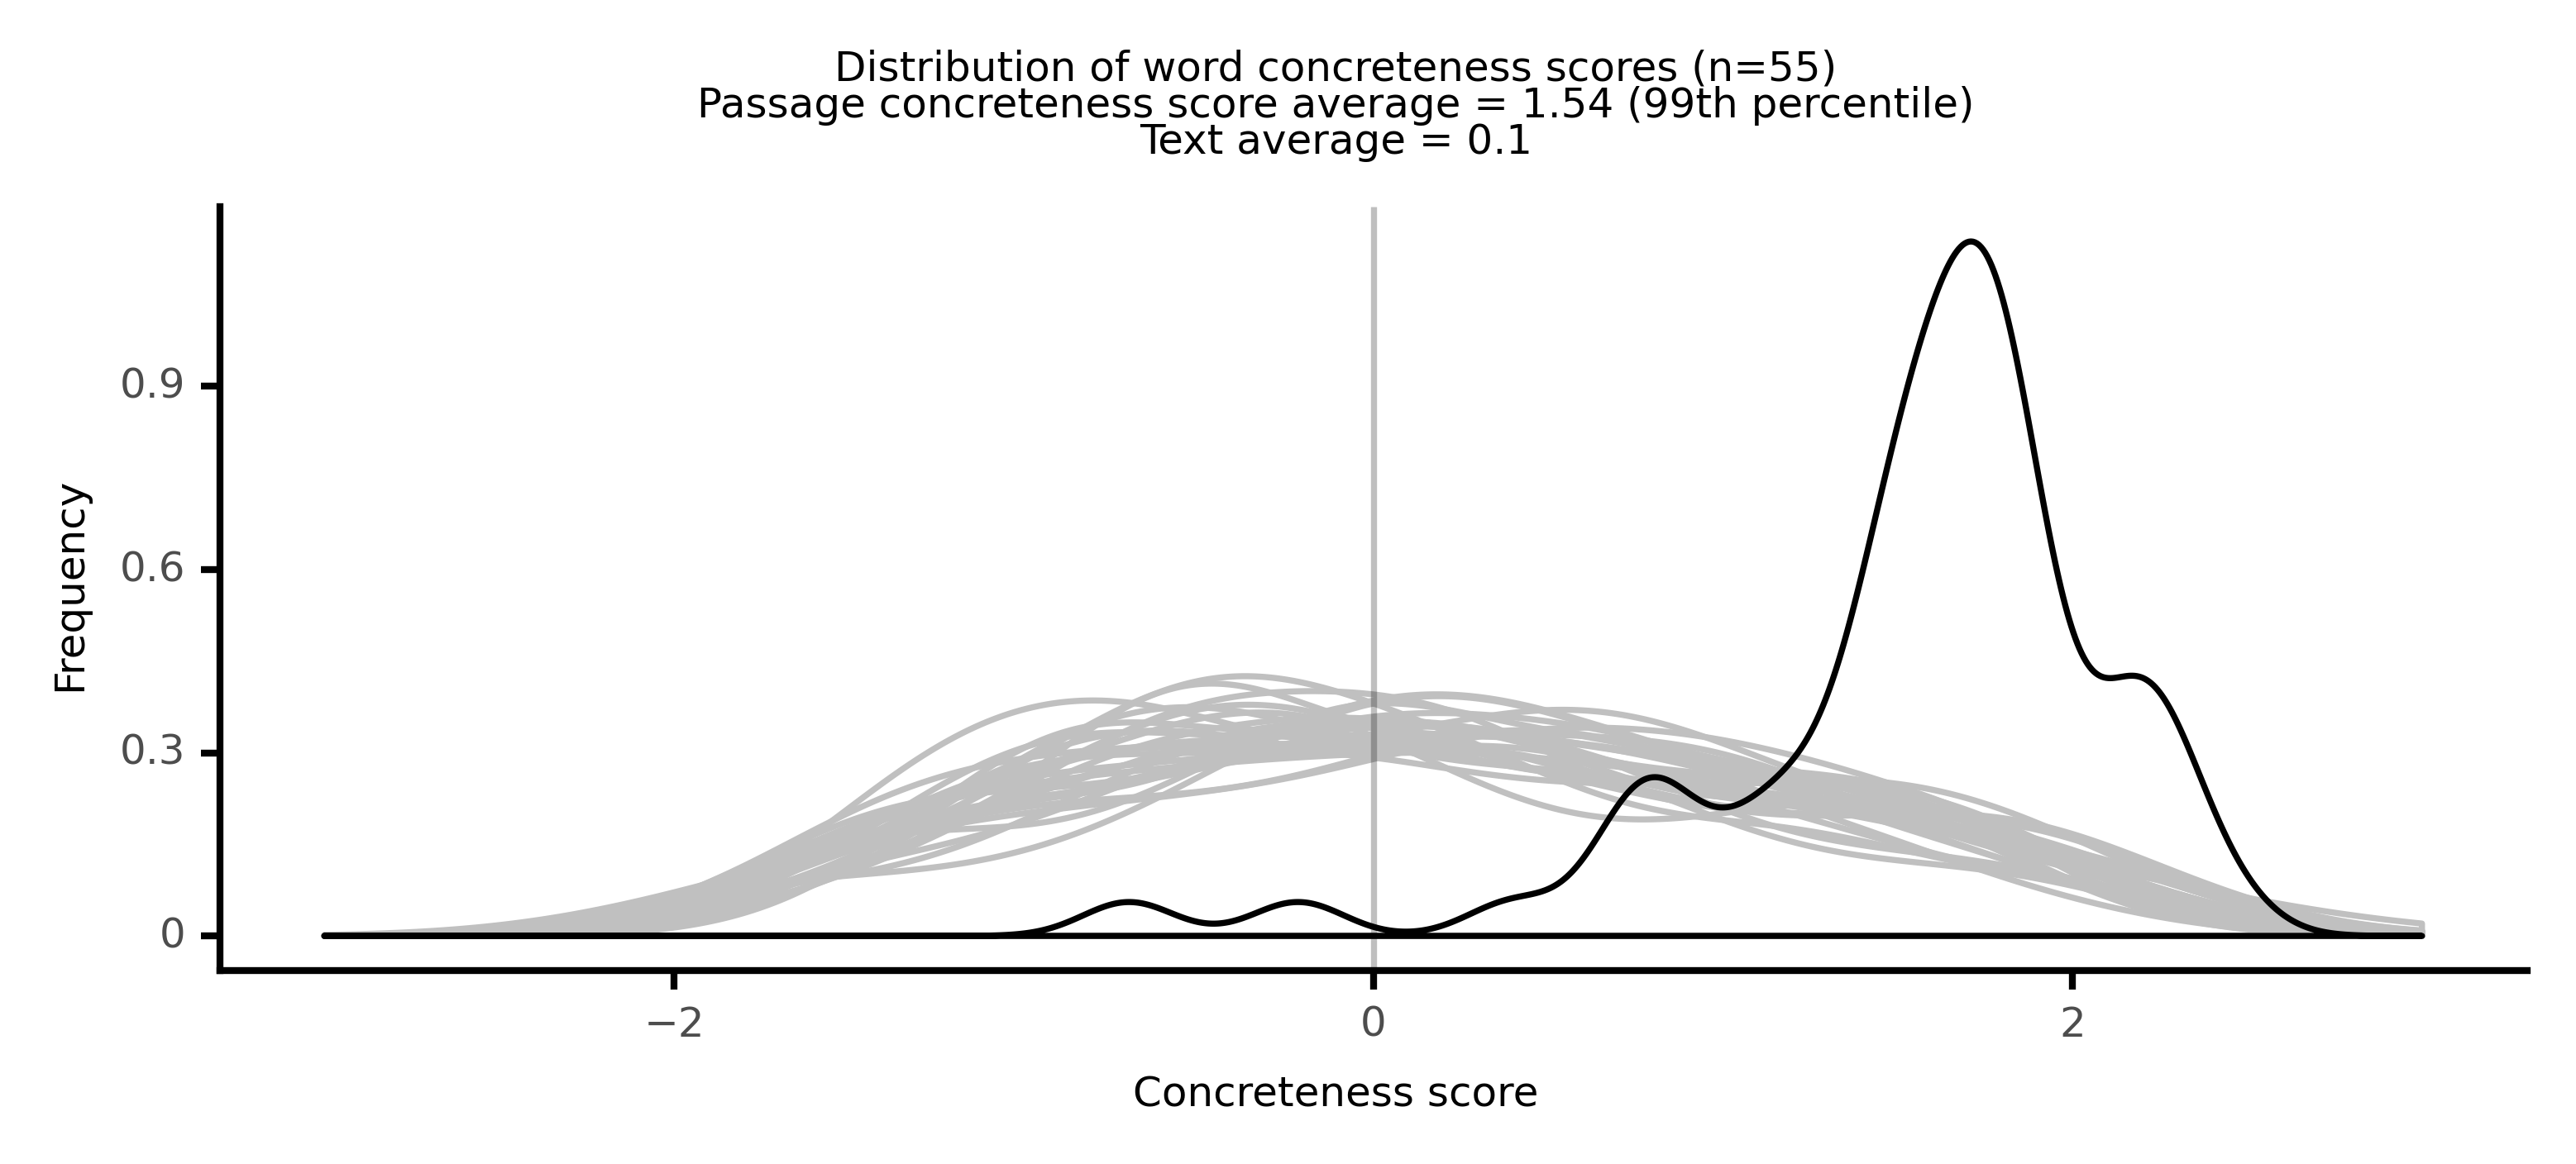

<ggplot: (8766688016297)>

In [30]:
showpsg2(dfpsg.iloc[-1].txt,all_scores=scores,other_txt=C.textd[dfpsg.iloc[-1].id].txt)